### Name: Dietmar Hareter

<p style="font-size:24px; font-weight:bold; text-align:left;">Prüfung Immersion 13.4. bis 13.5.2025, Teil II (Python) <br> "Diabetes Hospital Readmission" <br> Fokus: Neuronale Netzwerke und Embeddings </p>

<hr style="width:50%; margin-left:25% !important; margin-right:25% !important;" />

__WICHTIGE HINWEISE ZUR BEARBEITUNG DIESES AUFGABENTEILS__

Der zweite Teil der Immersion-Prüfung ist in Python umzusetzen. Dabei soll ein bereits bestehendes und für geeignet befundenes Jupyter-Notebook als Vorlage verwendet und auf andere Daten und geänderte Fragestellungen angepasst werden.  

Als Vorlage für die Bearbeitung der Aufgaben PT1, PT2, PT3 und PT7 b) dient das Notebook zum Use Case "Prognose seltener Ereignisse: Credit Scoring" der DAV (siehe https://aktuar.de/de/wissen/fachinformationen/detail/prognose-seltener-ereignisse-credit-scoring/) und muss gemäß Aufgabenstellung angepasst werden (d.h. Texte, Codes und Notebook-Zellen zielführend ändern, ergänzen, einfügen, löschen oder auskommentieren). Das als Vorlage zu verwendende Notebook befindet sich in einer um die Aufgabenstellung ergänzten und leicht bearbeiteten Version namens `template2-credit-scoring.ipynb` den Prüfungsunterlagen und wird im Folgenden mit dem Kürzel CSN abgekürzt. Anmerkung: Dieses Notebook.

Die Aufgaben PT0, PT4 bis PT7 a) behandeln neue, bisher nicht in der Notebook-Vorlage behandelte Themen. Hierfür sind ausreichend viele Notebook-Zellen einzufügen und das Notebook ist der Aufgabenstellung entsprechend zu erweitern.

Für die Bearbeitung werden die im Aufgabenteil I (R-Notebook) erzeugten Datensätze `diabetic_data_bin.csv` und `icd9_data.csv` benötigt. 

Bei der Überarbeitung ist darauf zu achten, dass Sektionsnummern des Ausgangsnotebooks CSN (in den ersten drei Aufgaben PT-1 - PT-3) erhalten bleiben. Die dazugehörigen Überschriften können nach Bedarf angepasst werden. Inhaltlich sind die aus der Vorlage übernommenen Texte auf Deutsch zu übersetzen (z.B. mit DeepL) und insbesondere an die geänderten Sachverhalte (z.B. Daten und Ergebnisse) anzupassen. Kommentare in Code-Zellen müssen nicht übersetzt werden. Nicht benötigte Texte können gelöscht werden.

<hr style="width:50%; margin-left:25% !important; margin-right:25% !important;" />

##  <font color='red'> Aufgabe PT0: Aufsetzen einer Entwicklungsumgebung [Lernziel 5.1; 1 Punkt]</font>

Für das Aufsetzen der Entwicklungsumgebung wird Python 3.10.16 empfohlen. Den Unterlagen wurde die Datei `requirements.txt` hinzugefügt. Auf Basis dieses Files können die benötigten Pakete installiert werden. Die verwendete Python-Version ist auszugeben. Zudem sind die installierten Pakete übersichtlich (pro Zeile fünf Pakete mit Versionsnummer) auszugeben.

__Lösung:__

In [1]:
import sys
import subprocess
from tabulate import tabulate

# Ausgabe der verwendeten Python-Version
print(f"Verwendete Python-Version: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")

Verwendete Python-Version: 3.12.5


Im folgenden wird die Liste aller installierten Pakete inklusive der Versionsnummern ermittelt und ausgegeben (5 Pakete pro Zeile)

In [2]:
# pip list abrufen
paketliste = subprocess.run(['pip', 'list'], capture_output=True, text=True)
lines = paketliste.stdout.strip().split('\n')[2:]

# Die Pakete werden extrahiert 5 Pakete pro Gruppe gruppiert
packages = [(line.split()[0], line.split()[1]) for line in lines]
grouped = [packages[i:i+5] for i in range(0, len(packages), 5)]

# Ausgabe mit einer Gruppe pro Zeile
for group in grouped:
    row = [f"{name}=={version}" for name, version in group]
    print('\t'.join(row))

absl-py==2.2.1	accelerate==1.6.0	adagio==0.2.6	aiohappyeyeballs==2.6.1	aiohttp==3.11.18
aiohttp-cors==0.8.1	aiosignal==1.3.2	alembic==1.15.2	annotated-types==0.7.0	antlr4-python3-runtime==4.9.3
anyio==4.9.0	appdirs==1.4.4	argon2-cffi==23.1.0	argon2-cffi-bindings==21.2.0	arrow==1.3.0
asttokens==3.0.0	astunparse==1.6.3	async-lru==2.0.5	attrs==25.3.0	autogluon==1.3.0
autogluon.common==1.3.0	autogluon.core==1.3.0	autogluon.features==1.3.0	autogluon.multimodal==1.3.0	autogluon.tabular==1.3.0
autogluon.timeseries==1.3.0	babel==2.17.0	beartype==0.20.2	beautifulsoup4==4.13.3	bleach==6.2.0
blis==1.3.0	boto3==1.38.8	botocore==1.38.8	cachetools==5.5.2	catalogue==2.0.10
catboost==1.2.8	certifi==2025.1.31	cffi==1.17.1	charset-normalizer==3.4.1	click==8.1.8
cloudpathlib==0.21.0	cloudpickle==3.1.1	colorama==0.4.6	colorful==0.5.6	colorlog==6.9.0
comm==0.2.2	confection==0.1.5	contourpy==1.3.1	coreforecast==0.0.15	cycler==0.12.1
cymem==2.0.11	datasets==3.5.1	debugpy==1.8.13	decorator==5.2.1	defusedxml==

Aufgrund der eingeschränken Berechtigungen am verwendeten Laptop war es leider nicht möglich, die Aufgabe "PT0: Aufsetzen einer Entwicklungsumgebung", trotz Einrichtung einer virtuellen Umgebung für Python, wie gefordert umzusetzen. Die Installations-Datei für Python 3.10.16 ist nicht mehr auf der offiziellen Download-Seiten verfügbar (https://www.python.org/downloads/release/python-31016/). Die Paket-List wurde mittels "pip install -r requirements.txt" mit den eingetragenen Versionen installiert, allerdings wurden diese teilweise bei nachträglichen installierten benötigten Paketen (*AutoGluon*, ...) mit aktuelleren Versionen überschrieben. Um mögliche technische Probleme zu vermeiden, die auftreten können, wenn wieder die in der Liste eingetragenen Versionen installiert werden würden, wurde auf diesen Schritt verzichtet.

Die folgende Übersicht zeigt einen Vergleich aller im Text-File "requirements.txt" aufgelisteten Pakete und vorgegeben Paket-Versionen mit den tatsächlich installierten Paket-Versionen.

In [3]:
with open("requirements.txt", "r", encoding="utf-8") as f:
    pakete = [zeile.strip() for zeile in f]

In [4]:
from importlib.metadata import version, PackageNotFoundError

# Erstellung einer Übersicht aller benötigten und tatsächlich installierten Pakete.
for paket in pakete:
    name, expected_version = paket.split("==")
    try:
        installed_version = version(name)
        if installed_version == expected_version:
            print(f"{name} ist installiert mit der richtigen Version ({expected_version}).")
        else:
            print(f"{name} ist installiert, aber mit Version {installed_version} (nicht {expected_version}).")
    except PackageNotFoundError:
        print(f"{name} ist **nicht** installiert.")

absl-py ist installiert, aber mit Version 2.2.1 (nicht 2.1.0).
asttokens ist installiert mit der richtigen Version (3.0.0).
astunparse ist installiert mit der richtigen Version (1.6.3).
catboost ist installiert, aber mit Version 1.2.8 (nicht 1.2.7).
certifi ist installiert, aber mit Version 2025.1.31 (nicht 2024.12.14).
charset-normalizer ist installiert, aber mit Version 3.4.1 (nicht 3.4.0).
comm ist installiert mit der richtigen Version (0.2.2).
contourpy ist installiert mit der richtigen Version (1.3.1).
cycler ist installiert mit der richtigen Version (0.12.1).
debugpy ist installiert, aber mit Version 1.8.13 (nicht 1.8.11).
decorator ist installiert, aber mit Version 5.2.1 (nicht 5.1.1).
exceptiongroup ist installiert, aber mit Version 1.3.0 (nicht 1.2.2).
executing ist installiert, aber mit Version 2.2.0 (nicht 2.1.0).
flatbuffers ist installiert, aber mit Version 25.2.10 (nicht 24.3.25).
fonttools ist installiert, aber mit Version 4.57.0 (nicht 4.55.3).
gast ist installiert mit 

##  <font color='red'> Aufgabe PT1: Möglichst einfache Erstellung eines guten Benchmarkmodells [Lernziel 5.1; 4 Punkte] </font>

Basierend auf dem Notebook CSN (Part A) sind folgende Anpassungen durchzuführen:

- Die Zellen vor dem Text "Part A: Quick & Easy" mit Bezug zum ursprünglichen Thema Credit Scoring sind zu entfernen.
- In "Part A: Quick & Easy": 
    - Alle im Notebook verwendeten Pakete sind in Sektion 1.1 zu ergänzen, nicht benötigte Imports sind zurückzubauen. Nutzen Sie einen `RANDOM_SEED` von 42.
    - Der in Sektion 1.2 verwendete Datensatz `../input/home-credit-default-risk/application_train.csv` ist durch den in Aufgabe R1 aus Teil I erzeugten Datensatz `diabetic_data_bin.csv` zu ersetzen. Welche Ergänzungen sind vorzunehmen, damit der Datensatz korrekt eingelesen wird?
    - Jedes eingelesene Feature, dessen Name auf „_id“ endet, ist auf den Datentyp „object“ zu setzen. Welchen Vorteil hat dieses Vorgehen?
    - Für Part A sind keine weiteren außer die im Notebook bereits vorhandenen Modifikationen am Datensatz durchzuführen. Falls einzelne Codeblöcke nicht benötigt werden, kommentieren Sie diese mit einer entsprechenden Anmerkung aus. Erinnerung: Beachten Sie hier und im restlichen Notebook den Allgemeinen Hinweis, dass Texte zu übersetzen und an den Datensatz anzupassen sind.

__Lösung:__

<p style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">Inhaltsverzeichnis</p>

**Aufgabe PT1: Möglichst einfache Erstellung eines guten Benchmarkmodells**

Teil A: Quick & Easy
- [1. Entwicklung eines Basis-ML-Modells](#a01)

**Aufgabe PT2: Logistische Regression und Merkmalsanalyse**

Part B: Erzeugen von Erkenntnissen aus Daten und Modellierung
- [2. Logistische Regression: Ein klassischer Ansatz zur Klassifikation](#a02)
- [3. Explorative Datenanalyse und die Entwicklung von Merkmalen zur Verbesserung der Modellleistung](#a03)
- [4. Optimierung der CatBoost-Modellleistung durch die Integration neuer Merkmale](#a04)
- [5. Modellinterpretation für eines tieferen Verständnisses](#a05)
- [6. Datenvorverarbeitung: Codierung, Skalierung und Subsampling](#a06)

**Aufgabe PT3: Modelloptimierung anpassen und erweitern**

Part C: Tuning and Applying Machine Learning Models
- [7. Hyperparameter-Optimierung in CatBoost](#a09)
- [8. HP-Tuning LightGBM und XGBoost](#a10)

**Aufgabe PT4: DXG-Diagnosegruppen bilden und Erzeugung von Embeddings vorbereiten**

**Aufgabe PT5: Erzeugung stabiler Diagnose-Embeddings mit performantem neuronalem Netzwerk**

**Aufgabe PT6: Embeddings joinen und bei Modellierung verwenden**

**Aufgabe PT7: AutoML sowie Modellbewertung und Anwendung**

- [9. Modellevaluierung und Anwendung](#a11)

<br>

<h1 id="parta"
    style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">
    Teil A: Quick & Easy
    <a class="anchor-link"
       href="#parta"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
</h1>

In Teil A wird eine erste Basis für die Modellleistung ermittelt, wobei ein einfacher, aber leistungsfähiger CatBoost-Algorithmus zum Einsatz kommt. Dieser ermöglicht einen schnellen Einblick in das prognosetechnische Potenzial des Datensatzes. In den Teilen B und C folgen anschließend fortgeschrittene Modellierungs- und Optimierungsmethoden, um die Vorhersagegenauigkeit weiter zu verbessern und ein tieferes Verständnis die Wahrscheinlichkeiten einer frühzeitigen Wiedereinweisung zu gewinnen.

<h1 id="a01"
    style="font-size:18px; font-weight:bold;">
    1. Entwicklung eines Basis-ML-Modells
    <a class="anchor-link"
       href="#a01"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In diesem ersten Abschnitt wird ein einfaches Machine-Learning-Modell für die binäre Klassifikation zur Vorhersage der frühzeitigen Wiedereinweisung in den ersten 30 Tagen entwickelt. Dieses Basismodell dient als Referenzpunkt für alle nachfolgenden Machine-Learning-Modelle.

<h2 style="font-size:16px; font-weight:bold;">1.1 Einrichtung der Modellierungsumgebung</h2>

Zunächst werden alle benötigten Bibliotheken importiert, Visualisierungsparameter angepasst und ein Zufallswert gesetzt, um die Reproduzierbarkeit der Ergebnisse sicherzustellen.

In [5]:
import os
# Setze die Umgebungsvariable, um alle Warnungen zu ignorieren.
os.environ['PYTHONWARNINGS'] = 'ignore'

# Standard-Python-Bibliotheken für Datenanalyse, wissenschaftliches Rechnen und Visualisierung.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
from scipy.stats import uniform, loguniform

# Einstellungen für pandas und Matplotlib
pd.set_option('display.max_columns', None)
COLOR_LIGHT, COLOR_DARK = '#849CBE', '#00548A'

# Scikit-learn-Module für Datanaufbereitung und Machine-Learning-Modelle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Gradient Boosting und logistische Regression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm.callback import log_evaluation
import statsmodels.formula.api as smf

# TensorFlow und Keras für künstliche neuronale Netzwerke
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.models import Model, clone_model
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# AutoGluon für AutoML im letzten Abschnitt
from tqdm import tqdm
from autogluon.tabular import TabularPredictor
from autogluon.common import space

# Sicherstellung der Reproduzierbarkeit
RANDOM_SEED = 42
set_random_seed(RANDOM_SEED)

Um die Ressourcennutzung zu optimieren, werden die GPU-Speichereinstellungen von TensorFlow angepasst, um eine effiziente Berechnung während des gesamten Modellierungsprozesses zu ermöglichen.

In [6]:
# Prevent TensorFlow From Fully Allocating GPU Memory
# Ref: https://www.tensorflow.org/guide/gpu#limiting_gpu_memory_growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
print(gpus)

[]


Auf dem verwendeten Laptop stehen leider keine GPU-Kerne zur Verfügung. Alle nachfolgenden Berechnungen werden deshalb auf den CPUs ausgeführt.

In [7]:
print(f"Anzahl der CPUs: {os.cpu_count()}")

Anzahl der CPUs: 16


<h2 style="font-size:16px; font-weight:bold;">1.2 Einlese und Untersuchen der Eingabedaten</h2>

Der Basis-Datensatz *diabetic_data_bin.csv* wird geladen. In den beiden Variablen *max_glu_serum* und *A1Cresult* gibt es die Ausprägungen "None". Diese Wert wird in Python standardmäßig als *nan* interpretiert, deshalb wird der Parameter *keep_default_na=False* in der Funktion *pd.read_csv* gesetzt um die entsprechenden Werte richtig einzulesen. Nach der Einlese wird die Anzahl der Zeilen und Spalten gezeigt. 
Wie angegeben, werden alle Spalten, die mit "_id" enden, auf den Datentyp "object" gesetzt. 

In [8]:
# Einlese des Datensatzes in ein pandas DataFrame
df_raw = pd.read_csv("data/diabetic_data_bin.csv", sep=";", keep_default_na=False)

# Dimension des Datensatzes (Zeilen, Spalten)
print(f"Die Dimension des Datensatzes ist (Zeilen, Spalten): {df_raw.shape}")

# Spalten, die auf 'id' enden, auf 'object' setzen
id_columns = [col for col in df_raw.columns if col.endswith('id')]
df_raw[id_columns] = df_raw[id_columns].astype('object')

# Zur ersten Überprüfung des Datensatzes, werden 7 zufällige Zeilen angezeigt
df_raw.sample(n=7, random_state=RANDOM_SEED)

Die Dimension des Datensatzes ist (Zeilen, Spalten): (47751, 51)


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,TARGET,group_diag_1,group_diag_2,group_diag_3
47523,Asian,Female,[50-60),?,3,6,1,1,?,Orthopedics,18,4,6,0,0,0,722,250,401,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Musculoskeletal,Diabetes,Circulatory
8582,Caucasian,Male,[40-50),?,2,6,4,8,?,?,45,6,53,0,0,0,410,414,401,7,None,None,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0,Circulatory,Circulatory,Circulatory
42024,Caucasian,Female,[70-80),?,1,3,7,3,MC,?,47,0,13,0,0,0,25012,427,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Diabetes,Circulatory,Other
15219,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,InternalMedicine,35,2,7,0,0,0,25013,280,789,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,Diabetes,Other,Neoplasms
45649,Caucasian,Female,[60-70),?,1,2,7,1,?,?,23,0,11,0,0,0,410,414,250,5,None,>8,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1,Circulatory,Circulatory,Diabetes
23448,Caucasian,Male,[80-90),?,3,28,1,1,SP,?,55,0,13,0,0,0,294,312,414,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,Other,Other,Circulatory
39945,Caucasian,Male,[40-50),?,1,1,7,4,?,?,56,2,16,1,0,0,535,584,25041,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,Other,Genitourinary,Diabetes


Für eine weitere Überprüfung des eingelesenen Datensatzes wird eine Übersicht der einzelnen Merkmale erstellt. Diese Übersicht zeigt, dass der eingelesene Datensatz keine *nan*-Werte enthält:

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47751 entries, 0 to 47750
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      47751 non-null  object
 1   gender                    47751 non-null  object
 2   age                       47751 non-null  object
 3   weight                    47751 non-null  object
 4   admission_type_id         47751 non-null  object
 5   discharge_disposition_id  47751 non-null  object
 6   admission_source_id       47751 non-null  object
 7   time_in_hospital          47751 non-null  int64 
 8   payer_code                47751 non-null  object
 9   medical_specialty         47751 non-null  object
 10  num_lab_procedures        47751 non-null  int64 
 11  num_procedures            47751 non-null  int64 
 12  num_medications           47751 non-null  int64 
 13  number_outpatient         47751 non-null  int64 
 14  number_emergency      

Im Folgenden wird die Ausgewogenheit des Datensatzes bewerten, indem die Verteilung der 'TARGET'-Variable darstellt wird.

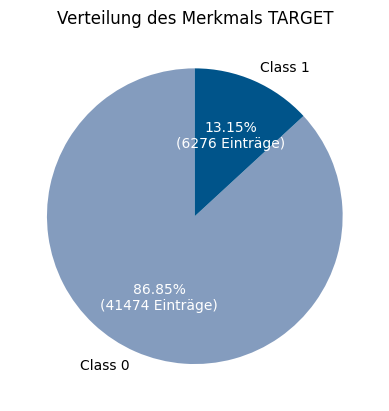

In [10]:
# Ermittelt die Anzahl der verschiedenen Ausprägungen des Merkmals 'TARGET'
target_counts = df_raw['TARGET'].value_counts()

# Ermittelt die Anzahl der Beobachtungen
total_entries = len(df_raw['TARGET'])

# Definition einer benutzerdefinierten Formatierungsfunktion für die Beschriftungen im Tortendiagramm
def custom_autopct(pct):
    absolute = int(pct/100.*total_entries)
    return "{:.2f}%\n({:d} Einträge)".format(pct, absolute)

# Erstellen eines Tortendiagramms der Verteilung der Klassen im Merkmal 'TARGET'
pie_chart, _, autotexts = plt.pie(target_counts, labels=target_counts.index.map({0: 'Class 0', 1: 'Class 1'}),
                                  autopct=custom_autopct, startangle=90,
                                  colors=[COLOR_LIGHT, COLOR_DARK], wedgeprops={'edgecolor': 'none'})

# Setzen der Textfarbe der Beschriftungen auf Weiß
for autotext in autotexts:
    autotext.set_color('white')

# Anzeigen des Tortendiagramms
plt.title('Verteilung des Merkmals TARGET')
plt.show()

Das Kreisdiagramm zeigt ein deutliches Ungleichgewicht / Imbalanced der abhängigen Variable TARGET: Die Klasse 1 tritt deutlich seltener auf als Klasse 0.

Die genaue Klassifikation seltener Ereignisse stellt eine Herausforderung bei unausgeglichenen Datensätzen wie dem vorliegenden mit der TARGET-Variablen dar. In solchen Fällen ist es ratsam, die Fläche unter der Receiver Operating Characteristic (ROC)-Kurve (AUC) anstelle der Genauigkeit als Leistungskennzahl zu verwenden. Während die Genauigkeit die allgemeine Vorhersagekorrektheit widerspiegelt, kann sie irreführend sein, da sie die Leistung in Bezug auf die Minderheitsklassen nicht ausreichend berücksichtigt (ein Modell, dass immer nur "0" prognostiziert, hat einen Genauigkeit von knapp 87%). Im Gegensatz dazu misst AUC den Kompromiss zwischen der True Positive Rate (TPR) und der False Positive Rate (FPR) und bietet ein differenzierteres Verständnis der Fähigkeit eines Modells, seltene Ereignisse zu identifizieren. Dieses Thema wird in Teil B weiter vertieft.

<h2 style="font-size:16px; font-weight:bold;">1.3 Ersetzen fehlender kategorialer Werte</h2>

Während viele Machine-Learning-(ML)-Tools komplexere Schritte zur Datenvorbereitung, wie sie in Teil B beschrieben sind, erfordern, benötigt CatBoost – das in diesem Fall verwendete ML-Tool – lediglich eine minimale Datenvorbereitung. Diese besteht darin, fehlende kategoriale Werte durch einen vordefinierten Wert zu ersetzen.

In [11]:
# Identifikation kategorialer Merkmale anhand des Datentyps 'object'
categorical_features = list(df_raw.select_dtypes(include=['object']).columns)

# Berechnet die Anzahl eindeutiger Werte pro kategorialem Merkmal und setzt den Index zurück, um die Spalte als reguläre Spalte darzustellen.
categorical_feature_counts = df_raw[categorical_features].nunique().reset_index()

# Umbenennung der Spalten zu 'Feature' und 'Anzahl eindeutiger Werte'
categorical_feature_counts.columns = ['Categorical Feature', 'Anzahl eindeutiger Werte']

# Sortierung nach Anzahl der eindeutigen Werte (absteigend) 
categorical_feature_counts.sort_values(by='Anzahl eindeutiger Werte', ascending=False, inplace=True)

# Anzeige des formatierten DataFrames ohne Index
display(categorical_feature_counts.style.hide(axis='index'))

Categorical Feature,Anzahl eindeutiger Werte
diag_3,724
diag_2,678
diag_1,661
medical_specialty,45
payer_code,17
discharge_disposition_id,15
admission_source_id,11
group_diag_1,10
group_diag_3,10
age,10


Wie bereits aus Teil 1 der Aufgabenstellung (R-Teil) bekannt, gibt es im Datensatz keine fehlenden Werte. Dies wird mit der folgende Auswertung nochmals bestätigt.

In [12]:
# Define a function that returns a DataFrame with features containing missing values
# and the percentage of missing values for each of these features
def missing_values_percentage(data):
    # Calculate percentages and create a DataFrame
    nan_percentages = data.isna().sum() * 100 / len(data)
    missing_values_df = pd.DataFrame({
        'Categorical Feature': nan_percentages.index, 
        'Missing Percent': nan_percentages.values
    })
    # Format the 'Missing Percent' column as a percentage string with two decimal places
    missing_values_df['Missing Percent'] = missing_values_df['Missing Percent'].apply(lambda x: f'{x:.2f}%')
    # Filter out features without missing values and sort by percentage
    missing_values_df = missing_values_df[missing_values_df['Missing Percent'] != '0.00%']
    missing_values_df.sort_values(by='Missing Percent', ascending=False, inplace=True)
    return missing_values_df

# Calculate the proportion of missing values for the categorical features
missing_values_df = missing_values_percentage(df_raw[categorical_features])

# Display the resulting DataFrame without the index using the new recommended Styler.hide method
missing_values_df_styled = missing_values_df.style.hide(axis='index')
display(missing_values_df_styled)

Categorical Feature,Missing Percent


In [13]:
#df_raw[categorical_features] = df_raw[categorical_features].fillna('__missingValue__')

<h2 style="font-size:16px; font-weight:bold;">1.4 Aufteilung der Daten in Trainings-, Validierungs- und Testmengen</h2>

Beim Training eines Machine-Learning-Klassifikators soll dieser nicht nur die Trainingsdaten modellieren oder sie auswendig lernen (ML-Modelle können ausreichend groß und komplex sein, um dies zu tun), vielmehr soll das Modell auf unbekannte Daten verallgemeinern. Deshalb wird die Modellleistung üblicherweise an einem zurückgehaltenen Testdatensatz gemessen, das Beispiele enthält, die in den Trainingsdatensatz nicht vorhanden sind und deshalb noch nicht vom Modell "gelernt". Zur Gewährleistung der Konsistenz mit bevorstehenden Optimierungsstrategien wird der Datensatz zufällig in drei Teile unterteilt

* <u>Training-Datei</u>: 70% der Beispiele werden zum Trainieren des Modells verwendet.
* <u>Validation-Datei</u>: 15% um die Modelle nach dem Training zu validieren und gegebenenfalls Änderungen zu entscheiden.
* <u>Test-Datei</u>: 15% für die endgültige Messung der Verallgemeinerungsleistung aller relevanten Modelle (siehe [Abschnitt 9](#a11))

Diese Aufteilung ermöglicht ein effektives Modelltraining, die Feinabstimmung von Hyperparametern zur Vermeidung von Overfitting und eine unverzerrte Evaluierung der Leistung auf neuen, unbekannten Daten.

In [14]:
# Konstanten für Datensplits
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Aufteilung der verbleibenden 30 % zu gleichen Teilen in Validierung und Test-Dateien

# Trennung der Merkmale (X) und der Zielvariable (y)
X_raw = df_raw.drop(columns=['TARGET'], axis=1)
y = df_raw['TARGET']

# Aufteilung des Datensatzes in einen Trainingsdatensatz und einen kombinierten Validierungs- und Testdatensatz
X_raw_train, X_raw_val_test, y_raw_train, y_raw_val_test = train_test_split(X_raw, y, train_size=TRAIN_RATIO, random_state=RANDOM_SEED)

# Aufteilung der kombinierten Validierungs- und Testmenge in separate Validierungs- und Testmengen
X_raw_val, X_raw_test, y_raw_val, y_raw_test = train_test_split(X_raw_val_test, y_raw_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED)

# Überprüfung der Dimensionen der Trainings-, Validierungs- und Testmengen (Zeilen, Spalten)
print(f"Training-Datei Dimension (Zeilen, Spalten):   {X_raw_train.shape}")
print(f"Validation-Datei Dimension (Zeilen, Spalten):  {X_raw_val.shape}")
print(f"Test-Datei Dimension (Zeilen, Spalten):        {X_raw_test.shape}")

Training-Datei Dimension (Zeilen, Spalten):   (33425, 50)
Validation-Datei Dimension (Zeilen, Spalten):  (7163, 50)
Test-Datei Dimension (Zeilen, Spalten):        (7163, 50)


Ermittlung der Mittelwerte und Standardabweichungen der Zielvariable y (=TARGET) für die drei Datensätze.

In [15]:
# Berechnung des Mittelwerts und Standardabweichung der TARGET-Variable für jeden Datensatz
stats = pd.DataFrame({
    'Mean': [y_raw_train.mean(), y_raw_val.mean(), y_raw_test.mean()],
    'Standard Deviation': [y_raw_train.std(), y_raw_val.std(), y_raw_test.std()]
}, index=['Train', 'Validation', 'Test']).round(4)

print(stats)

              Mean  Standard Deviation
Train       0.1314              0.3378
Validation  0.1312              0.3377
Test        0.1319              0.3384


Diese zufälligen Unterschiede in den Mittelwerten der Zielvariablen erscheinen zunächst gering, können jedoch Auswirkungen auf die abschließende Bewertung haben, siehe [Abschnitt 9](#a11).

<h2 style="font-size:16px; font-weight:bold;">1.5 Training eines Standard-CatBoost-Klassifikators (Baseline-Modell)</h2>

Im Folgenden wird das CatBoost-Modell auf den vorbereiteten Datensatz angewendet, wobei die Standardeinstellungen genutzt werden, um eine unkomplizierte Bewertung ohne Hyperparameter-Optimierung durchzuführen.

In [16]:
# Start Timer zur Bestimmung der Trainingszeit des CatBoost-Modells
start_time = time.time()

# Anpassung des CatBoostClassifier an die Trainingsdaten
CB1 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED)
CB1.fit(X_raw_train, y_raw_train, cat_features=categorical_features, logging_level='Silent')

# Berechnung und Anzeige der Laufzeit in Sekunden
elapsed_time_CB1 = time.time() - start_time
print(f"Verstrichene Zeit (sec): {elapsed_time_CB1:.2f}")

Verstrichene Zeit (sec): 71.05


Zur Veranschaulichung des umfangreichen Anpassungspotenzials bei der Feinabstimmung des CatBoost-Modells wird eine vollständige Liste der Hyperparameter und ihrer Standardwerte aufgelistet.

In [17]:
# Anzeige aller Modell-Hyperparameter in einem DataFrame
hyperparams_list = [(k, v) for k, v in CB1.get_all_params().items()]
hyperparams_df = pd.DataFrame(hyperparams_list, columns=['Hyperparameter', 'Value'])
display(hyperparams_df.style.hide(axis='index'))

Hyperparameter,Value
nan_mode,Min
eval_metric,AUC
combinations_ctr,"['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']"
iterations,1000
sampling_frequency,PerTree
fold_permutation_block,0
leaf_estimation_method,Newton
random_score_type,NormalWithModelSizeDecrease
counter_calc_method,SkipTest
grow_policy,SymmetricTree


Für einen ersten Einblicke in das Verhalten des trainierten Modells, wird die Feature-Importance der einzelnen Merkmale dargestellt.

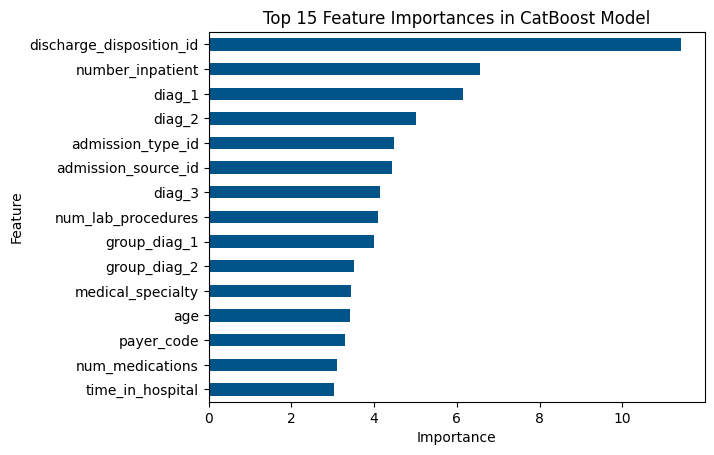

In [18]:
# Ermittlung der 15 wichtigsten Merkmale
feature_importances = pd.Series(CB1.feature_importances_, index=X_raw_train.columns).nlargest(15)

# Plot der Feature-Importance
feature_importances.plot(kind='barh', color=COLOR_DARK)
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances in CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Der obere Darstellung der Importance-Analyse zeigt, dass das Merkmal *discharge_disposition_id* der wichtigste Predictor für die Zielvariable ist, gefolgt von den Merkmalen *number_inpatient*, *admission_type_id*, *admission_source_id* und den drei Diagnosen *diag_1*, *diag_2* und *diag_3*.

Anschließend wird die Leistung des CatBoost-Modells anhand des Validierungsdatensatzes bewertet, wobei die Fläche unter der Receiver-Operating-Characteristic-Kurve (AUC) als Bewertungsmaß herangezogen wird (siehe oben).

In [19]:
# Berechnung des AUC-Wert anhand der Vorhersagewahrscheinlichkeiten des Modells für die positive Klasse.
auc_CB1 = roc_auc_score(y_raw_val, CB1.predict_proba(X_raw_val)[:, 1])

# Ausgabe des Validierungs-AUC
print(f'Die AUC des CatBoost-Modells mit Standard-Hyperparametern auf dem Validierungsdatensatz beträgt: {auc_CB1:.6f}')

Die AUC des CatBoost-Modells mit Standard-Hyperparametern auf dem Validierungsdatensatz beträgt: 0.708208


Zusammenfassend kann festgestellt werden, dass Teil A eine solide Ausgangsbasis für unsere binäre Klassifikationsaufgabe geschaffen hat, indem ein CatBoost-Modell mit minimaler Datenvorbereitung und ohne Anpassung der Hyperparameter verwendet wurde. Dies ist bereits ein komplexes Modell, das jedoch sehr einfach zu erstellen ist und für seine hohe Vorhersagekraft mit den Standardparametern bekannt ist. Dieser Referenzwert dient als Ausgangspunkt, um den Nutzen der in den folgenden Abschnitten entwickelten ausgefeilteren Modelle zu bewerten

<hr style="width:50%; margin-left:25% !important; margin-right:25% !important;" />

##  <font color='red'> Aufgabe PT2: Logistische Regression und Merkmalsanalyse [Lernziele 2.2, 5.1; 10 Punkte] </font>

Basierend auf dem Notebook CSN (Part B) sind folgende Anpassungen durchzuführen:

* a) In Abschnitt 2.1 sind nur notwendige Operationen durchzuführen. Was kann (begründet) auskommentiert werden?
* b) Für die logistische Regression in Abschnitt 2.2 ist folgendes Vorgehen zu wählen: Orientieren Sie sich an der Feature Importance Liste von Catboost, und konstruieren Sie ein Modell mit mindestens fünf Features. Beachten Sie dabei die Merkmalsskala. Wo ergeben sich Probleme und wie sind diese zu begründen?
* c) Aus Abschnitt 2.3 sind nur relevante Bestandteile zu bearbeiten. Was kann (begründet) auskommentiert werden?
* d) Die Analyse der kategoriellen Merkmale in Abschnitt 3.1 ist auf `group_diag_1`, `group_diag_2`, `group_diag_3`, `age`, `medical_specialty`, `payer_code` und `discharge_disposition_id` zu beschränken.
* e) Bei der Analyse der numerischen Merkmale in Abschnitt 3.2 sind `number_outpatient`, `number_inpatient`, `num_procedures`, `num_lab_procedures`, `num_medications`, `time_in_hospital`, `number_emergency` sowie `number_diagnoses` zu berücksichtigen.

- Abschnitt 3.3 sowie 4 (Enhancing CatBoost's Performance with New Features) werden an dieser Stelle nicht berücksichtigt.
- Abschnitt 5 wird nicht berücksichtigt.

* f) Abschnitt 6 ist auszuführen:
    - In Abschnitt 6.3 ist der `non_event_factor` begründet anzupassen.
    - Im Anschluss an Abschnitt 6.4 ist ein neuer Abschnitt 6.5 einzufügen, in dem die bisherigen Ergebnisse der Modelle gegenübergestellt werden sollen. Orientieren Sie sich dabei an Abschnitt 4.2 des CSN Notebooks.

__Lösung:__

<h1 id="partb"
    style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">
    Part B: Erzeugen von Erkenntnissen aus Daten und Modellierung
    <a class="anchor-link"
       href="#partb"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
</h1>

Teil B konzentriert sich auf die Verfeinerung der Strategie für maschinelles Lernen, um weitere Erkenntnisse zu gewinnen. Zunächst erfolgt eine Untersuchung mit logistischer Regression, einem grundlegenden Konzept der versicherungsmathematischen Analyse, in ihrer klassischen, unregularisierten Form. Anschließend wird eine gezielte explorative Datenanalyse und Merkmalsengineering durchgeführt, um die Vorhersagekraft der Modelle zu verbessern. Ein besonderer Fokus liegt auf der Erklärbarkeit der Modelle. Um die Grundlage für die fortgeschrittenen Modellierungstechniken in Teil C zu schaffen, werden abschließend wichtige Vorverarbeitungsaktivitäten wie Codierung, Skalierung und Subsampling behandelt.

<h1 id="a02"
    style="font-size:18px; font-weight:bold;">
    2. Logistische Regression: Ein klassischer Ansatz zur Klassifikation
    <a class="anchor-link"
       href="#a02"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In diesem Abschnitt wird die logistische Regression verwendet, eine klassische und grundlegende Technik bei binären Klassifikationsaufgaben. Anschließend wird ein einfaches, klassisches logistische Regressionsmodell implementiert und bewertet. 

Im Gegensatz zum Originaldokument erfolgte keine Modifizierung der Datensätze, und deshalb eine nochmalige Berechnung des CatBoost-Modell auf Grundlage der modifizierten Datensätze nicht notwendig.

<h2 style="font-size:16px; font-weight:bold;">2.1 Daten vorbereiten</h2>

Die logistische Regression kann nicht mit fehlenden Werten arbeiten, allerdings enthält der Datensatz keine fehlende Werte, wie aus Teil 1 (R-Teil) der Aufgabenstellung bekannt ist bzw. bereits in Abschnitt 1 bestätigt wurde. Die folgenden Abfrage ist eine weitere Möglichkeit der Überprüfung.

In [20]:
df_pre = df_raw.copy(deep=True)
num_missing = df_pre.isnull().sum().sum()
print(f"\nAnzahl der fehlenden Daten im Bestand: {num_missing}")


Anzahl der fehlenden Daten im Bestand: 0


Nachdem keine fehlende Daten vorliegen, wird der nachfolgende originale Code auskommentiert. Ebenso wird der nachfolgende Schritt auskommentiert, da er nicht anwendbar ist.

In [21]:
# numerical_features = list(X_raw_train.select_dtypes(exclude=['object']).columns)
# df_pre = df_raw.copy()
# for col in numerical_features:
#     median_value = X_raw_train[col].median()
#     df_pre[col] = df_pre[col].fillna(median_value)
# num_missing = df_pre.isnull().sum().sum()
# print(f"\nNumber of missing values after imputation: {num_missing}")

In [22]:
# print("\nGender_Frequency: ", df_pre.CODE_GENDER.value_counts())
# df_pre.loc[df_pre["CODE_GENDER"] != "M", "CODE_GENDER"] = "F"

Wie zuvor in Abschnitt 1.4 beschrieben, wird das vorverarbeitete Datenset entsprechend in separate Trainings-, Validierungs- und Testdatensätze unterteilt. Dieser wichtige Schritt, der für das Training, die Feinabstimmung und die Evaluierung von Modellen im maschinellen Lernen unerlässlich ist, stellt sicher, dass das Modell auf Daten validiert und getestet wird, die während des Trainingsprozesses nicht verwendet wurden.

Eigentlich wäre die erneute Aufteilung in Trainings-, Validierungs- und Testdatensätze nicht notwendig gewesen, da - im Gegensatz zum originalen Dokument - *df_pre* und *df_raw* übereinstimmen (es erfolgte keine Imputation oder Korrektur einzelner Merkmale). Um die Code und die Bezeichnungen der verwendeten Variablen weitgehend im originalen Zustand verwenden zu können, wird der Code für den Split belassen. Nachdem die beiden Datensätze *df_pre* und *df_raw* übereinstimmen und der Split für *df_pre* mit demselben random_state wie für den Split von *df_raw* durchgeführt wird, sollten alle Trainings-, Validierungs- und Testdatensätze übereinstimmen (deshalb es wäre auch möglich gewesen, den Code durch *X_pre_train = X_raw_train*, ... zu ersetzen). 

In [23]:
# Konstanten für Datensplits
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Aufteilung der verbleibenden 30 % zu gleichen Teilen in Validierung und Test-Dateien

# Trennung der Merkmale (X) und der Zielvariable (y)
X_pre = df_pre.drop(['TARGET'], axis=1)
y_pre = df_pre['TARGET']

# Aufteilung des Datensatzes in einen Trainingsdatensatz und einen kombinierten Validierungs- und Testdatensatz
X_pre_train, X_pre_val_test, y_pre_train, y_pre_val_test = train_test_split(X_pre, y_pre, train_size=TRAIN_RATIO, random_state=RANDOM_SEED)

# Aufteilung der kombinierten Validierungs- und Testmenge in separate Validierungs- und Testmengen
X_pre_val, X_pre_test, y_pre_val, y_pre_test = train_test_split(X_pre_val_test, y_pre_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED)

# Überprüfung der Dimensionen der Trainings-, Validierungs- und Testmengen (Zeilen, Spalten)
print(f"Training-Datei Dimension (Zeilen, Spalten):   {X_pre_train.shape}")
print(f"Validation-Datei Dimension (Zeilen, Spalten): {X_pre_val.shape}")
print(f"Test-Datei Dimension (Zeilen, Spalten):       {X_pre_test.shape}")

Training-Datei Dimension (Zeilen, Spalten):   (33425, 50)
Validation-Datei Dimension (Zeilen, Spalten): (7163, 50)
Test-Datei Dimension (Zeilen, Spalten):       (7163, 50)


Die Aussage, dass die Trainings-, Validierungs- und Testdatensätze gleich sein sollten, wird überprüft.

In [24]:
print(X_pre_train.equals(X_raw_train))
print(X_pre_val.equals(X_raw_val))
print(X_pre_test.equals(X_raw_test))

True
True
True


<h2 style="font-size:16px; font-weight:bold;">2.2 Implementierung der logistischen Regression: Anpassung und Bewertung</h2>

Für die Durchführung einer logistischen Regressionsanalyse, die dem formelbasierten Modellierungsstil von R entspricht, werden die Merkmale und die Zielvariable in einem einzelnen DataFrame zusammengeführt. Diese Struktur erleichtert die Verwendung der Formula-API von statsmodels, um das logistische Regressionsmodell auf einfache Weise zu definieren und anzupassen. Um potenziellen Problemen wie Überanpassung und Konvergenzproblemen entgegenzuwirken, werden gezielt zumindest fünf wichtigsten Merkmale aus den ursprünglichen 50 ausgewählt, basierend auf ihrer Importance, die von CatBoost in Abschnitt 1.5 ermittelt wurde. Nach der Anpassung des Modells wird eine umfassende Übersicht über die Ergebnisse der logistischen Regression bereitgestellt, um die Interpretation und Analyse zu erleichtern.

Obwohl die beiden Merkmale *diag_1* und *diag_2* der an 3. bzw. 4. Position im Impotance-Ranking liegen (siehe Grafik oben), werden sie als Merkmale in der logistischen Regression nicht berücksichtig. Der Grund liegt in der hohen Anzahl an verschiedenen Ausprägungen. Da beide Merkmale kategorielle Merkmale sind und in der logistischen Regression für jede Ausprägung ein Koeffizient berechnet wird, gibt einen technischen Fehler beim Aufruf von *smf.logit*. Ebenso musste das Merkmal *admission_type_id* ausgeschlossen werden, da bei Verwendung ebenfalls ein technischer Fehler auftritt.

In [25]:
# Zusammenfassung der Merkmale und Zielvariable in ein DataFrame für die formelbasierte Modellierung
Xy_pre_train = X_pre_train.copy()
Xy_pre_train['TARGET'] = y_pre_train 

# Start Timer zur Bestimmung der Trainingszeit des logistischen Regressions-Modells
start_time = time.time()

# Definition des logistische Regressionsmodell mithilfe der Formel-API von statsmodels und Fit an die Trainingsdaten.
LR1 = smf.logit(formula = "TARGET ~ discharge_disposition_id + number_inpatient + admission_source_id + num_lab_procedures \
                           + group_diag_1 + group_diag_2", 
                data=Xy_pre_train).fit(maxiter=100)

# Berechnung und Anzeige der Laufzeit in Sekunden
elapsed_time_LR1 = time.time() - start_time
print(f"Verstrichene Zeit (sec): {elapsed_time_LR1:.2f}")

# Display a summary of the logistic regression model results
print(LR1.summary())

Optimization terminated successfully.
         Current function value: 0.366904
         Iterations 7
Verstrichene Zeit (sec): 0.38
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                33425
Model:                          Logit   Df Residuals:                    33380
Method:                           MLE   Df Model:                           44
Date:                Sun, 11 May 2025   Pseudo R-squ.:                 0.05689
Time:                        19:33:06   Log-Likelihood:                -12264.
converged:                       True   LL-Null:                       -13004.
Covariance Type:            nonrobust   LLR p-value:                1.883e-281
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -

Nach dem Training des logistischen Regressionsmodells wird die Güte auf dem Validierungsdatensatz berechnet. Als Gütemaß wird die AUC (Area Under the Curve) verwendet, die eine einzelne Kennzahl liefert und die Fähigkeit des Modells zusammenfasst, zwischen positiven und negativen Klassen zu unterscheiden.

In [26]:
# Die Leistung des logistischen Regressionsmodells auf den Validierungsdaten wird bewertet und die Fläche unter der ROC-Kurve (AUC) berechnet.
auc_LR1 = roc_auc_score(y_pre_val, LR1.predict(X_pre_val))

# Ausgabe des berechneten AUC-Wert
print(f'Die Validierungs-AUC des logistischen Regressionsmodells beträgt: {auc_LR1:.6f}')

Die Validierungs-AUC des logistischen Regressionsmodells beträgt: 0.664245


<h2 style="font-size:16px; font-weight:bold;">2.3 Einfluss der Datenimputation: Erneute Bewertung des CatBoost-Modells unter Verwendung des Medianersatzes</h2>

Nachdem im Originalbestand keine fehlende Daten vorliegen, wurden in Abschnitt *2.1 Daten vorbereiten* keine Daten durch den Median ersetzt. Wie oben bereits nachgeprüft, stimmen deshalb die beiden Datensätze *df_raw* und *df_pre* überein und - da in *train_test_split* derselbe *random_state* verwendet wurde - auch die jeweiligen Trainings-, Validierungs- und Testdatensätze. Weiters stimmen auch die beiden CatBoost-Modelle überein, da auch beim Training derselbe *random_state* gesetzt wurde. Die Berechnungen in diesem Abschnitt werden deshalb auskommentiert.

In [27]:
# Start Timer zur Bestimmung der Trainingszeit des CatBoost-Modells mit Ersetzung
# start_time = time.time()

# Initialisierung des CatBoostClassifier und Anpassung des CatBoostClassifier an die Trainingsdaten
# CB2 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED)
# CB2.fit(X_pre_train, y_train, cat_features=categorical_features, logging_level='Silent')

# Berechnung und Anzeige der Laufzeit in Sekunden
# elapsed_time_CB2 = time.time() - start_time
# print(f"Verstrichene Zeit (sec): {elapsed_time_CB2:.2f}")

In [28]:
# Die Güte des CatBoost-Modells mit Medianersatz wird auf den Validierungsdaten bewertet 
# und die Fläche unter der ROC-Kurve (AUC) berechnet.
# auc_CB2 = roc_auc_score(y_val, CB2.predict_proba(X_pre_val)[:,1])
# print(f'Die Validierungs-AUC des CatBoost-Modells mit Medianersatz beträgt:   {auc_CB2:.6f}')
# print(f'Die Validierungs-AUC des CatBoost-Modells des Ursprungsmodells beträgt: {auc_CB1:.6f}')

<h1 id="a03"
    style="font-size:18px; font-weight:bold;">
    3. Explorative Datenanalyse und die Entwicklung von Merkmalen zur Verbesserung der Modellleistung
    <a class="anchor-link"
       href="#a03"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In Abschnitt 3 wird eine gezielte explorative Datenanalyse (EDA) durchgeführt, bei der die wichtigsten kategorialen und numerischen Merkmale des Datensatzes analysiert werden. Anschließend wird das Merkmalsengineering untersucht, um neue Attribute zu entwickeln, die das Potenzial haben, die Vorhersagefähigkeit der Modelle zu verbessern. Der Fokus liegt auf einer Auswahl entscheidender numerischer Merkmale, die in Unterabschnitt 1.5 identifiziert wurden, sowie auf einigen wenigen kategorialen Merkmalen von besonderem Interesse.

<h2 style="font-size:16px; font-weight:bold;">3.1 Analyse der kategorialen Merkmale</h2>

Zunächst werden sieben ausgewählte kategoriale Variablen – group_diag_1, group_diag_2, group_diag_3, age, medical_specialty, payer_code und discharge_disposition_id – untersucht, um ihren Einfluss auf die Wahrscheinlichkeit einer frühzeitigen Wiedereinweisung zu bewerten. Die Analyse umfasst:

1. Die Erstellung von gestapelten Balkendiagrammen, um die prozentualen Verteilungen über verschiedene Ausprägungen in Bezug auf die TARGET-Variable (frühzeitige Wiedereinweisung) zu vergleichen.

2. Der Vergleich der Rohzahl der frühzeitigen Wiedereinweisungen mit dem Anteil innerhalb jeder Kategorie, um potenzielle vorhersagekräftige Muster zu erkennen.

Durch die gleichzeitige Betrachtung der beiden Analysen kann besser verstanden werden, wie jedes kategoriale Merkmal mit der Wahrscheinlichkeit einer frühzeitigen Wiedereinweisung korreliert.

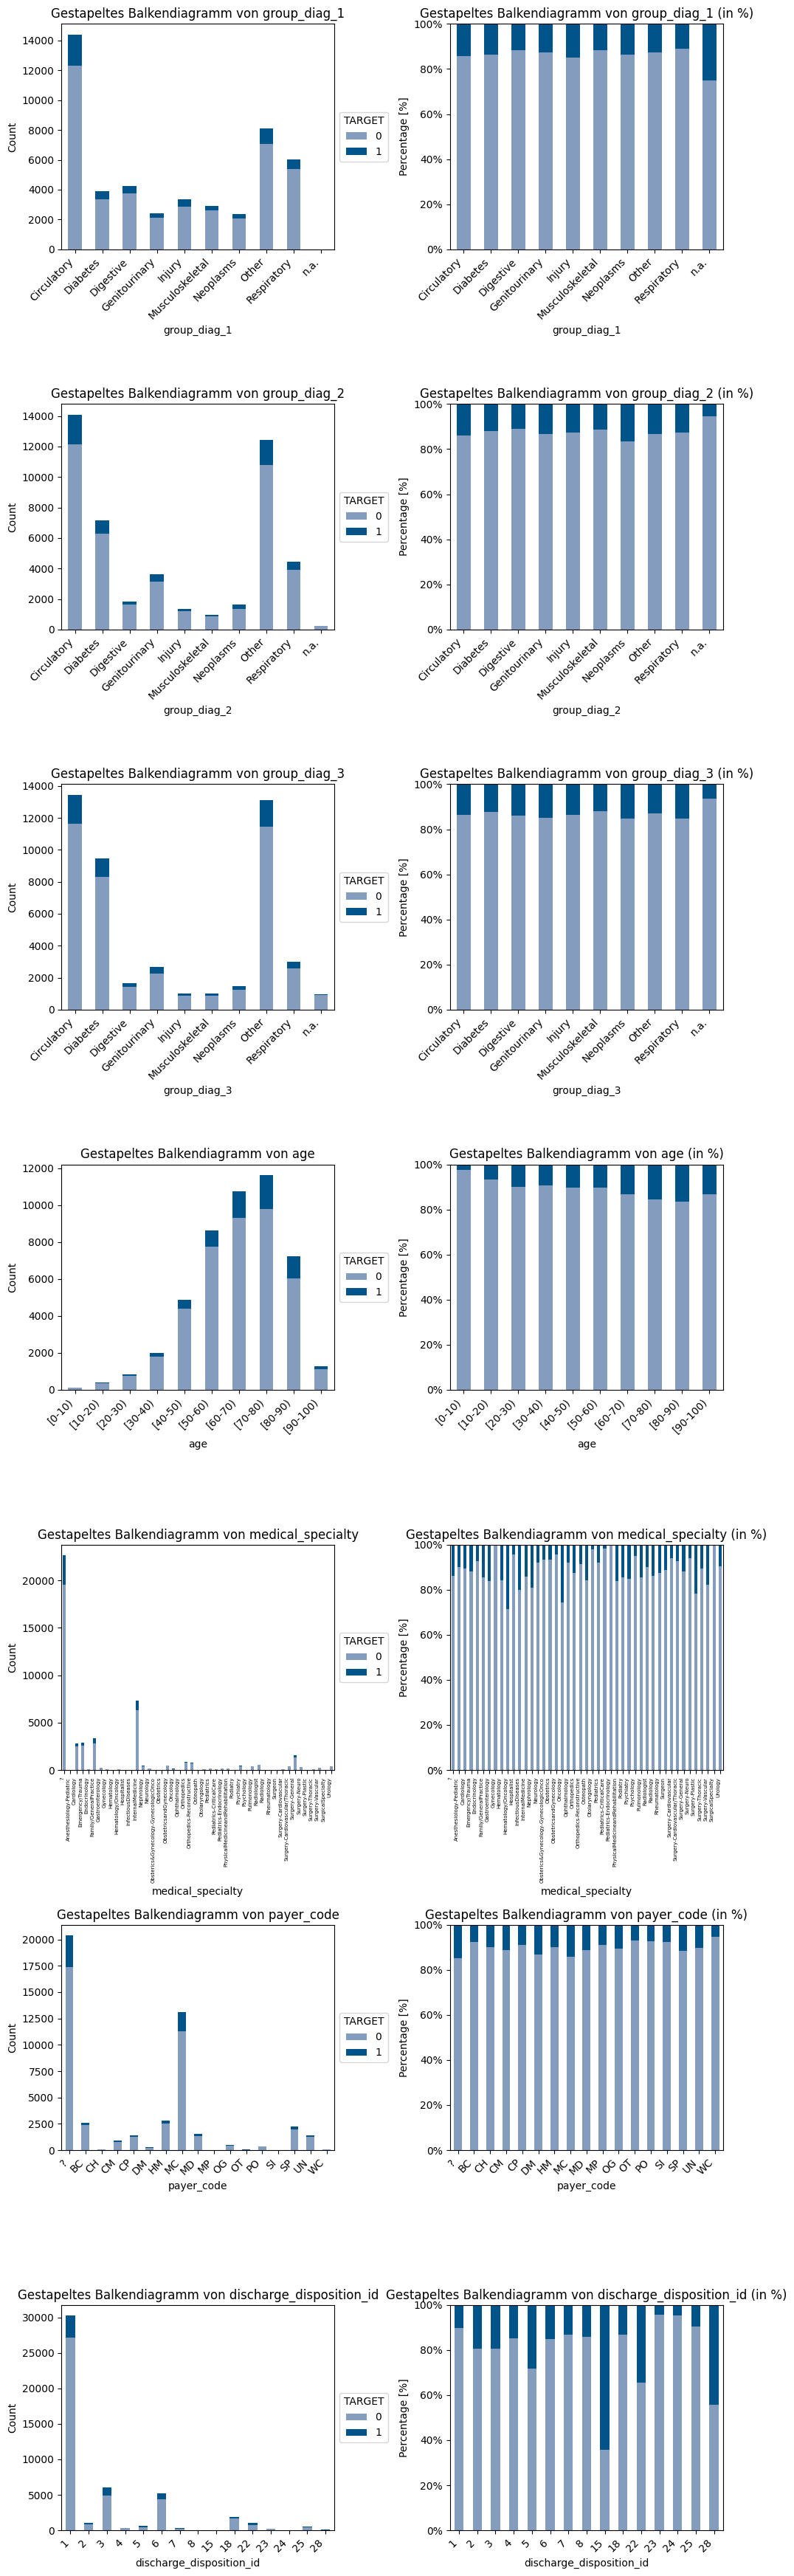

In [29]:
# Liste der ausgewählten kategorialen Merkmalen zur Analyse
selected_categorical_features = ['group_diag_1', 'group_diag_2', 'group_diag_3', 'age', 'medical_specialty', 'payer_code', 'discharge_disposition_id']

# Anzahl der Zeilen/Spalten für das Subplot-Raster
n_cols = 2  # verdoppelt, um Zähl- und Prozentdiagramme nebeneinander darzustellen
n_rows = len(selected_categorical_features)  # eine Zeile pro ausgewähltem Merkmal

# Erstellen der matplotlib-Abbildung
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Schleife über die Anzahl der kategorialen Merkmale
for idx, feature in enumerate(selected_categorical_features):
    #  Erstellung einer Kreuztabelle für gestapelte Balkendiagramme
    ctab = pd.crosstab(df_pre[feature], df_pre['TARGET'])
    
    # (1. Spalte) iterativ wird eine neue Teilfläche für Zählwerte hinzugefügt
    ax1 = plt.subplot(n_rows, n_cols, idx * n_cols + 1) 
    
    # Erstellung eines gestapelten Balkendiagramms für Zählwerte
    ctab.plot(kind="bar", stacked=True, color=[COLOR_LIGHT, COLOR_DARK], edgecolor="none", ax=ax1)
    
    # Zusätzliche Plot-Einstellungen für Subplot
    ax1.set_title(f'Gestapeltes Balkendiagramm von {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count')
    ax1.legend(title='TARGET', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=45, ha='right')
    if feature == 'medical_specialty':
        ax1.tick_params(axis='x', labelsize=5)
        plt.xticks(rotation=90, ha='right')
    
    # (2. Spalte) iterativ wird eine neue Teilfläche für Prozentwerte hinzugefügt
    ax2 = plt.subplot(n_rows, n_cols, idx * n_cols + 2)
    
    # Normalisierung der Kreuztabelle nach Zeilen und Multiplikation mit 100, um sie in Prozentwerte umzurechnen.
    ctab_normalized = ctab.div(ctab.sum(axis=1), axis=0) * 100
    
    # Erstellung eines gestapelten Balkendiagramms für Prozentwerte
    ctab_normalized.plot(kind="bar", stacked=True, color=[COLOR_LIGHT, COLOR_DARK], edgecolor="none", ax=ax2)
    
    # Zusätzliche Plot-Einstellungen für den Prozent-Subplot
    ax2.set_title(f'Gestapeltes Balkendiagramm von {feature} (in %)')
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Percentage [%]')
    ax2.legend().remove()
    plt.xticks(rotation=45, ha='right')
    if feature == 'medical_specialty':
        ax2.tick_params(axis='x', labelsize=5)
        plt.xticks(rotation=90, ha='right')
    
    # yticks in Prozenten für die prozentuale Unterverteilung
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(int(x))))
    ax2.set_ylim(0, 100)
    
# Verhindert, dass die Teilplots zu nahe beieinander liegen und zeigen den endgültigen Plot
plt.tight_layout()
plt.show()

Aus den Grafiken ergeben sich folgende Erkenntnisse für die kategoriellen Merkmale:

- Die drei Diagnose-Merkmale *group_diag_1*, *group_diag_2* und *group_diag_3* haben deutliche Unterschiede in der Anzahl der Beobachtungen der einzelnen Ausprägungen (Abbildungen auf der linken Seite), die Anteile der frühzeitigen Wiedereinweisungen ist allerdings in allen Ausprägungen ähnlich hoch (Abbildungen auf der rechten Seite). Die Ausnahme ist die Ausprägung *n.a.*, allerdings bei vernachlässigbarer Anzahl von Beobachtungen.
- Der Anzeil der frühzeitigen Wiedereinweisungen steigt mit zunehmenden Alter *age* merklich an.
- Das Merkmal *medical_specialty* hat die mit Abstand höchste Anzahl von Ausprägungen, die trotz gewählter kleiner Schrift kaum lesbar sind. Der Anteile der frühzeitigen Wiedereinweisungen schwankt zwischen den einzelnen Ausprägungen deutlich, allerdings ist die absolute Anzahl der Beobachtungen bei vielen Ausprägungen sehr gering.
- Das Merkmal *payer_code* zeigt ebenfalls deutliche Unterschiede in der Anzahl der Beobachtungen der einzelnen Ausprägungen, es gibt allerdings keinen Ausreißer in den Anteilen der frühzeitigen Wiedereinweisungen.
- Das Merkmal *discharge_disposition_id* zeigt deutliche Unterschiede in der Anzahl der Beobachtungen der einzelnen Ausprägungen und deutliche Unterschiede in den Anteilen der frühzeitigen Wiedereinweisungen. Beispielsweise zeigt die Ausprägung "15" einen frühzeitigen Wiedereinweisungsanteil von über 60% bzw. "28" einen Anteile von über 40%. Das Merkmal hat alle Voraussetzungen für einen hohe Signifikanz in der Prognose der Zielvariable.

<h2 style="font-size:16px; font-weight:bold;">3.2 Analyse der numerischen Merkmale</h2>

Im Folgenden werden zentrale numerische Variablen analysiert, um Muster in Bezug auf frühzeitige Wiedereinweisung zu erkennen. Mithilfe von Kernel-Dichte-Schätzungen (KDE-Plots) wird die Dichteverteilung jedes Merkmals sowohl für Beobachtungen mit frühzeitiger Wiedereinweisung und ohne frühzeitiger Wiedereinweisung dargestellt. Durch den Vergleich dieser Verteilungen lassen sich numerische Prädiktoren identifizieren, die ein hohes prognostisches Potenzial besitzen – ein entscheidender Schritt für ein effektives Merkmalsengineering und den anschließenden Aufbau von Modellen im Rahmen binärer Klassifikationsaufgaben.

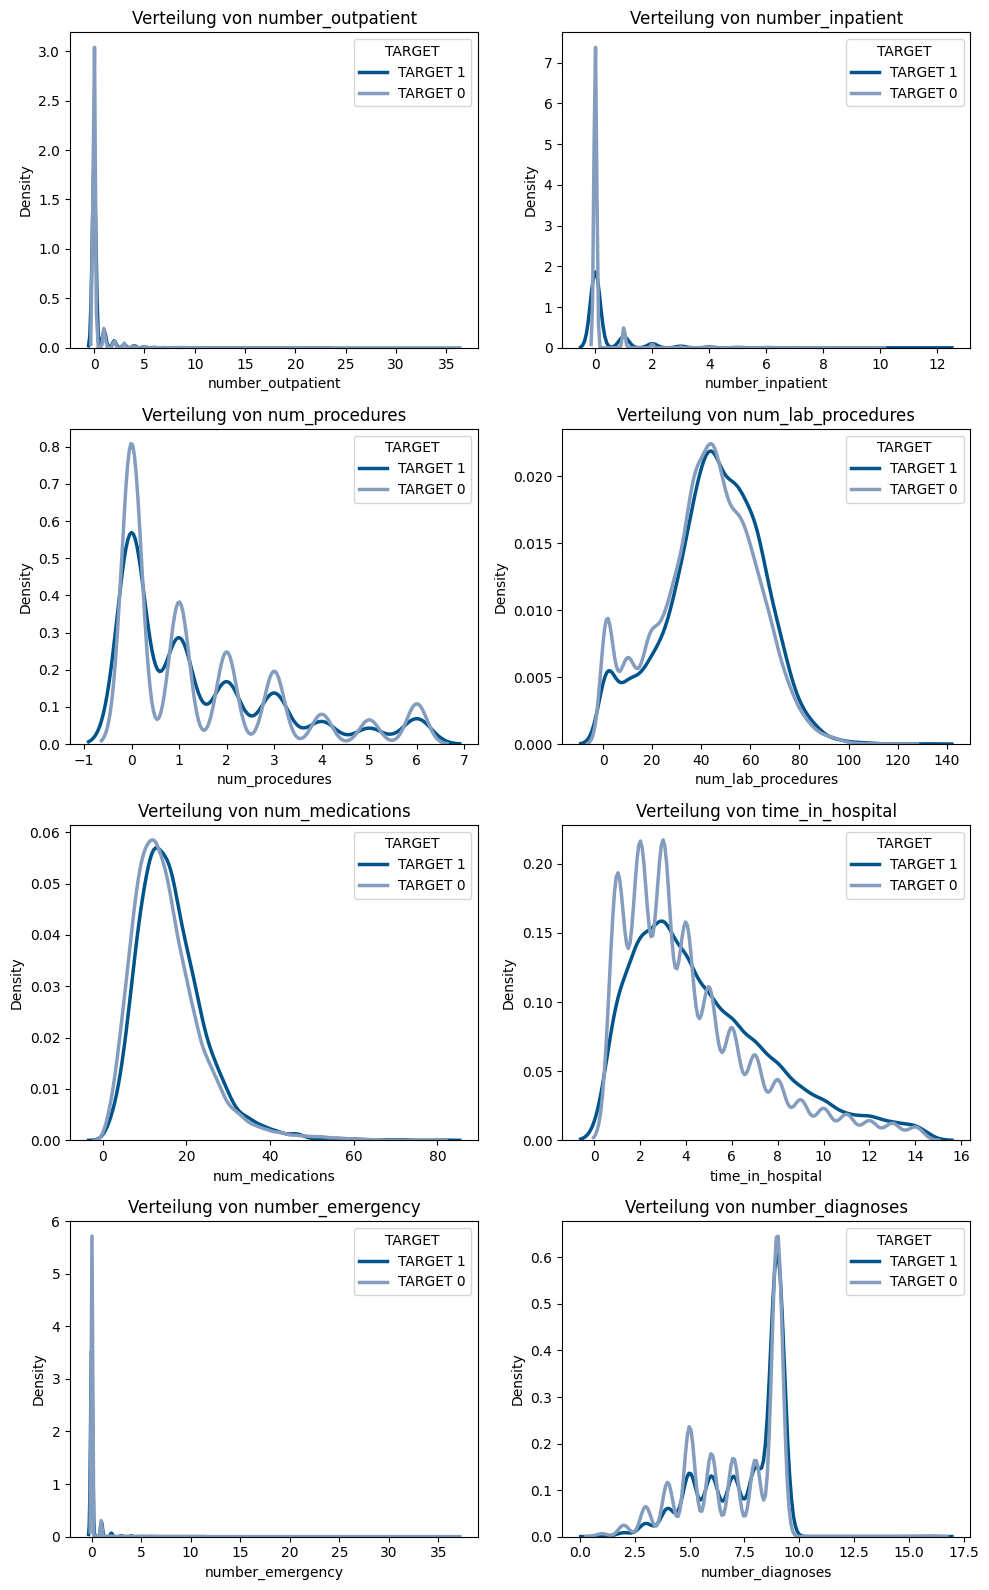

In [30]:
# Liste der ausgewählten numerischen Merkmalen zur Analyse
selected_numerical_features = ['number_outpatient', 'number_inpatient', 'num_procedures', \
                               'num_lab_procedures', 'num_medications', 'time_in_hospital', 'number_emergency', 'number_diagnoses']

# Anzahl der Plots, Einrichten des Subplot-Rasters
n_plots = len(selected_numerical_features)
n_cols = 2  # Anpassung der Anzahl der Spalten möglich
n_rows = (n_plots + n_cols - 1) // n_cols

# Matplotlib einrichten
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Schleife über die Liste der numerischen Merkmale
for idx, feature in enumerate(selected_numerical_features):
    ax = plt.subplot(n_rows, n_cols, idx + 1)
    
    # Erstellung einer Farbzuordnung basierend auf den TARGET-Werten unter der Annahme, dass die Werte 0 und 1 sind
    color_mapping = {0: COLOR_LIGHT, 1: COLOR_DARK}
    
    class_vals = df_pre['TARGET'].unique()
    for val in class_vals:
        subset = df_pre[df_pre['TARGET'] == val]
        
        # Ausgabe der KDE für jede Klasse
        sns.kdeplot(subset[feature], ax=ax, label=f'TARGET {val}', color=color_mapping[val], linewidth=2.5)
    
    # Zusätzliche Plot-Einstellungen
    ax.set_title(f'Verteilung von {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Density')
    ax.legend(title='TARGET')

# Verhindert, dass die Teilplots zu nahe beieinander liegen und zeigen den endgültigen Plot
plt.tight_layout()
plt.show()

Aus den Grafiken ergeben sich folgende Erkenntnisse für die numerischen Merkmale:

- Die Merkmale *number_outpatient* und *number_emergency* zeigen für beide Zielgruppen ein fast identisches Verhalten.
- Im Merkmal *number_inpatient* ist das wesentliche Gewicht der Zielgruppe 0 auf die beiden Ausprägungen 0 und 1 konzentriert, während in der Zielgruppe 1 auch höhere Werte auftreten.
- Im Merkmalen *num_procedures* liegt in der Zielgruppe 0 anteilsmäßig mehr Gewicht auf den kleineren Werten (0, 1, 2) als dies in der Zielgruppe 1 der Fall ist.
- Die Merkmale *num_lab_procedures* und *time_in_hospital* zeigen für die Zielgruppe 0 eine höhere Konzentration auf die niedrigeren Werte im Vergleich zur Zielgruppe 1.
- Das Merkmal *num_medications* zeigt einen geringfügig höhren Modal-Wert in der Zielgruppe 1 im Vergleich zur Zielgruppe 0.
- Das Merkmal *number_disgnoses* hat in den mittleren Bereichen (3 bis 10) eine höhere Konzentration in der Zielgruppe 0, der Modus liegt in beiden Gruppen allerdings beim selben Wert 9.

<h2 style="font-size:16px; font-weight:bold;">3.3 Feature Engineering: Erstellung von Verhältnis-basierten Merkmalen</h2>

Dieser Abschnitt wird auskommentiert und der Text gelöscht.

In [31]:
# Feature engineering
# df_pre['RATIO_CREDIT_ANNUITY'] = df_pre['AMT_CREDIT'] / df_pre['AMT_ANNUITY']
# df_pre['RATIO_GOODS_PRICE'] = df_pre['AMT_CREDIT'] / df_pre['AMT_GOODS_PRICE']
# df_pre['RATIO_CREDIT_INCOME'] = df_pre['AMT_CREDIT'] / df_pre['AMT_INCOME_TOTAL']
# df_pre['RATIO_ANNUITY_INCOME'] = df_pre['AMT_ANNUITY'] / df_pre['AMT_INCOME_TOTAL']
# df_pre['RATIO_ANNUITY_CREDIT'] = df_pre['AMT_ANNUITY'] / df_pre['AMT_CREDIT']
# df_pre['RATIO_DAYSEMPLOYED_DAYSBIRTH'] = df_pre['DAYS_EMPLOYED'] / df_pre['DAYS_BIRTH']
# Erstellt eine Kopie des DataFrame
# df_pre = df_pre.copy()

In [32]:
# Check correlations
# feature_selection = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
#                      'DAYS_EMPLOYED', 'DAYS_BIRTH', 'RATIO_CREDIT_ANNUITY',
#                      'RATIO_GOODS_PRICE', 'RATIO_CREDIT_INCOME', 'RATIO_ANNUITY_INCOME',
#                      'RATIO_ANNUITY_CREDIT', 'RATIO_DAYSEMPLOYED_DAYSBIRTH']

# Compute the correlation matrix
# corr = df_pre[feature_selection].corr()
# corr = df_pre[numerical_features].corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.show()

<h1 id="a04"
    style="font-size:18px; font-weight:bold;">
    4. Optimierung der CatBoost-Modellleistung durch die Integration neuer Merkmale
    <a class="anchor-link"
       href="#a04"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

Dieser Abschnitt wird auskommentiert und der Text gelöscht.

<h2 style="font-size:16px; font-weight:bold;">4.1 Neuanpassung des Basismodells unter Einbeziehung neuer Merkmale</h2>

In [33]:
# Divide the dataset in independent and dependent features
# X_pre = df_pre.drop(['TARGET','SK_ID_CURR'], axis=1)
# y = df_pre.TARGET

# Split dataset in 70% training, 15% validation and 15% test and devide into feature matrix x and label y
# X_pre_train, X_pre_valtest, y_train, y_valtest = train_test_split(X_pre, y, train_size=0.70, random_state=RANDOM_SEED)
# X_pre_val, X_pre_test, y_val, y_test = train_test_split(X_pre_valtest, y_valtest, test_size=0.50, random_state=RANDOM_SEED)

# print('Sample sizes for training, validation and test: ', X_pre_train.shape, X_pre_val.shape, X_pre_test.shape)

In [34]:
# Repeat CB with new features
# start_time = time.time()

# CB3 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED) 
# CB3.fit(X_pre_train,y_train, cat_features=categorical_features, logging_level='Silent')

# Calculate and print the running time in seconds
# elapsed_time_CB3 = time.time() - start_time
# print(f"Elapsed time (sec): {elapsed_time_CB3:.2f}")

In [35]:
# CatBoost: Plot most important features
# pd.Series(CB3.feature_importances_, index=X_pre_train.columns).nlargest(20).plot(kind='barh', color=COLOR_DARK).invert_yaxis()
# plt.show()

<h2 style="font-size:16px; font-weight:bold;">4.2 Modellbewertung und Modellvergleich</h2>

In [36]:
# Calculate and dispay the model AUC 
# auc_CB3 = roc_auc_score(y_val, CB3.predict_proba(X_pre_val)[:,1])
# print('The validation AUC of the CatBoost model with new features added is: {:.6f}'.format(auc_CB3))

In [37]:
# Data structures for model names and AUC
# mname = []
# mauc = []
# dict = {'Model name': mname,'AUC': mauc, }

In [38]:
# Store name and AUC of prevoisly fitted models 
# mname.append("CB1_quick")
# mauc.append(auc_CB1)
# mname.append("LR1_select")
# mauc.append(auc_LR1)
# mname.append("CB2_median")
# mauc.append(auc_CB2)
# mname.append("CB3_new_feat.")
# mauc.append(auc_CB3)

In [39]:
# def plot_auc(d,x1,x2,t): 
#     df_eval = pd.DataFrame(d)
#     #sns.set_style('darkgrid')
#     plt.title(" Model evaluation (AUC): " + t)
#     sns.barplot(data = df_eval, x = "AUC", y = "Model name", color = COLOR_DARK)
#     plt.xlim(x1, x2)
#     plt.show()

In [40]:
# plot_auc(dict,0.7,0.8, "Validation")

<h1 id="a05"
    style="font-size:18px; font-weight:bold;">
    5. Modellinterpretation für eines tieferen Verständnisses
    <a class="anchor-link"
       href="#a05"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

Dieser Abschnitt wird auskommentiert und der Text gelöscht.

<h2 style="font-size:16px; font-weight:bold;">5.1 Intrinsical interpretability of logistic regression</h2>

<h2 style="font-size:16px; font-weight:bold;">5.2 Explaining any machine learning model with SHAP</h2>

In [41]:
# Start timer to calculate the running time
# start_time = time.time()

# background set & foreground set
# shap_bg_set = shap.sample(X_pre_train, 240, random_state=RANDOM_SEED)
# shap_fg_set = shap.sample(X_pre_test,  120, random_state=RANDOM_SEED)

# Create a SHAP KernelExplainer using the background set
# explainer = shap.KernelExplainer(CB3.predict_proba, shap_bg_set)

# Calculate SHAP values for the foreground set
# shap_values = explainer.shap_values(shap_fg_set)[1]

# Calculate and print the running time in seconds
# elapsed_time_SHAP = time.time() - start_time
# print(f"Elapsed time (sec): {elapsed_time_SHAP:.2f}")

In [42]:
# Instance in the foreground set that is to be explained
# observation_index = 40

# Create an Explanation object for the instance in the foreground set
# explanation = shap.Explanation(values=shap_values[observation_index],
#                                base_values=explainer.expected_value[1],
#                                data=X_pre_test.iloc[observation_index])

# Plot the waterfall chart depicting the 10 most influential features
# shap.waterfall_plot(explanation, max_display=10)

In [43]:
# Calculate the mean absolute SHAP values for each feature for the positive class
# mean_shap_values_positive = np.abs(shap_values).mean(0)

# fig = plt.figure()

# Create a SHAP feature importance plot
# ax0 = fig.add_subplot(121)
# shap.bar_plot(mean_shap_values_positive, feature_names=X_pre_test.columns, max_display=10, show=False)

# Change the colormap of the artists
# for fc in plt.gcf().get_children():
#     # Ignore last Rectangle
#     for fcc in fc.get_children()[:-1]:
#         if (isinstance(fcc, matplotlib.patches.Rectangle)):
#             fcc.set_facecolor(COLOR_DARK)

# Arrange the layout of the plots
# title_obj = plt.title('Feature Importances via SHAP', fontsize=14)
# pos = title_obj.get_position()
# title_obj.set_position([0.0495, pos[1]])
# ax0.tick_params(axis='x', labelsize=10)
# ax0.tick_params(axis='y', labelsize=12)
# plt.xlabel('Mean absolute SHAP value', fontsize=12)

# Create a SHAP summary plot
# ax1 = fig.add_subplot(122)
# shap.summary_plot(shap_values, shap_fg_set, max_display=10, show=False)
# plt.gcf().axes[-1].set_aspect(30)
# plt.title('Impact on model prediction', fontsize=14)
# plt.xlabel('SHAP value', fontsize=12)
# ax1.tick_params(axis='x', labelsize=10)
# ax1.set_yticklabels([])
# ax1.set_ylim(-0.85, 9.85) 
# plt.gcf().set_size_inches(10,6)
# plt.tight_layout() 
# plt.show()

<h1 id="a06"
    style="font-size:18px; font-weight:bold;">
    6. Datenvorverarbeitung: Codierung, Skalierung und Subsampling
    <a class="anchor-link"
       href="#a06"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In diesem Abschnitt liegt der Fokus auf zwei zentralen Schritten der Datenvorverarbeitung: der Codierung, um kategoriale Daten für maschinelles Lernen nutzbar zu machen – ein notwendiger Schritt für viele Algorithmen –, sowie der Skalierung, um numerische Merkmale zu normalisieren und so die Effizienz der Algorithmen zu erhöhen. Zudem wird das Problem eines unausgeglichenen Klassenverhältnisses durch Subsampling-Methoden adressiert, um ein ausgewogeneres Trainingsdatenset zu schaffen und gleichzeitig die Rechenleistung der Modelle zu optimieren.

<h2 style="font-size:16px; font-weight:bold;">6.1 Codierung kategorialer Daten und Skalierung numerischer Werte</h2>

Allgemein benötigen ML-Modelle Eingabedaten in numerischer Form. In realen Datensätzen – wie auch in dem hier betrachteten – sind jedoch häufig kategoriale oder textuelle Daten enthalten. Daher ist eine Codierung erforderlich, um diese nicht-numerischen Daten in eine numerische Form zu überführen, die von ML-Algorithmen verarbeitet werden kann.

Die zwei am häufigsten verwendeten Codierungsmethoden sind:

- <u>Label-Encoding</u>: Wandelt jede Ausprägung einer Spalte in eine Zahl um. Diese Methode eignet sich besonders für ordinale Daten, bei denen eine natürliche Reihenfolge der Kategorien besteht.

- <u>One-Hot-Encoding</u>: Erstellt für jede Kategorie/Bezeichnung eine eigene binäre Spalte. Diese Methode wird für nominale Variablen eingesetzt, bei denen die Kategorien keine natürliche Reihenfolge oder Priorität aufweisen.

Im Folgenden wird ein One-Hot-Encoding auf den Datensatz angewendet, um ihn für ML-verfahren wie Künstliche Neuronale Netze oder XGBoost verarbeitbar zu machen.

In [44]:
# Ausgabe der Dimensionen des Datensatzes vor der Dummy-Codierung
print("Dimension des Datensatzes vor der Dummy-Codierung: ", df_pre.shape) 

# Durchführung der Dummy-Codierung auf den kategorialen Merkmalen, wobei die erste Kategorie entfernt wird
df = pd.get_dummies(df_pre, drop_first=True)

# Ausgabe der Dimensionen des Datensatzes nach der Dummy-Codierung, um die Veränderung zu verdeutlichen
print("Dimension des Datensatzes nach der Dummy-Codierung: ", df.shape)

Dimension des Datensatzes vor der Dummy-Codierung:  (47751, 51)
Dimension des Datensatzes nach der Dummy-Codierung:  (47751, 2249)


In [45]:
# Anpassung der Spaltennamen (LightGBM unterstützt keine speziellen JSON-Zeichen in Merkmalnamen)
new_names = {col: re.sub(r'[^A-Za-z0-9_]+', '', col) for col in df.columns}
new_n_list = list(new_names.values())
new_names = {col: f'{new_col}_{i}' if new_col in new_n_list[:i] else new_col for i, (col, new_col) in enumerate(new_names.items())}
df = df.rename(columns=new_names)
df.head()

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 8                  77               6               33   
1                 2                  49               1               11   
2                 4                  68               2               23   
3                 3                  46               0               20   
4                 5                  49               0                5   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 0                 8   
1                  0                 0                 0                 3   
2                  0                 0                 0                 9   
3                  0                 0                 0                 9   
4                  0                 0                 0                 3   

   TARGET  race_AfricanAmerican  race_Asian  race_Caucasian  race_Hispanic  \
0       1                 False       False            True          False   
1       0                 False       False            True          False   
2       0                 False       False            True          False   
3       0                 False       False            True          False   
4       0                  True       False           False          False   

   race_Other  gender_Male  age_1020  age_2030  age_3040  age_4050  age_5060  \
0       False        False     False     False     False     False      True   
1       False        False     False     False     False     False      True   
2       False        False     False     False     False     False     False   
3       False        False     False     False     False     False     False   
4       False        False     False     False      True     False     False   

   age_6070  age_7080  age_8090  age_90100  weight_025  weight_100125  \
0     False     False     False      False       False          False   
1     False     False     False      False       False          False   
2     False     False      True      False       False          False   
3     False     False      True      False       False          False   
4     False     False     False      False       False          False   

   weight_125150  weight_150175  weight_2550  weight_5075  weight_75100  \
0          False          False        False        False         False   
1          False          False        False        False         False   
2          False          False        False        False         False   
3          False          False        False        False         False   
4          False          False        False        False         False   

   admission_type_id_2  admission_type_id_3  admission_type_id_5  \
0                 True                False                False   
1                False                 True                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   admission_type_id_6  admission_type_id_7  admission_type_id_8  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   discharge_disposition_id_2  discharge_disposition_id_3  \
0                       False                       False   
1                       False                       False   
2                       False                        True   
3                       False                       False   
4                       False                       False   

   discharge_disposition_id_4  discharge_disposition

In [46]:
# Erneute Generierung der Stichproben

# Aufteilung des Datensatzes in 70 % Trainings-, 15 % Validierungs- und 15 % Testdaten und Aufteilung in Merkmalsmatrix (X) und Zielvariable (Y)
X = df.drop(['TARGET'], axis=1)
y = df.TARGET

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, train_size=0.70, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.50, random_state=RANDOM_SEED)

print('Stichprobengrößen für Training-, Validierung- und Testdatein: ', X_train.shape, X_val.shape, X_test.shape)

Stichprobengrößen für Training-, Validierung- und Testdatein:  (33425, 2248) (7163, 2248) (7163, 2248)


Skalierung ist im maschinellen Lernen entscheidend für Konsistenz, verbesserte Leistung und die Erfüllung von Algorithmusanforderungen:

1. <u>Einheitlichkeit</u>: Verschiedene Merkmale können unterschiedliche Skalen aufweisen, wie beispielsweise das Alter, das Werte von 0 bis 100 annehmen kann, während das Einkommen von Tausenden bis Millionen reicht. Diese unterschiedlichen Größenordnungen können Algorithmen dazu verleiten, Merkmale mit größeren Bereichen zu überbewerten.

2. <u>Effizienz</u>: Algorithmen wie Gradient Descent und K-Nearest-Neighbors (KNN) profitieren von Merkmalen, die auf einer ähnlichen Skala liegen, was zu besserer Leistung und schnellerer Konvergenz führt. Beispielsweise wird KNN stark von Merkmalen mit größeren Größenordnungen beeinflusst.

3. <u>Normierungsanforderung</u>: Bestimmte maschinelle Lernalgorithmen, wie neuronale Netze, erfordern, dass Eingabedaten skaliert werden, damit das Modelltraining effektiv durchgeführt werden kann.

Typische Skalierungstechniken sind die Min-Max-Skalierung, die Merkmale auf einen Bereich von 0 bis 1 anpasst, oder die Standard-Skalierung, bei der die Merkmale auf einen Mittelwert von null und eine Standardabweichung von 1 skaliert werden. Die geeignete Skalierungsmethode hängt vom verwendeten Algorithmus und den Eigenschaften der Daten ab. Im Folgenden wird die Standard-Skalierung verwenden.

In [47]:
# Erstellung der Liste: feature names  
feature_names=list(X.columns)

# Merkmals-Skalierung mit dem StandardScaler basierend auf den Verteilungen der Trainingsdaten
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = feature_names)
X_val = pd.DataFrame(scaler.transform(X_val), columns = feature_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns = feature_names)

<h2 style="font-size:16px; font-weight:bold;">6.2 Beeinflussen Codierung und Skalierung das Benchmark-Modell?</h2>

In [48]:
# Berechnung des CatBoost-Modells mit One-Hot-codierten und skalierten Daten
start_time = time.time()

CB4 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED) 
CB4.fit(X_train, y_train, logging_level='Silent')

# Berechnung und Anzeige der Laufzeit in SekundenX_va
elapsed_time_CB4 = time.time() - start_time
print(f"Verstrichene Zeit (sec): {elapsed_time_CB4:.2f}")

Verstrichene Zeit (sec): 12.03


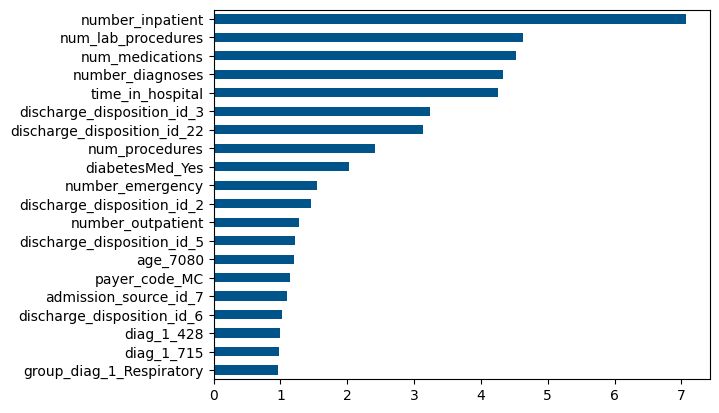

In [49]:
# CatBoost: Visualisierung der 20 wichtigsten Merkmale
pd.Series(CB4.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh', color=COLOR_DARK).invert_yaxis()
plt.show()

Die höchsten Importance-Werte zeigen numerische Merkmale, während die kategoriellen Mermale - im Vergleich zur Auswertung in Abschnitt 1.5. - nicht mehr dominierend sind.

In [50]:
# Berechnung und Anzeige der Modell-AUC 
auc_CB4 = roc_auc_score(y_val, CB4.predict_proba(X_val)[:,1])
print('Die Validierungs-AUC des CatBoost-Modells nach der Codierung und Skalierung beträgt:   {:.6f}'.format(auc_CB4))

Die Validierungs-AUC des CatBoost-Modells nach der Codierung und Skalierung beträgt:   0.702311


In [51]:
print(f"Verstrichene Zeit des CatBoost-Modells nach der Codierung und Skalierung (sec):  {elapsed_time_CB4:.2f}")

Verstrichene Zeit des CatBoost-Modells nach der Codierung und Skalierung (sec):  12.03


**Zusammenfassung und Interpretation**: Obwohl die Codierung der kategorialen Daten die Anzahl der Merkmale vervielfacht hat (50 vorher vs. 2.248 nach der Codierung), verringerte sich die Trainingszeit von CatBoost erheblich, während das AUC-Niveau nur geringfügig zurückging. Offenbar führt die direkte Verwendung der kategorialen Merkmale innerhalb von CatBoost zu einem deutlich erhöhten Rechenaufwand, was jedoch nur zu einer minimalen Verbesserung der Vorhersagequalität führt. 

Die Anzahl der Merkmale ist vor allem aufgrund der zahlreichen unterschiedlichen Ausprägungen von *diag_1*, *diag_2* und *diag_3* so deutlich angestiegen.

Im Folgenden sind die Vergleiche der wichtigsten Größen der beiden Modelle aufgelistet.

In [52]:
# Dimension der Trainingsdatei, Trainingszeit und Gütemaß vor Codierung und Skalierung
print(f"Training-Datei Dimension (Zeilen, Spalten):   {X_raw_train.shape}")
print(f"Verstrichene Zeit (sec): {elapsed_time_CB1:.2f}")
print(f'Die AUC des CatBoost-Modells mit Standard-Hyperparametern auf dem Validierungsdatensatz beträgt: {auc_CB1:.6f}')

# Dimension der Trainingsdatei, Trainingszeit und Gütemaß nach Codierung und Skalierung
print(f"Training-Datei Dimension (Zeilen, Spalten):   {X_train.shape}")
print(f"Verstrichene Zeit (sec): {elapsed_time_CB4:.2f}")
print('Die Validierungs-AUC des CatBoost-Modells nach der Codierung und Skalierung beträgt:   {:.6f}'.format(auc_CB4))

Training-Datei Dimension (Zeilen, Spalten):   (33425, 50)
Verstrichene Zeit (sec): 71.05
Die AUC des CatBoost-Modells mit Standard-Hyperparametern auf dem Validierungsdatensatz beträgt: 0.708208
Training-Datei Dimension (Zeilen, Spalten):   (33425, 2248)
Verstrichene Zeit (sec): 12.03
Die Validierungs-AUC des CatBoost-Modells nach der Codierung und Skalierung beträgt:   0.702311


<h2 style="font-size:16px; font-weight:bold;">6.3 Subsampling der Trainingsdaten</h2>

Glücklicherweise ist die frühzeitige Wiedereinweisung ein seltenes Ereignis, weshalb der Datensatz in Bezug auf die Zielvariable `TARGET` stark umbalanziert ist. Jeder frühzeitigen Wiedereinweisung in den Trainingsdaten stehen im Durchschnitt 6,7 Nicht-Wiedereinweisungen gegenüber. Es soll nun untersucht werden, ob dieses Ungleichgewicht beispielsweise auf ein Verhältnis von 1:2 reduziert werden kann, ohne dass die Qualität des resultierenden Modells beeinträchtigt wird, und ob das reduzierte Datenvolumen das Modelltraining beschleunigen kann. Der Ansatz 1:2 wird deshalb gewählt, weil er die Anzahl der Gruppe mit TARGET = 0 höchstmöglich reduziert, ohne das deutliche Übergewicht dieser Gruppe aufzuheben. In den nächsten Schritten wird geprüft, ob diese deutliche Reduktion der Bestandsgröße nicht zu keiner deutlichen Reduktion der Modellgüte führt.

Vor der Reduktion ist die TARGET-Variable im Trainings-Datensatz folgendermaßen aufgeteilt:

In [53]:
print("\nTARGET-Verteilung vor subsampling:\n", y_train.value_counts())


TARGET-Verteilung vor subsampling:
 TARGET
0    29033
1     4392
Name: count, dtype: int64


Insgesamt gibt es 4.392 Beobachtungen mit Ausprägung 1 in der Zielvariable. Bei einem gewünschten Verhältnis von 1:2 müssten diesen 4.392 Beobachtungen insgesamt 4.392 * 2 = 8.784 Beobachtungen mit Ausprägung 0 in der Zielvariable gegenüberstehen. Genau diese Aufteilung liefert ein *non_event_factor* von 2.

In [54]:
non_event_factor = 2 # Dementsprechend sollte die Ereignisrate 33,3 % betragen (statt 13 %)

# Sicherung des Trainings-, Validierungs- und Test-Datensatzes
X_train_all = X_train.copy(deep=True)
y_train_all = y_train.copy(deep=True)
X_val_all = X_val.copy(deep=True)
y_val_all = y_val.copy(deep=True)
X_test_all = X_test.copy(deep=True)
y_test_all = y_test.copy(deep=True)

In [55]:
# Subsampling: Erhöhung der Ereignisrate auf 1:nov_event_factor
Xs = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
Xs = pd.concat([Xs[Xs['TARGET']==1], Xs[Xs['TARGET']==0].sample(
           n = non_event_factor * len(Xs[Xs['TARGET']==1] ), random_state=RANDOM_SEED)],axis=0).sort_index(ascending=True)

# Überschreibt den kompletten Trainingsdaten mit der Teilstichprobe
X_train = Xs.drop(columns=["TARGET"])
y_train = Xs["TARGET"]

print("\nGröße des Trainingsdatensatzes nach Subsampling: ", X_train.shape)
print("\nTARGET-Verteilung nach subsampling:\n", y_train.value_counts())
print("\nReduktion des Datenvolumens (%): ", round((len(y_train)/len(y_train_all)-1)*100))


Größe des Trainingsdatensatzes nach Subsampling:  (13176, 2248)

TARGET-Verteilung nach subsampling:
 TARGET
0    8784
1    4392
Name: count, dtype: int64

Reduktion des Datenvolumens (%):  -61


<h2 style="font-size:16px; font-weight:bold;">6.4 Beeinflusst das Subsampling das Benchmark-Modell?</h2>

In [56]:
# Wiederhole CatBoost (CB) mit reduzierten Daten.
start_time = time.time()

CB5 = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED) 
CB5.fit(X_train, y_train, logging_level='Silent')

# Berechnung und Anzeige der Laufzeit in Sekunden
elapsed_time_CB5 = time.time() - start_time
print(f"Verstrichene Zeit (sec): {elapsed_time_CB5:.2f}")

Verstrichene Zeit (sec): 9.62


In [57]:
# Berechnung und Anzeige der Modell-AUC 
auc_CB5 = roc_auc_score(y_val, CB5.predict_proba(X_val)[:,1])
print('Die Validierungs-AUC des CatBoost-Modells mit einer Stichprobe ist: {:.6f}'.format(auc_CB5))

Die Validierungs-AUC des CatBoost-Modells mit einer Stichprobe ist: 0.699061


**Zusammenfassung und Fazit**: Die reduzierte Menge an Trainingsdaten verringert die Trainingszeit von CatBoost um zumindest 25%, bei minimaler Reduktion der Modellgüte. Subsampling der Trainingsdaten kann - vor allem bei größeren Datensätzen - ein entscheidender Faktor sein, um das Modelltraining zu beschleunigen und insbesondere die Hyperparameteroptimierung effizienter zu gestalten. Im Folgenden wird der Fokus auf diesem subsampleten Datensatz mit einer erhöhten Ereignisrate von 33,3 % liegen.

Im Folgenden sind die Vergleiche der wichtigsten Größen der beiden Modelle aufgelistet.

In [58]:
# Dimension der Trainingsdatei, Trainingszeit und Gütemaß vor Subsampling
print(f"Training-Datei Dimension (Zeilen, Spalten):   {X_train_all.shape}")
print(f"Verstrichene Zeit (sec): {elapsed_time_CB4:.2f}")
print('Die Validierungs-AUC des CatBoost-Modells nach der Codierung und Skalierung beträgt:   {:.6f}'.format(auc_CB4))

# Dimension der Trainingsdatei, Trainingszeit und Gütemaß nach Subsampling
print(f"Training-Datei Dimension (Zeilen, Spalten):   {X_train.shape}")
print(f"Verstrichene Zeit (sec): {elapsed_time_CB5:.2f}")
print('Die Validierungs-AUC des CatBoost-Modells mit einer Stichprobe ist: {:.6f}'.format(auc_CB5))

Training-Datei Dimension (Zeilen, Spalten):   (33425, 2248)
Verstrichene Zeit (sec): 12.03
Die Validierungs-AUC des CatBoost-Modells nach der Codierung und Skalierung beträgt:   0.702311
Training-Datei Dimension (Zeilen, Spalten):   (13176, 2248)
Verstrichene Zeit (sec): 9.62
Die Validierungs-AUC des CatBoost-Modells mit einer Stichprobe ist: 0.699061


<h2 style="font-size:16px; font-weight:bold;">6.5 Modellvergleich</h2>

Das Balkendiagramm am Ende des Abschnittes zeigt einen Vergleich des Gütemaß AUC der bisher entwickelten Modelle.

Vorbereitung der Vergleiche:

In [59]:
# Struktur für den Modell-Namen und AUC
mname = []
mauc = []
dict = {'Modell-Name': mname,'AUC': mauc, }

In [60]:
# Speichern des Namens und des AUC der bisher gefitteten Modelle
mname.append("CB1_Standard") # Standard-CatBoost
mauc.append(auc_CB1)
mname.append("LR1_select") # Logistische Regression selected
mauc.append(auc_LR1)
mname.append("CB4_One_Hot_Encoding") # CatBoost mit One-Hot-Encoding
mauc.append(auc_CB4)
mname.append("CB5_Stichprobe") # CatBoost mit Stichprobe
mauc.append(auc_CB5)

In [61]:
def plot_auc(d,x1,x2,t): 
    df_eval = pd.DataFrame(d)
    #sns.set_style('darkgrid')
    plt.title(" Modellbewertung (AUC): " + t)
    sns.barplot(data = df_eval, x = "AUC", y = "Modell-Name", color = COLOR_DARK)
    plt.xlim(x1, x2)
    plt.show()

Vergleich der Model_Performance (AUC - höher ist besser):

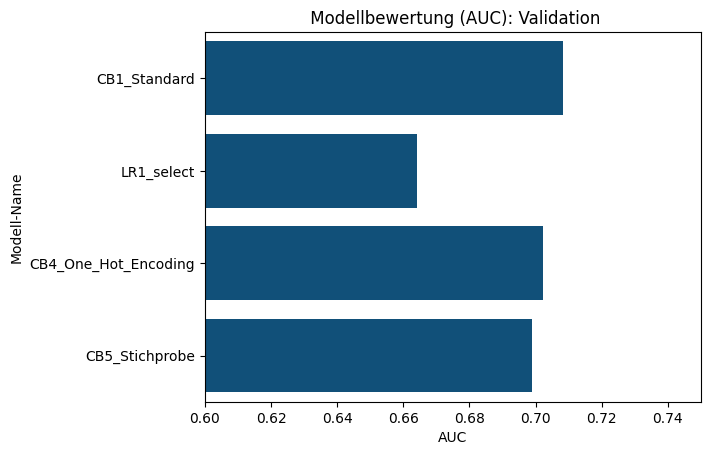

In [62]:
plot_auc(dict,0.60,0.75,"Validation")

Die Grafik zeigt, dass das CatBoost-Standardmodell die höchste Modellgüte bezogen auf das Gütemaß AUC hat, die beiden angepassten CatBoost-Modelle mit deutlich reduzierter Trainingszeit weisen eine geringfügig schlechtere Güte auf.

##  <font color='red'> Aufgabe PT3: Modelloptimierung anpassen und erweitern [Lernziel 5.1; 3 Punkte] </font>

* a) Die Abschnitte 7 und 8 sind nicht zu bearbeiten und sollen entfernt werden.
* b) Die Abschnitte 9 und 10 sind zu bearbeiten und anzupassen. Nehmen Sie je nach verwendeter Hardware (CPU/GPU) passende Einstellungen vor. Welche Änderungen an den HP-Grids sind vorzunehmen? Interpretieren Sie die Ergebnisse.
* c) Der Abschnitt 11 ist zunächst zu überspringen.

__Lösung:__


<h1 id="partc"
    style="font-size:22px; font-weight: 500; background-color: #E6E6E6; color: black; height: 50px; line-height: 46px; padding-left: 14px;">
    Part C: Optimierung und Anwendung von Machine-Learning-Modellen
    <a class="anchor-link"
       href="#partc"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
</h1>

Teil C befasst sich mit der Maximierung von Modellen durch die Feinabstimmung von Hyperparametern für führende Gradient-Boosting-Modelle wie CatBoost, LightGBM und XGBoost.
Eine detaillierte vergleichende Bewertung wird unter Verwendung von Validierungs- und Testdatensätzen durchgeführt, und der Einsatz dieser Modelle in risikobehafteten Bereichen wird untersucht. Abschließend werden die wesentlichen Erkenntnisse aus der Machine-Learning-Analyse zusammengefasst.
Zum Schluss werden die zentralen Lehren aus dem Machine-Learning-Prozess reflektiert.

<h1 id="a09"
    style="font-size:18px; font-weight:bold;">
    7. Hyperparameter-Optimierung in CatBoost
    <a class="anchor-link"
       href="#a09"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

Nun soll untersucht werden, ob die Lernrate und die Baumtiefe von CatBoost durch eine rechenintensive, cross-validierte zufällige Suche optimiert werden können (indem 40 Modelle angepasst werden).

Im ersten Code-Block wird die Grundlage für die Hyperparameter-Optimierung des CatBoostClassifier-Modells gelegt. Es wird ein Parameter-Gitter definiert, das den Bereich der Werte angibt, die für die Lernrate und die Tiefe der Bäume untersucht werden sollen. Hier wird loguniform für die Lernrate verwendet, um aus einer logarithmischen Verteilung zu sampeln, wodurch die Suche über unterschiedliche Skalen hinweg optimiert wird. Ähnlich stellt eine Liste von Ganzzahlen mögliche Werte für die Baumtiefe dar.

In [63]:
# Definition des Hyperparameter-Gitter, das durchsucht werden soll
param_grid_CB ={'learning_rate': loguniform(0.015, 0.06), 
                'depth':         [4,5,6,7]}

# Definition der Variablen für die Ergebnisse
sel_params_CB = ['param_learning_rate','param_depth','mean_test_score','rank_test_score']

Nach der initialen Einrichtung implementiert der nächste Code-Block die eigentliche Hyperparameter-Optimierung mit RandomizedSearchCV, einer Strategie, die den Parameterraum zufällig abtastet und eine Kreuzvalidierung mit vier Faltungen durchführt. Es wird eine angemessene Anzahl an Iterationen (n_iter=10) gewählt, um eine Balance zwischen Rechenzeit und Gründlichkeit der Suche zu erreichen. Die Ergebnisse werden erfasst, einschließlich der Laufzeit und der gefundenen besten Parameter.

In [64]:
cpu_count = os.cpu_count()
print(f"Anzahl der CPUs: {cpu_count}")

Anzahl der CPUs: 16


In [65]:
# CatBoostClassifier: Hyper-Parameter Optimierung mit RandomizedSearchCV
tic = time.time()

CB_rs = RandomizedSearchCV(CatBoostClassifier(iterations=1000, eval_metric='AUC'), param_grid_CB,
                           cv=4, n_iter=10, n_jobs=cpu_count-1, random_state=RANDOM_SEED, scoring='roc_auc')
CB_rs.fit(X_train, y_train, logging_level='Silent')

# Ausgabe der Laufzeit und der 5 besten Hyperparameter-Konstellationen
elapsed_time_CB6_train = time.time() - tic
print("Zeit (sec):" + "%6.0f" % (elapsed_time_CB6_train))
print("Beste Hyperparameter:",CB_rs.best_params_)
pd.DataFrame(CB_rs.cv_results_)[sel_params_CB].sort_values("rank_test_score").head()

Zeit (sec):   116
Beste Hyperparameter: {'depth': 6, 'learning_rate': np.float64(0.02835219211273624)}


,param_learning_rate,param_depth,mean_test_score,rank_test_score
4,0.028352,6,0.692884,1
2,0.034311,4,0.692082,2
5,0.034514,4,0.691743,3
9,0.019300,5,0.691296,4
6,0.036980,7,0.691120,5


Nach der Ermittlung der besten Hyperparameter werden diese verwendet, um ein neues CatBoostClassifier-Modell mit dem gesamten Trainingsdatensatz zu trainieren. Dieser Ansatz nutzt die optimierten Parameter, die theoretisch ein genaueres Modell liefern sollten.

In [66]:
# CatBoostClassifier: Berechnung des Modells mit den besten Hyperparametern 
tic = time.time()
CB6 = CatBoostClassifier(**CB_rs.best_params_, iterations=1000, eval_metric='AUC')
CB6.fit(X_train, y_train, logging_level='Silent')
elapsed_time_CB6 = time.time() - tic
print("Zeit (sec):" + "%6.0f" % (elapsed_time_CB6))

Zeit (sec):    10


Abschließend wird die Leistung des optimierten Modells bewertet, indem der AUC-Score mit dem Validierungsdatensatz berechnet wird.

In [67]:
# Berechnung und Vergleich des AUC-Wertes
auc_CB6 = roc_auc_score(y_val, CB6.predict_proba(X_val)[:,1])
print('Die Validierungs-AUC des CatBoost-Modells mit optimierten Hyperparametern ist: {:.6f}'.format(auc_CB6))
print('Vergleich: Die Validierungs-AUC des CatBoost-Modells mit Subsample-Daten ist: {:.6f}'.format(auc_CB5))

Die Validierungs-AUC des CatBoost-Modells mit optimierten Hyperparametern ist: 0.700521
Vergleich: Die Validierungs-AUC des CatBoost-Modells mit Subsample-Daten ist: 0.699061


Obwohl es deutlich mehr Trainingszeit erfordert, ist die Leistung des optimierten Modells leider nur unwesentlich besser.

<h1 id="a10"
    style="font-size:18px; font-weight:bold;">
    8. HP-Tuning LightGBM und XGBoost
    <a class="anchor-link"
       href="#a10"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In diesem Abschnitt liegt die Aufmerksamkeit auf die Hauptkonkurrenten von CatBoost: LightGBM und XGBoost. Durch einen umfangreicheren Hyperparameter-Tuning-Prozess und einer höheren Anzahl von evaluierten Modelle wird versucht, die Leistung dieser führenden Algorithmen unter einem ähnlichen Optimierungsregime zu benchmarken.

<h2 style="font-size:16px; font-weight:bold;">8.1 LightGBM: HP-Optimierung und Evaluierung</h2>

In [68]:
# Parameter-Suchbereich für LightGBM
param_grid_LGB = {'learning_rate':    loguniform(0.01, 0.05), 
                  'num_leaves':       [25,32,40,50],
                  'subsample':        uniform(0,1),
                  'colsample_bytree': uniform(0,1),
                  'verbose':          [-1]}

# Erstellung eine Liste zur Anzeige des Cross-Validation-Ergebnisses
sel_params_LGB = ['param_learning_rate', 'param_num_leaves', 'param_subsample',
                  'param_colsample_bytree', 'mean_test_score', 'rank_test_score']

In [69]:
# LGBMClassifier: Hyperparameter-Optimierung mit RandomizedSearchCV
tic = time.time()

LGB_rs = RandomizedSearchCV(LGBMClassifier(device='cpu', n_estimators=1000),
                            param_grid_LGB, cv=4, n_iter=10, scoring='roc_auc',
                            n_jobs=cpu_count-1, random_state=RANDOM_SEED)
LGB_rs.fit(X_train, y_train)

# Ausgabe der Laufzeit und der besten Hyperparameter-Konstellationen
elapsed_time_LGB_train = time.time() - tic
print("Verstrichene Zeit (sec):" + "%6.0f" % (elapsed_time_LGB_train))
print("Beste Parameters:", LGB_rs.best_params_)
pd.DataFrame(LGB_rs.cv_results_)[sel_params_LGB].sort_values("rank_test_score").head()

Verstrichene Zeit (sec):    56
Beste Parameters: {'colsample_bytree': np.float64(0.450499251969543), 'learning_rate': np.float64(0.01021578654566751), 'num_leaves': 25, 'subsample': np.float64(0.9656320330745594), 'verbose': -1}


,param_learning_rate,param_num_leaves,param_subsample,param_colsample_bytree,mean_test_score,rank_test_score
9,0.010216,25,0.965632,0.450499,0.690626,1
8,0.010776,40,0.680308,0.592415,0.688033,2
4,0.013434,50,0.611653,0.181825,0.686936,3
6,0.016003,50,0.232771,0.139494,0.683593,4
1,0.020494,40,0.058084,0.596850,0.681356,5


In [70]:
# LGBMClassifier: Berechnung des Modells mit den besten Hyperparametern 
tic = time.time()
LGB = LGBMClassifier(**LGB_rs.best_params_, device='cpu', n_estimators=1000)    
LGB.fit(X_train, y_train)
elapsed_time_LGB = time.time() - tic
print("Verstrichene Zeit (sec):" + "%6.0f" % (elapsed_time_LGB))

Verstrichene Zeit (sec):     2


In [71]:
# Berechnung und Anzeige des AUC-Wertes
auc_LGB = roc_auc_score(y_val, LGB.predict_proba(X_val)[:,1])
print('Die Validierungs-AUC des LightGBM-Modells mit optimierten Hyperparametern ist: {:.6f}'.format(auc_LGB))

Die Validierungs-AUC des LightGBM-Modells mit optimierten Hyperparametern ist: 0.700674


<h2 style="font-size:16px; font-weight:bold;">8.2 XGBoost: HP-Optimierung und Evaluierung</h2>

In [72]:
# Parameter-Suchbereich für XGBoost
param_grid_XGB = {'learning_rate':    loguniform(0.01, 0.05), 
                  'max_depth':        [4,5,6,7],
                  'subsample':        uniform(0,1),
                  'colsample_bytree': uniform(0,1)}

# Erstellung eine Liste zur Anzeige des Cross-Validation-Ergebnisses
sel_params_XGB = ['param_learning_rate', 'param_max_depth', 'param_subsample',
                  'param_colsample_bytree', 'mean_test_score', 'rank_test_score']

In [73]:
# XGBClassifier: Hyperparameter-Optimierung mit RandomizedSearchCV
tic = time.time()

XGB_rs = RandomizedSearchCV(XGBClassifier(n_estimators=1000, tree_method="hist", device="cpu"),
                            param_grid_XGB, cv=4, n_iter=10, scoring="roc_auc",
                            n_jobs=cpu_count-1, random_state=RANDOM_SEED)
XGB_rs.fit(X_train, y_train)

# Ausgabe der Laufzeit und der besten Hyperparameter-Konstellationen
elapsed_time_XGB_train = time.time() - tic
print("Verstrichene Zeit (sec):" + "%6.0f" % (elapsed_time_XGB_train))
print("Beste Parameters:", XGB_rs.best_params_)
pd.DataFrame(XGB_rs.cv_results_)[sel_params_XGB].sort_values("rank_test_score").head()

Verstrichene Zeit (sec):   203
Beste Parameters: {'colsample_bytree': np.float64(0.18182496720710062), 'learning_rate': np.float64(0.013433656868034296), 'max_depth': 7, 'subsample': np.float64(0.6116531604882809)}


,param_learning_rate,param_max_depth,param_subsample,param_colsample_bytree,mean_test_score,rank_test_score
4,0.013434,7,0.611653,0.181825,0.691217,1
8,0.010776,6,0.680308,0.592415,0.690978,2
7,0.027054,7,0.514234,0.090606,0.689330,3
6,0.016003,7,0.232771,0.139494,0.688133,4
2,0.026312,7,0.650888,0.866176,0.687033,5


In [74]:
# XGBClassifier: Berechnung des Modells mit den besten Hyperparametern 
tic = time.time()
XGB = XGBClassifier(**XGB_rs.best_params_, n_estimators=1000, tree_method="hist", device="cpu", eval_metric="auc")    
XGB.fit(X_train, y_train)
elapsed_time_XGB = time.time() - tic
print("Verstrichene Zeit (sec):" + "%6.0f" % (elapsed_time_XGB))

Verstrichene Zeit (sec):    14


In [75]:
# Berechnung und Anzeige des AUC-Wertes 
auc_XGB = roc_auc_score(y_val, XGB.predict_proba(X_val)[:,1])
print('Die Validierungs-AUC des XGBoost-Modells mit optimierten Hyperparametern ist: {:.6f}'.format(auc_XGB))

Die Validierungs-AUC des XGBoost-Modells mit optimierten Hyperparametern ist: 0.700521


Die Ergebnisse von LightGBM und XGBoost werden im nächsten Abschnitt vergleichen. Das Ende der Modellierungsansätze ist hiermit erreicht.

## <font color='red'> Aufgabe PT4: DXG-Diagnosegruppen bilden und Erzeugung von Embeddings vorbereiten </font>


__Aufgabe PT4-1: [Lernziel 5.1; 5 Punkte]__ 

Vorbereitend für die Abschnitte PT4 und PT5 werden für die kategoriellen Merkmale Anpassungen zur Erstellung von Embeddings durchgeführt.

*Hinweis:* In diesem Aufgabenabschnitt wird der Umfang des Notebooks CSN verlassen. Nachfolgende Aufgaben sind in der vorgegebenen Reihenfolge abzuarbeiten.

a) Lesen Sie den in den Materialien vorhandenen Datensatz `icd9_data.csv` ein und geben Sie die ersten drei Zeilen aus.

b) Mergen Sie den ursprünglichen Datensatz (aus Aufgabenteil PT1 1.2) mit dem Datensatz aus Teil a). Dabei sollen nur die Spalten `group`, `L2code`und `category`aus dem Datensatz aus a) erhalten bleiben. Im Anschluss sind drei Zeilen des neuen Datensatzes auszugeben.

c) Bezogen auf den Datensatz aus PT4-1 b): Welche Kategorien haben, bezogen auf die Wiedereinweisung, die höchsten absoluten Anteile? Geben Sie die drei höchsten Kategorien aus.

d) Das Feature `category` besitzt Ausprägungen, die teilweise schwach besetzt sind. Um auch für dieses Merkmal stabile Embeddings erzeugen zu können, soll wie folgt vorgegangen werden:
- Ergänzen Sie den Datensatz aus Teil b) um die Spalte `sum_target_cg`, die mit Hilfe des Ergebnisses aus Teil c) zu befüllen ist. Damit sollten die Ausprägungen von `category` die zugehörigen absoluten Anteile zugeordnet bekommen.
- Abschließend soll die Spalte `hdiag` hinzugefügt werden: Falls die Kategorie einer Zeile öfter als 20 Mal im Datensatz vorkommt, ist der Wert von `category` zu übernehmen. Falls nicht, dann ist Wert die Kombination des Strings "o." und dem Wert des Features `group`. Kürzen Sie den Inhalt der neuen Spalte im Anschluss auf maximal 30 Zeichen. Verifizieren Sie die Ergebnisse exemplarisch an zwei beliebigen Zeilen.

__Lösung:__

Einlese des Datensatzes *icd9_data.csv* und Ausgabe der ersten drei Zeilen:

In [76]:
# Einlese des Datensatzes in ein pandas DataFrame
df_icd9 = pd.read_csv("data/icd9_data.csv", sep=";", keep_default_na=False)

# Dimension des Datensatzes (Zeilen, Spalten)
print(f"Die Dimension des Datensatzes ist (Zeilen, Spalten): {df_icd9.shape}")

# Ausgabe der ersten drei Zeilen
df_icd9.head(3)

Die Dimension des Datensatzes ist (Zeilen, Spalten): (1163, 7)


,category_id,code,group,chapter,chapter_id,L2code,category
0,0,?,n.a.,n.a,0,n.a.,Not available
1,135,1,Digestive,Diseases of the digestive system,9,c9.1,Intestinal infection
2,1,10,Other,Infectious and parasitic diseases,1,c1.1,Tuberculosis


Weiterverwendet werden nur die drei Spalten *group*, *L2code* und *category*.

In [77]:
df_icd9[['group', 'L2code', 'category']].head(3)

,group,L2code,category
0,n.a.,n.a.,Not available
1,Digestive,c9.1,Intestinal infection
2,Other,c1.1,Tuberculosis


Anzeige der ersten drei Zeilen des ursprünglichen Datensatz aus Aufgabenteil PT1 1.2:

In [78]:
df_raw.head(3)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,TARGET,group_diag_1,group_diag_2,group_diag_3
0,Caucasian,Female,[50-60),?,2,1,1,8,?,Cardiology,77,6,33,0,0,0,401,997,560,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1,Circulatory,Injury,Digestive
1,Caucasian,Female,[50-60),?,3,1,1,2,?,Surgery-Neuro,49,1,11,0,0,0,722,305,250,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Musculoskeletal,Other,Diabetes
2,Caucasian,Female,[80-90),?,1,3,7,4,MC,InternalMedicine,68,2,23,0,0,0,820,493,E880,9,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,Injury,Respiratory,Other


Aus der Angabe war nicht vollständig klar, über welche Merkmale die beiden Datensätze gemerged werden sollen. Im Folgenden werden die Datensätze über die Spalte *diag_1* aus dem ursprünglichen Datensatz *df_raw* und der Spalte *code* aus dem eingelesenen Datensatz *icd9* gemerged. Aus dem ersten Aufgabenteil (R-Teil) ist bekannt, dass der Merge über diese Spalten vollständig ist (keine *nan* erzeugt)

In [79]:
df_analysis = pd.merge(df_raw, df_icd9[['code', 'group', 'L2code', 'category']], left_on=['diag_1'], right_on=['code'], how='inner').drop(columns='code')

In [80]:
# Vergleich der Dimensionen der drei Datensätze (Zeilen, Spalten)
print(f"Die Dimension des Datensatzes ist (Zeilen, Spalten): {df_icd9.shape}")
print(f"Die Dimension des Datensatzes ist (Zeilen, Spalten): {df_raw.shape}")
print(f"Die Dimension des Datensatzes ist (Zeilen, Spalten): {df_analysis.shape}")

Die Dimension des Datensatzes ist (Zeilen, Spalten): (1163, 7)
Die Dimension des Datensatzes ist (Zeilen, Spalten): (47751, 51)
Die Dimension des Datensatzes ist (Zeilen, Spalten): (47751, 54)


Der neue Datensatz *df_analysis* hat 54 Spalten. Dies entspricht den ursprünglichen 51 Spalten und den drei neuen Spalten aus dem Datensatz *df_icd9*.

Zur Sicherheit wird der Datensatz auf Auffälligkeiten untersucht:

In [81]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47751 entries, 0 to 47750
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      47751 non-null  object
 1   gender                    47751 non-null  object
 2   age                       47751 non-null  object
 3   weight                    47751 non-null  object
 4   admission_type_id         47751 non-null  object
 5   discharge_disposition_id  47751 non-null  object
 6   admission_source_id       47751 non-null  object
 7   time_in_hospital          47751 non-null  int64 
 8   payer_code                47751 non-null  object
 9   medical_specialty         47751 non-null  object
 10  num_lab_procedures        47751 non-null  int64 
 11  num_procedures            47751 non-null  int64 
 12  num_medications           47751 non-null  int64 
 13  number_outpatient         47751 non-null  int64 
 14  number_emergency      

Alle Merkmale zeigen den erwarteten Variablen-Typen bzw. gibt es keine fehlenden Datensätze.

Im Folgenden werden zunächst alle Beobachtungen mit frühzeitiger Wiedereinweisung gefiltert (TARTGE = 1), danach nach *category* gruppiert und die Anzahl pro Gruppe ermittelt. Das Ergebnis wird absteigend sortiert und die ersten drei Zeilen ausgegeben.

In [82]:
category_counts = pd.DataFrame(df_analysis[df_analysis['TARGET'] == 1].groupby('category').size().sort_values(ascending=False)).reset_index()
category_counts.columns = ['category', 'sum_target_cg']
display(category_counts.head(3))

,category,sum_target_cg
0,Congestive heart failure; nonhypertensive,443
1,Coronary atherosclerosis and other heart disease,429
2,Acute cerebrovascular disease,324


Die am häufigst vorkommenden Kategorien bezogen auf die frühzeitige Wiedereinweisung (TARGET = 1) sind *Congestive heart failure; nonhypertensive*, *Coronary atherosclerosis and other heart disease* bzw. *Acute cerebrovascular disease*.

In [83]:
print(f"Die Dimension des Datensatzes vor merge (Zeilen, Spalten): {df_analysis.shape}")
df_analysis = pd.merge(df_analysis, category_counts, on=['category'], how='left')
print(f"Die Dimension des Datensatzes nach merge (Zeilen, Spalten): {df_analysis.shape}")

Die Dimension des Datensatzes vor merge (Zeilen, Spalten): (47751, 54)
Die Dimension des Datensatzes nach merge (Zeilen, Spalten): (47751, 55)


Nach dem Merge kommt es zu na-Einträgen in der neuen Spalte *sum_target_cg*.

In [84]:
df_analysis['sum_target_cg'].isna().sum()

np.int64(176)

Die fehlenden Werte werden mit 0 befüllt.

In [85]:
df_analysis['sum_target_cg'] = df_analysis['sum_target_cg'].fillna(0).astype(int)

Probe:

In [86]:
df_analysis['sum_target_cg'].isna().sum()

np.int64(0)

Die Spalte *sum_target_cg* wurde neu zum Datensatz hinzugefügt. Die absoluten Anzahlen der Ausprägungen sind:

In [87]:
df_analysis['sum_target_cg'].value_counts().sort_values(ascending=False).reset_index()

,sum_target_cg,count
0,429,3835
1,443,2219
2,171,2170
3,322,2007
4,258,2006
...,...,...
62,23,158
63,15,134
64,25,98
65,14,89


Die Funktion *generate_hdiag* dient zur Erzeugung der neuen Spalte *hdiag*: falls für eine Kategorie *category* der Wert in der Spalte *sum_target_cg* größer als 20 ist (für diese Kategorie gab es mehr als 20 beobachtete frühzeitige Wiedereinweisungen), dann wird *hdiag* mit dem Wert aus *category* befüllt, falls nicht, dann mit einer Kombination aus "o." und dem Eintrag in der Spalte *group*. Anschließend wird die Länge der Einträge von *hdiag* auf maximal 30 Zeichen begrenzt.

In [88]:
def generate_hdiag(df_in):
    if df_in['sum_target_cg'] > 20:
        return df_in['category']
    else:
        return 'o.' + str(df_in['group'])

df_analysis['hdiag'] = df_analysis.apply(generate_hdiag, axis=1)

In [89]:
df_analysis['hdiag'] = df_analysis['hdiag'].str.slice(0, 30)

Absolute Anzahl von Beobachtungen pro Ausprägung von *hdiag*:

In [90]:
df_analysis['hdiag'].value_counts().sort_values(ascending=False)

hdiag
Coronary atherosclerosis and o    3835
Congestive heart failure; nonh    2219
Other lower respiratory diseas    2170
Diabetes mellitus without comp    2007
Acute myocardial infarction       2006
                                  ... 
Acute posthemorrhagic anemia       135
Chronic ulcer of skin               98
Maintenance chemotherapy; radi      83
Other liver diseases                72
o.n.a.                               8
Name: count, Length: 71, dtype: int64

Die Überprüfung erfolgt Anhand von jeweils drei Beobachtungen aus zwei Gruppen: die erste Gruppe, in der *sum_target_cg* größer als 20 ist und somit *hdiag* gleich *category* (eingeschränkt auf maximal 30 Zeichen) sein muss. 

In [91]:
df_analysis[['category','group','sum_target_cg','hdiag']][df_analysis['sum_target_cg']>20].sample(n=3, random_state=RANDOM_SEED)

,category,group,sum_target_cg,hdiag
4830,Diabetes mellitus with complications,Diabetes,213,Diabetes mellitus with complic
37513,Fracture of lower limb,Injury,58,Fracture of lower limb
43838,Coronary atherosclerosis and other heart disease,Circulatory,429,Coronary atherosclerosis and o


Die zweite Gruppe, in der *sum_target_cg* kleiner oder gleich 20 ist und somit *hdiag* gleich der Kombination aus "o." und *group* (eingeschränkt auf maximal 30 Zeichen) sein muss. 

In [92]:
df_analysis[['category','group','sum_target_cg','hdiag']][df_analysis['sum_target_cg']<=20].sample(n=3, random_state=RANDOM_SEED)

,category,group,sum_target_cg,hdiag
18890,Poisoning by psychotropic agents,Injury,7,o.Injury
15742,Other nutritional; endocrine; and metabolic di...,Other,19,o.Other
26683,Cancer of head and neck,Neoplasms,3,o.Neoplasms


Beide Gruppen erfüllen die Vorgaben.

__Aufgabe PT4-2: [Lernziele 2.2, 5.1; 10 Punkte]__

a) Nach erfolgter Anpassung des Merkmals `category` in der vorherigen Aufgabe werden weitere relevante, kategorielle Merkmale angepasst. Dabei soll wie folgt vorgegangen werden: 

Falls die Anzahl der Merkmalsausprägung kleiner als der Grenzwert 20 ist, dann ist

- bei dem Merkmal `discharge_disposition_id` die Ausprägung durch `99`,
- bei dem Merkmal `medical_specialty` die Ausprägung durch `ZZ`, 
- bei dem Merkmal `payer_code` die Ausprägung durch `ZZ`,
- bei dem Merkmal `admission_type` die Ausprägung durch `99`,
- bei dem Merkmal `age` durch die Ausprägung `[0,20)`

zu ersetzen. Nach erfolgter Ersetzung sind die Merkmalswerte mit ihrer Häufigkeit auszugeben.

b) Visualisieren Sie die unter a) sowie PT4-1 erstellten Merkmale geeignet. Mindestens eine Auffälligkeit ist dabei genauer zu analysieren.

__Lösung:__

**Bemerkung**: In PT4-1 sind die Merkmale *group*, *L2code* und *category* aus dem Datensatz *icd9_data.csv* in den Datensatz aufgenommen worden, wobei *group* und *category* im Merkmal *hdiag* zusammengeführt wurden. Aus der Angabenstellung war nicht klar, welche kategoriellen Variablen aus dem Aufgabenteil *PT4-1* in den Visualisierungen in *b)* und im Label-Encoding in der nächsten Aufgabe *PT5-1 a)* berücksichtigt werden sollen: "erzeugt" wurde in diesem Abschnitte nur das Merkmal *hdiag* und ist eine Kombination der beiden Merkmale *group* und *category*, allerdings wird *L2code* nicht verwendet. Aufgrund der zahlreichen Ausprägungen ist diese kategorielle Variable *L2code* nicht für eine Visualisierung bzw. für ein Embedding geeignet. Deshalb wird in den folgenden Analysen und weiteren Aufgabenteilen aus Aufgabenteil *PT4-1* nur das Merkmal *hdiag* weiter verwendet. Diese Merkmal ersetzt das Merkmal *category*.

In [93]:
print(f"Die Dimension des Datensatzes ist (Zeilen, Spalten): {df_analysis.shape}")

Die Dimension des Datensatzes ist (Zeilen, Spalten): (47751, 56)


Die folgende Funktion *count_values* ermittelt in einem Datensatz *df_in* die Anzahl aller Ausprägungen eines Merkmals *merkmal* und gibt ein DataFrame mit absteigender Reihenfolge zurück.

In [94]:
def count_values(df_in: pd.DataFrame, merkmal: str) -> pd.DataFrame:
    anzahl = df_in[merkmal].value_counts().sort_values(ascending=False).reset_index()
    anzahl.columns = [merkmal, 'Anzahl']
    return(anzahl)

Vor der Anpassung der fünf Merkmale werden für eine nachfolgende Prüfung die seltensten Merkmale aufgelistet. Die Listen enthalten alle Merkmale die weniger als 20 Mal vorkommen, bzw. die seltensten drei Ausprägungen, falls weniger als drei die Bedingung erfüllen.

In [95]:
# Liste der Merkmalen
selected_features = ['discharge_disposition_id', 'medical_specialty', 'payer_code', 'admission_type_id', 'age']

for feature in selected_features:
    anzahl = count_values(df_analysis, feature)
    weniger_als_20 = anzahl['Anzahl']<20
    if sum(weniger_als_20) < 3:
        anzahl = anzahl.tail(3)
    else:
        anzahl = anzahl[weniger_als_20]
    display(anzahl)

,discharge_disposition_id,Anzahl
12,8,49
13,15,28
14,24,21


,medical_specialty,Anzahl
38,Hematology,19
39,Osteopath,19
40,SurgicalSpecialty,18
41,Obsterics&Gynecology-GynecologicOnco,15
42,Obstetrics,15
43,Anesthesiology-Pediatric,10
44,Rheumatology,8


,payer_code,Anzahl
14,OT,42
15,SI,26
16,MP,22


,admission_type_id,Anzahl
4,5,2047
5,8,222
6,7,18


,age,Anzahl
7,[20-30),844
8,[10-20),392
9,[0-10),129


Die folgende Funktion *replace_rare_values* ersetzt in einem DataFrame *df_in* alle Ausprägungen eines Merkmals *merkmal* mit einem Ersatzwert *ersatzwert*, falls die Ausprägung weniger als 20 Mal vorkommt.

In [96]:
def replace_rare_values(df_in, merkmal, ersatzwert) -> pd.DataFrame:
    value_counts = df_in[merkmal].value_counts()

    # Identifiziere seltene Werte (weniger als 20 Vorkommen)
    seltene_werte = value_counts[value_counts < 20].index

    # Ersetze die seltenen Werte und wandelt das Ergebnis in ein Object-Type um
    df_neu = df_in.copy()
    df_neu[merkmal] = df_neu[merkmal].apply(lambda x: ersatzwert if x in seltene_werte else x).astype('object')
    
    return df_neu

In [97]:
df_analysis = replace_rare_values(df_analysis, "discharge_disposition_id", "99")
df_analysis = replace_rare_values(df_analysis, "medical_specialty", "ZZ")
df_analysis = replace_rare_values(df_analysis, "payer_code", "ZZ")
df_analysis = replace_rare_values(df_analysis, "admission_type_id", "99")
df_analysis = replace_rare_values(df_analysis, "age", "[0,20)")

In [98]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47751 entries, 0 to 47750
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      47751 non-null  object
 1   gender                    47751 non-null  object
 2   age                       47751 non-null  object
 3   weight                    47751 non-null  object
 4   admission_type_id         47751 non-null  object
 5   discharge_disposition_id  47751 non-null  object
 6   admission_source_id       47751 non-null  object
 7   time_in_hospital          47751 non-null  int64 
 8   payer_code                47751 non-null  object
 9   medical_specialty         47751 non-null  object
 10  num_lab_procedures        47751 non-null  int64 
 11  num_procedures            47751 non-null  int64 
 12  num_medications           47751 non-null  int64 
 13  number_outpatient         47751 non-null  int64 
 14  number_emergency      

Die nachfolgenden Listen zeigen alle Merkmalswerte mit ihren jeweiligen Ausprägungen. In dieser Auflistung sollten alle Ausprägungen zumindest 20 Mal vorkommmen.

In [99]:
for feature in selected_features:
    display(count_values(df_analysis, feature))

,discharge_disposition_id,Anzahl
0,1,30258
1,3,6029
2,6,5189
3,18,1921
4,2,1101
5,22,1073
6,5,664
7,25,494
8,4,375
9,7,296


,medical_specialty,Anzahl
0,?,22642
1,InternalMedicine,7341
2,Family/GeneralPractice,3312
3,Emergency/Trauma,2875
4,Cardiology,2811
5,Surgery-General,1528
6,Orthopedics,891
7,Orthopedics-Reconstructive,806
8,Radiologist,576
9,ObstetricsandGynecology,506


,payer_code,Anzahl
0,?,20378
1,MC,13115
2,HM,2821
3,BC,2601
4,SP,2259
5,MD,1522
6,CP,1391
7,UN,1385
8,CM,913
9,OG,475


,admission_type_id,Anzahl
0,1,24036
1,3,10056
2,2,8731
3,6,2641
4,5,2047
5,8,222
6,99,18


,age,Anzahl
0,[70-80),11623
1,[60-70),10736
2,[50-60),8615
3,[80-90),7242
4,[40-50),4885
5,[30-40),2003
6,[90-100),1282
7,[20-30),844
8,[10-20),392
9,[0-10),129


Im Merkmal *admission_type_id* kommt die Ausprägung 99 nur 18 Mal vor. Der Grund ist, dass im Originalbestand vor der Anpassung in diesem Merkmal nur die Ausprägung "7" weniger als 20 Mal vorgekommen ist, und diese als einzige Ausprägung durch 99 ersetzt wurde.

Die nachfolgende Funktion *bar_plot_from_raw* dient zur Erzeugung der Bar-Plots der in Aufgabe *PT4-2 a)* aufgelisteten kategoriellen Merkmale. Alle Ersatzausprägungen aus *PT4-2 a)* - falls es Ersätze gab - sind rot gekennzeichnet (er gab lediglich Ersätze in den Merkmalen *medical_specialty* und *admission_type_id*). Die einzelnen Ausprägungen sind nach der Anzahl der Beobachtungen absteigend sortiert.

In [100]:
# Funktion zum Erstellen eines Bar-Plots
def bar_plot_from_raw(df, column, extra, log_scale=False, rotation=0):
    counts = df[column].value_counts()
    counts.index = counts.index.astype(str)
#    counts = counts.sort_index()    # Falls diese Zeile nicht auskommentiert wird, werden die Ausprägungen alphabetisch geordnet
    colors = ['skyblue'] * len(counts)
    if extra in counts:
        index_extra = counts.index.tolist().index(extra)
        colors[index_extra] = 'red'

    plt.figure(figsize=(10, 5))
    plt.bar(counts.index.astype(str), counts.values, color=colors)
    plt.xlabel(column)
    if log_scale == False:
        plt.ylabel('Anzahl')
    else:
        plt.ylabel('Anzahl (log)')
        plt.yscale('log')         
    plt.title('Absolute Häufigkeit der Ausprägungen von '+column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=rotation)
    plt.tick_params(axis='x', labelsize=8)
    plt.tight_layout()
    plt.show()

Erzeugung der Bar-Plots der in Aufgabe *PT4-2 a)* aufgelisteten kategoriellen Merkmale.

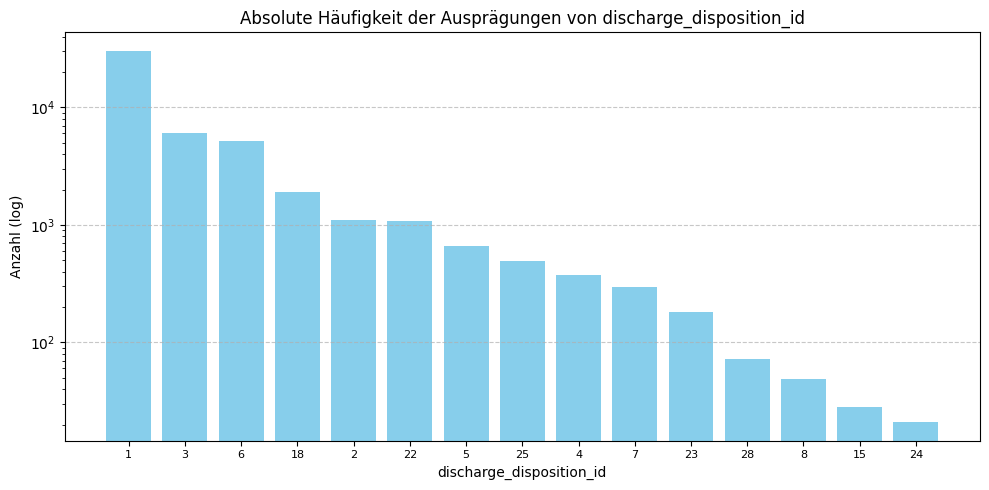

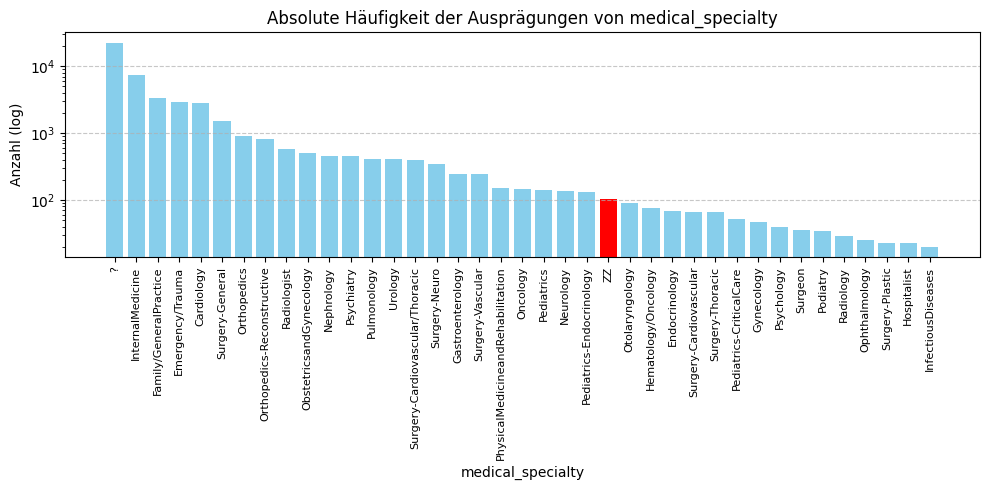

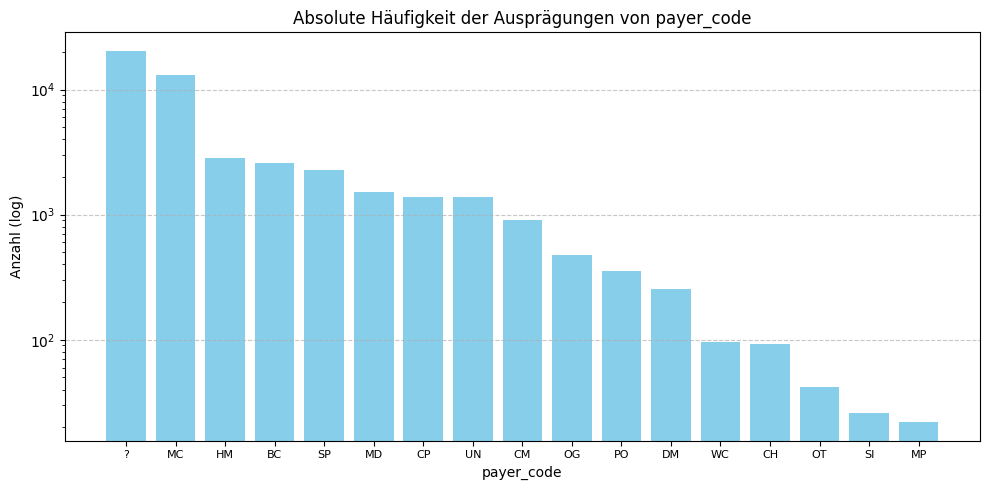

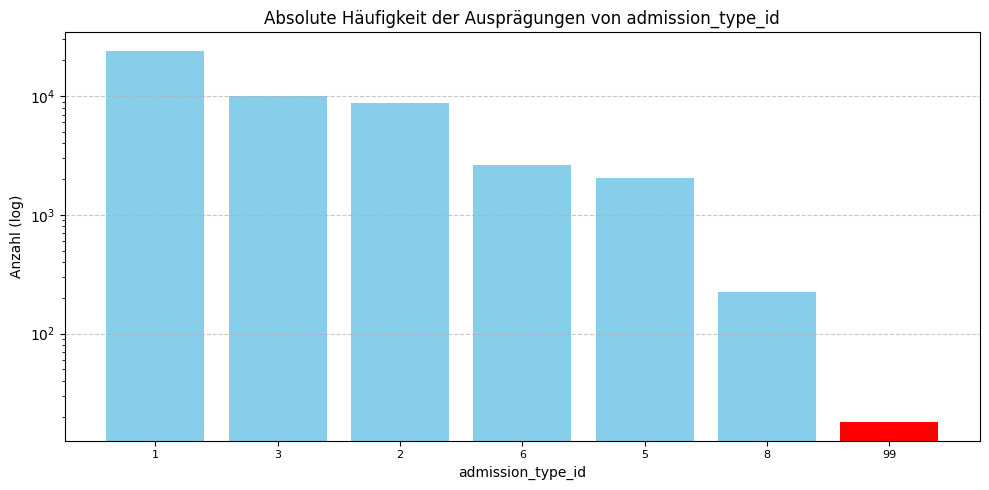

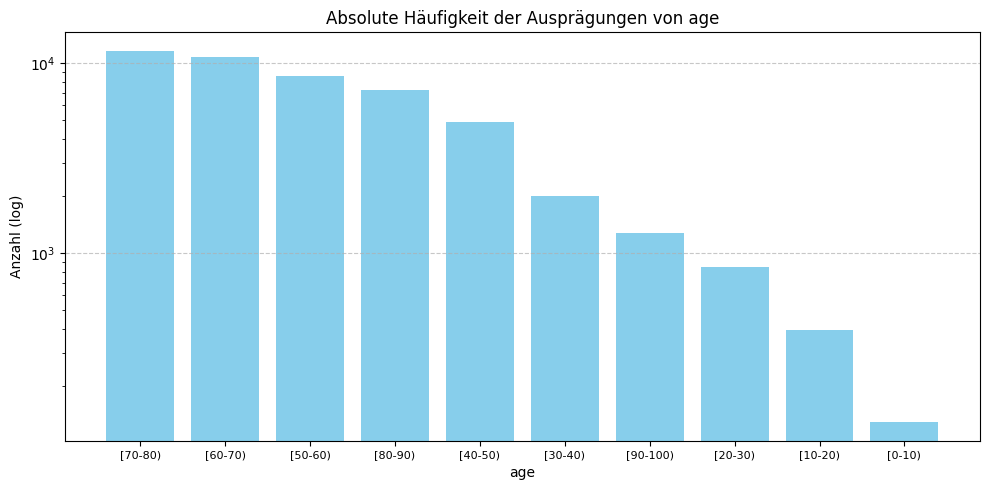

In [101]:
bar_plot_from_raw(df=df_analysis, column='discharge_disposition_id', extra="99", log_scale = True, rotation=0)
bar_plot_from_raw(df=df_analysis, column='medical_specialty', extra="ZZ", log_scale = True, rotation=90)
bar_plot_from_raw(df=df_analysis, column='payer_code', extra="ZZ", log_scale = True, rotation=0)
bar_plot_from_raw(df=df_analysis, column='admission_type_id', extra="99", log_scale = True, rotation=0)
bar_plot_from_raw(df=df_analysis, column='age', extra="[0,20)", log_scale = True, rotation=0)

Im Folgenden wird das kategorielle Merkmal *hdiag* dargestellt, wobei die Ausprägungen nach Anzahl der Beobachtungen absteigend sortiert sind. Alle Ausprägungen, die einen *sum_target_cg*-Wert kleiner 20 haben, sind orange gefärbt.

In [102]:
def bar_plot_sum_target(df, column, rotation=0):
    df['gruppe'] = np.where(df['sum_target_cg'] > 20, '>20', '<=20')
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='gruppe', order=df[column].value_counts().index)
    plt.title(column+'-Verteilung nach sum_target_cg-Grenze')
    plt.xlabel(column)
    plt.ylabel('Anzahl')
    plt.legend(title='Gruppe')
    plt.xticks(rotation=rotation)
    plt.tick_params(axis='x', labelsize=8)
    plt.tight_layout()
    plt.show()

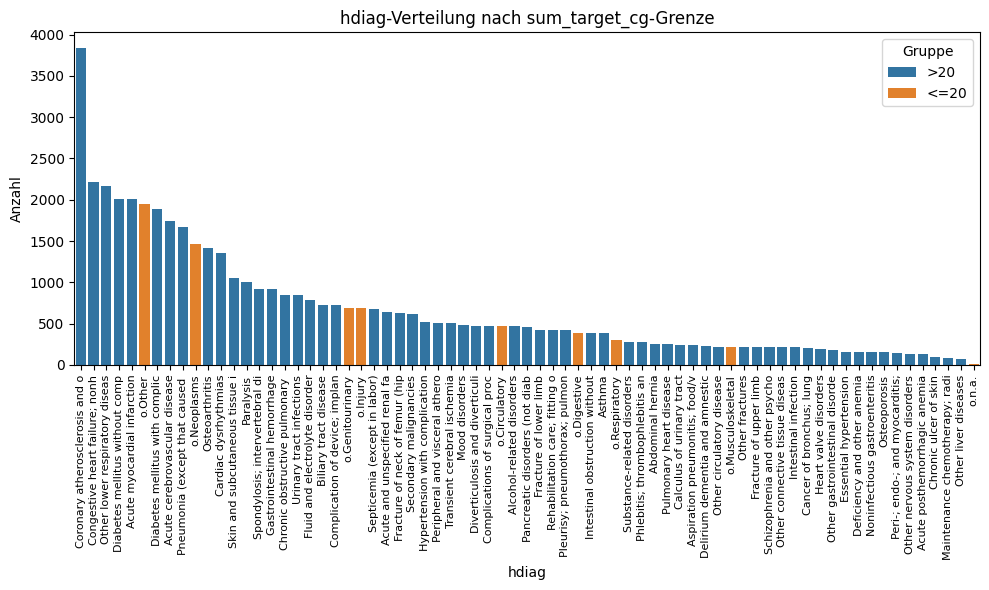

In [103]:
bar_plot_sum_target(df=df_analysis, column='hdiag', rotation=90)

Die letzte Grafik *hdiag-Verteilung nach sum_target_cg-Grenze* zeigt, dass 9 Ausprägungen aus dem Merkmal *group* entstanden sind. Diese 9 Ausprägungen umfassen insgesamte 155 Gruppen bzw. Ausprägungen des Merkmals *category*, wie folgende Auswertung zeigt.

In [104]:
df_analysis[df_analysis['sum_target_cg'] < 20].groupby(['hdiag', 'category']).size().reset_index(name='Anzahl')

,hdiag,category,Anzahl
0,o.Circulatory,Aortic and peripheral arterial embolism or thr...,75
1,o.Circulatory,Aortic; peripheral; and visceral artery aneurysms,113
2,o.Circulatory,Conduction disorders,178
3,o.Circulatory,Hemorrhoids,47
4,o.Circulatory,Late effects of cerebrovascular disease,44
...,...,...,...
150,o.Respiratory,Influenza,55
151,o.Respiratory,Lung disease due to external agents,5
152,o.Respiratory,Other upper respiratory disease,46
153,o.Respiratory,Other upper respiratory infections,61


Die Aufteilung der 155 Ausprägungen von *category* auf die einzelnen *hdiag*-Gruppen zeigt die folgende Auswertung.

In [105]:
df_analysis[df_analysis['sum_target_cg'] < 20].groupby(['hdiag'])['category'].nunique().reset_index(name='Anzahl Category')

,hdiag,Anzahl Category
0,o.Circulatory,7
1,o.Digestive,6
2,o.Genitourinary,15
3,o.Injury,13
4,o.Musculoskeletal,7
5,o.Neoplasms,31
6,o.Other,69
7,o.Respiratory,6
8,o.n.a.,1


Insgesamt könnte das Merkmal *category* durch die Verwendung von *hdiag* um 155-9=146 Ausprägungen reduziert werden.

##  <font color='red'> Aufgabe PT5: Erzeugung stabiler Diagnose-Embeddings mit performantem neuronalem Netzwerk</font>

__Aufgabe PT5-1: [Lernziel 5.1; 6 Punkte]__

a) Für die in den Aufgabenteilen PT4-1 und PT4-2 erzeugten kategoriellen Variablen ist ein Label-Encoding durchzuführen. Geben Sie von dem neuen Datensatz drei zufällige Zeilen aus.

b) Skalieren Sie die numerischen Features `number_inpatient`, `num_lab_procedures`, `number_diagnoses` sowie `num_medications`. Demonstrieren Sie die Wirkungsweise der Skalierung.

c) Zum Trainieren eines neuronalen Netzwerkes soll ein Datensatz bestehend aus den kategoriellen Merkmalen aus PT4-2 a) sowie den numerischen Features aus Teil b) dieser Aufgabe erstellt werden. Dieser ist im Verhältnis 70%/15%/15% (Anteil Training, Anteil Validierung, Anteil Test) aufzuteilen.

__Lösung:__

In diesem Anschnitt werden nur mehr die oben genannten kategoriellen Variablen und numerischen Features des Datensatzes verwendet. Die jeweiligen Namen werden in zwei Listen gespeichert. Für die spätere weitere Verwendung werden auch Listen mit abgekürzten Namen definiert.

In [106]:
# Ausgewählte kategorielle Variablen
selected_features = ['discharge_disposition_id', 'medical_specialty', 'payer_code', 'admission_type_id', 'age', 'hdiag']
selected_features_short = ['disc_disp', 'medi_spec', 'payer_code', 'admi_type', 'age', 'hdiag']

# Ausgewählte numerische Features
selected_numeric = ['number_inpatient', 'num_lab_procedures', 'number_diagnoses', 'num_medications']
selected_numeric_short = ['num_inpat', 'num_proc', 'num_diag', 'num_medi']

Für die weitere Analyse wird ein neuer Datensatz mit den oben definierten Spalten und der Zielvariable *TARGET* erzeugt.

In [107]:
df_nn = df_analysis[selected_features+selected_numeric+['TARGET']].copy(deep = True)

In [108]:
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47751 entries, 0 to 47750
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   discharge_disposition_id  47751 non-null  object
 1   medical_specialty         47751 non-null  object
 2   payer_code                47751 non-null  object
 3   admission_type_id         47751 non-null  object
 4   age                       47751 non-null  object
 5   hdiag                     47751 non-null  object
 6   number_inpatient          47751 non-null  int64 
 7   num_lab_procedures        47751 non-null  int64 
 8   number_diagnoses          47751 non-null  int64 
 9   num_medications           47751 non-null  int64 
 10  TARGET                    47751 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.0+ MB


In [109]:
print(f"Die Dimension des Datensatzes ist (Zeilen, Spalten): {df_nn.shape}")

Die Dimension des Datensatzes ist (Zeilen, Spalten): (47751, 11)


Auf den kategoriellen Variablen wird ein Label-Encoding durchgeführt. Zur späteren Verwendung in den Grafiken werden die Label-Namen in einer Liste *encoders* gespeichert.

In [110]:
encoders = {}
for feature in selected_features:
    df_nn[feature], encoders[feature] = df_nn[feature].astype(str).factorize()

In [111]:
# Ausgabe von 3 zufälligen Zeilen (nur kategorielle Merkmale)
df_nn[selected_features].sample(n=3, random_state=RANDOM_SEED)

,discharge_disposition_id,medical_specialty,payer_code,admission_type_id,age,hdiag
47523,5,11,0,1,0,1
8582,5,10,0,0,5,10
42024,1,10,1,2,4,14


In [112]:
print(f"Die Dimension des Datensatzes ist (Zeilen, Spalten): {df_nn.shape}")

Die Dimension des Datensatzes ist (Zeilen, Spalten): (47751, 11)


Der Datensatz nach dem Label-Encoding (Aufgabe PT5-1a) wird gespeichert, da er in Aufgabe PT6a noch benötigt wird.

In [113]:
df_nn_after_label = df_nn.copy(deep=True)

In [114]:
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47751 entries, 0 to 47750
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   discharge_disposition_id  47751 non-null  int64
 1   medical_specialty         47751 non-null  int64
 2   payer_code                47751 non-null  int64
 3   admission_type_id         47751 non-null  int64
 4   age                       47751 non-null  int64
 5   hdiag                     47751 non-null  int64
 6   number_inpatient          47751 non-null  int64
 7   num_lab_procedures        47751 non-null  int64
 8   number_diagnoses          47751 non-null  int64
 9   num_medications           47751 non-null  int64
 10  TARGET                    47751 non-null  int64
dtypes: int64(11)
memory usage: 4.0 MB


Nach dem Label-Encoding gibt es kein Merkmal mit Datentype "object" im Datensatz.

In der folgenden Schleife werden für jedes numerische Merkmal beispielshaft die ersten 5 Abbildungen "Label -> Nummer" aufgelistet.

In [115]:
print("Mapping der ursprünglichen Werte zu den numerischen Labels:")
for column, encoder in encoders.items():
    print(f"\nSpalte: {column}")
    # Zeige das Mapping: original -> numerisch der ersten 5 Einträge
    for i, (original, mapped) in enumerate(zip(encoder, range(len(encoder)))):
        if i >= 5:
            break
        print(f"  {original} -> {mapped}")

Mapping der ursprünglichen Werte zu den numerischen Labels:

Spalte: discharge_disposition_id
  1 -> 0
  3 -> 1
  5 -> 2
  2 -> 3
  25 -> 4

Spalte: medical_specialty
  Cardiology -> 0
  Surgery-Neuro -> 1
  InternalMedicine -> 2
  Orthopedics-Reconstructive -> 3
  Surgery-General -> 4

Spalte: payer_code
  ? -> 0
  MC -> 1
  BC -> 2
  UN -> 3
  MD -> 4

Spalte: admission_type_id
  2 -> 0
  3 -> 1
  1 -> 2
  6 -> 3
  8 -> 4

Spalte: age
  [50-60) -> 0
  [80-90) -> 1
  [30-40) -> 2
  [60-70) -> 3
  [70-80) -> 4

Spalte: hdiag
  Essential hypertension -> 0
  Spondylosis; intervertebral di -> 1
  Fracture of neck of femur (hip -> 2
  o.Other -> 3
  Urinary tract infections -> 4


Die numerischen Features werden auf Mittelwert 0 und Standardabweichung 1 skaliert.

In [116]:
scaler = StandardScaler()
df_nn[selected_numeric] = scaler.fit_transform(df_nn[selected_numeric])

In [117]:
# Ausgabe von 3 zufälligen Zeilen (nur numerische Merkmale)
df_nn[selected_numeric].sample(n=3, random_state=RANDOM_SEED)

,number_inpatient,num_lab_procedures,number_diagnoses,num_medications
47523,-0.259573,-1.229575,-1.515742,-1.122568
8582,-0.259573,0.133436,-0.049884,4.396497
42024,-0.259573,0.234400,0.927354,-0.300580


Test der Aufbereitung: Das Mittelwert der numerischen Features muss nach der Skalierung 0 sein, die Standardabweichung 1. Die beiden Werte werden für jedes Feature bestimmt und in einer Tabelle zusammengefasst.

In [118]:
stats = pd.DataFrame({
    'Mean': df_nn[selected_numeric].mean(),
    'Standard Deviation': df_nn[selected_numeric].std()
}, index=selected_numeric).round(4)

display(stats)

,Mean,Standard Deviation
number_inpatient,0.0,1.0
num_lab_procedures,0.0,1.0
number_diagnoses,-0.0,1.0
num_medications,-0.0,1.0


In [119]:
# Aufgabe von 3 zufälligen Zeilen des gesamten Datensatzes
df_nn.sample(n=3, random_state=RANDOM_SEED)

,discharge_disposition_id,medical_specialty,payer_code,admission_type_id,age,hdiag,number_inpatient,num_lab_procedures,number_diagnoses,num_medications,TARGET
47523,5,11,0,1,0,1,-0.259573,-1.229575,-1.515742,-1.122568,0
8582,5,10,0,0,5,10,-0.259573,0.133436,-0.049884,4.396497,0
42024,1,10,1,2,4,14,-0.259573,0.234400,0.927354,-0.300580,0


Überprüfung des Datensatzes und Datentypen der einzelnen Merkmale:

In [120]:
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47751 entries, 0 to 47750
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   discharge_disposition_id  47751 non-null  int64  
 1   medical_specialty         47751 non-null  int64  
 2   payer_code                47751 non-null  int64  
 3   admission_type_id         47751 non-null  int64  
 4   age                       47751 non-null  int64  
 5   hdiag                     47751 non-null  int64  
 6   number_inpatient          47751 non-null  float64
 7   num_lab_procedures        47751 non-null  float64
 8   number_diagnoses          47751 non-null  float64
 9   num_medications           47751 non-null  float64
 10  TARGET                    47751 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 4.0 MB


Split des aufbereiteten Datensatzes in Trainings-, Validierungs- und Testbestand im Verhältnis 70% / 15% / 15%.

In [121]:
# Konstanten für Datensplits
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Aufteilung der verbleibenden 30 % zu gleichen Teilen in Validierung und Test-Dateien

# Trennung der Merkmale (X) und der Zielvariable (y)
X_nn = df_nn[selected_features + selected_numeric]
y_nn = df_nn['TARGET']

# Aufteilung des Datensatzes in einen Trainingsdatensatz und einen kombinierten Validierungs- und Testdatensatz
X_nn_train, X_nn_val_test, y_nn_train, y_nn_val_test = \
    train_test_split(X_nn, y_nn, train_size=TRAIN_RATIO, random_state=RANDOM_SEED)

# Aufteilung der kombinierten Validierungs- und Testmenge in separate Validierungs- und Testmengen
X_nn_val, X_nn_test, y_nn_val, y_nn_test = \
    train_test_split(X_nn_val_test, y_nn_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED)

# Überprüfung der Dimensionen der Trainings-, Validierungs- und Testmengen (Zeilen, Spalten)
print(f"Training-Datei Dimension (Zeilen, Spalten):   {X_nn_train.shape}")
print(f"Validation-Datei Dimension (Zeilen, Spalten): {X_nn_val.shape}")
print(f"Test-Datei Dimension (Zeilen, Spalten):       {X_nn_test.shape}")

Training-Datei Dimension (Zeilen, Spalten):   (33425, 10)
Validation-Datei Dimension (Zeilen, Spalten): (7163, 10)
Test-Datei Dimension (Zeilen, Spalten):       (7163, 10)


__Aufgabe PT5-2: [Lernziel 5.1; 20 Punkte]__

a) Für die Embeddings der kategoriellen Features ist ein neuronales Netzwerk zu erstellen. Dabei ist Folgendes zu berücksichtigen:
- Als Eingabe erhält das Netzwerk den Datensatz aus PT5-1 c).
- Für jedes kategorielle Merkmal soll ein Embedding mit zwei Dimensionen erzeugt werden.
- Die Anzahl der hidden Layers kann frei gewählt werden. Die finale Entscheidung ist zu begründen.

b) Fitten Sie das unter a) definierte Netzwerk. Plotten Sie den Loss und Validation Loss über die Epochen des Trainings. Kommentieren Sie den Verlauf. Berechnen Sie im Anschluss den Validation Loss.

c) Um im nächsten Abschnitt eine Beurteilung der berechneten Embeddings vornehmen zu können, soll das Netzwerk aus Teil a) geklont und im Anschluss erneut gefittet werden. Der Validation Loss ist zu berechnen und auszugeben.

d) Extrahieren Sie die Embeddings aus beiden Netzwerken und plotten Sie diese paarweise nebeneinander. Welche Auffälligkeiten gibt es? Wie sind die Embeddings bezüglich Stabilität zu beurteilen?

__Lösung:__


Für die Definition der Embeddings werden zunächst für alle kategoriellen Variablen die Anzahl der Ausprägungen ermittelt.

In [122]:
features_sizes = [df_nn[col].nunique() +1 for col in selected_features]
print("Features Sizes:", features_sizes)

Features Sizes: [16, 40, 18, 8, 11, 72]


In [123]:
set_random_seed(RANDOM_SEED)

Im Folgenden wird das neuronale Netz definiert und aufgebaut. Für jede kategorielle Variable wird zunächst ein zweidimensionales Embedding definiert und mittels *Flattern* in eine eindimensionale Struktur transformiert.

Alle Input-Merkmale (Embedding der kategoriellen Variablen und die vier numerischen Merkmale) werden im Layer *merged_input* zusammengefasst.

Der Trainingsbestand hat lediglich knapp über 33.300 Beobachtungen. Deshalb wird eine Struktur mit wenigen Knoten in den hidden Layern verwendet (nur zwei Layer mit jeweils 16 Knoten), damit insgesamt die Anzahl der Gewichte nicht zu hoch wird. Zwischen den beiden hidden Layer und dem Output-Layer wird aus Regulierungsgründen jeweils ein Dropout-Layer mit Faktor 0.5 verwendet, um eine "allgemeinere" Struktur zu erhalten. In den hidden Layer wird jeweils die Aktivierungsfunktion *relu* verwendet, da diese in der Literatur für binäre Klassifizierung empfohlen wird. Im Output-Layer wird die Aktivierungsfunktion *sigmoid* verwendet, da Wahrscheinlichkeiten (für die frühzeitige Wiedereinweisung) im Bereich [0,1] geschätzt werden sollen.

In [124]:
# Definition der Embeddings für die kategoriellen Variablen
cat_inputs = [Input(shape=(1,), name=f"input_{feature}") for feature in selected_features_short]
embeddings = [
    layers.Embedding(input_dim=features_sizes[i], output_dim=2, name=f"embedding_{selected_features_short[i]}")(cat_inputs[i])
    for i in range(len(selected_features_short))
]

# Flatten der Embeddings, da sie aktuell Shape (1, 2) haben, allerdings (2,) benötigt wird
embeddings_flat = [layers.Flatten()(embed) for embed in embeddings]

# Eingabe für die 4 numerischen Variablen
num_input = Input(shape=(4,), name="numerical_input")

# Zusammenführung aller Input-Layer
merged_input = Concatenate()(embeddings_flat + [num_input])

# Einfaches neuronales Netz mit 2 hidden Layer und 2 Dropout-Layer.
hidden_layer_1 = Dense(16, activation='relu', dtype='float32')(merged_input)
dropout_layer_1 = Dropout(0.5)(hidden_layer_1)
hidden_layer_2 = Dense(16, activation='relu', dtype='float32')(dropout_layer_1)
dropout_layer_2 = Dropout(0.5)(hidden_layer_2)

# Ausgabe-Layer: Aktivierungs-Funktion "sigmoid", da Wahrscheinlichkeiten geschätzt werden.
output = Dense(1, activation='sigmoid', name='output')(dropout_layer_2)  # Für binäre Klassifikation

# Modell erstellen
model = Model(inputs=cat_inputs + [num_input], outputs=output, name="Base_model")

# Kompilieren
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['AUC'])

# Modellübersicht
model.summary()

Model: "Base_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_disc_disp (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_medi_spec (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_payer_code (InputLayer) │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_admi_type (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_age (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_hdiag (InputLayer)      │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_disc_disp           │ (None, 1, 2)              │              32 │ input_disc_disp[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_medi_spec           │ (None, 1, 2)              │              80 │ input_medi_spec[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_payer_code          │ (None, 1, 2)              │              36 │ input_payer_code[0][0]     │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_admi_type           │ (None, 1, 2)              │              16 │ input_admi_type[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_age (Embedding)     │ (None, 1, 2)              │              22 │ input_age[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_hdiag (Embedding)   │ (None, 1, 2)              │             144 │ input_hdiag[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 2)                 │               0 │ embedding_disc_disp[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 2)                 │               0 │ embedding_medi_spec[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_2 (Flatten)           │ (None, 2)                 │               0 │ embedding_payer_code[0][0] │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 891 (3.48 KB)

 Trainable params: 891 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

Definition der Trainingsdatensätze: für die kategoriellen Merkmale wird ein eigener Input-Bereich je Embedded-Layer benötigt, der Input-Layer für die vier numerischen Merkmale hat Dimension vier und wird in einem Bereich übergeben.

In [125]:
X_cat_train = [X_nn_train[feature] for feature in selected_features]
X_num_train = X_nn_train[selected_numeric].values 
y_train_nn = y_nn_train.values

# Inputs zusammenfassen
X_train_input = X_cat_train + [X_num_train]

Das Training erfolgt mit einer Batch-Size von 32 und 50 Epochen. Die hohe Anzahl von Epochen wurde gewählt, da eine kleine Lernrate von 0.001 und bei den beiden Dropout-Layer die hohe Rate von 0.5 gewählt wurde.

In [126]:
# Training des Modells
epochs=50
tic = time.time()
history = model.fit(X_train_input, y_train_nn, batch_size=32, epochs=epochs, validation_split=0.2)
elapsed_time_NN_train = time.time() - tic

Epoch 1/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5102 - loss: 0.5293 - val_AUC: 0.6303 - val_loss: 0.3754
Epoch 2/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5623 - loss: 0.4080 - val_AUC: 0.6535 - val_loss: 0.3711
Epoch 3/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5882 - loss: 0.3927 - val_AUC: 0.6621 - val_loss: 0.3688
Epoch 4/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6221 - loss: 0.3819 - val_AUC: 0.6645 - val_loss: 0.3683
Epoch 5/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6258 - loss: 0.3802 - val_AUC: 0.6637 - val_loss: 0.3677
Epoch 6/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6407 - loss: 0.3759 - val_AUC: 0.6659 - val_loss: 0.3672
Epoch 7/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6512 - loss: 0.3736 - val_AUC: 0.6673 - val_loss: 0.3665
Epoch 8/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6628 - loss: 0.3710 - val_AUC: 0.6676 - val_loss: 0.3668
Epoch 9/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AU

Die nachfolgende Grafik zeigt den Verlauf der Loss-Größe auf den Trainings- und Validierungsdatein während den einzelnen Epochen des Trainings.

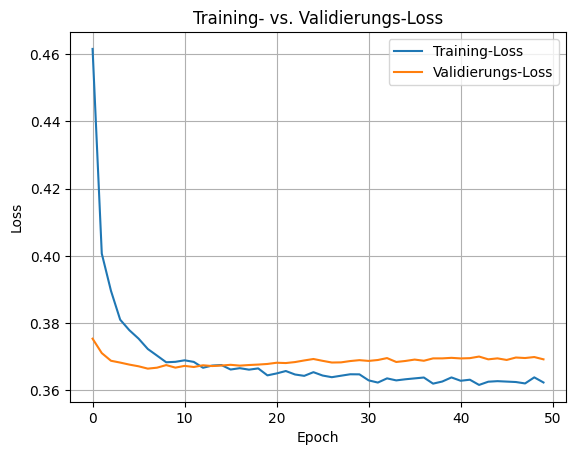

In [127]:
plt.plot(history.history['loss'], label='Training-Loss')
plt.plot(history.history['val_loss'], label='Validierungs-Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training- vs. Validierungs-Loss')
plt.legend()
plt.grid(True)
plt.show()

Der Loss und Validation Loss zeigt über die Epochen hinweg den erwarteten / erhofften Verlauf: der Loss (Fehlermaß der im Training verwendeten Beobachtungen) wird über die Epochen kleiner, d.h. die Differenz zwischen den Prognosen und tatsächlichen (beobachteten) Werten nimmt ab. Gleichzeitig sinkt der Validation Loss (der Fehler in den Beobachtungen, die nicht im Training verwendet wurden) leicht bzw. bleibt konstant. Ein steigender Validation Loss würde bedeuten, das Überanpassung ("auswendiglernen") vorliegt, d.h. das Modell wird immer weiter an die Trainingsdaten angepasst, allerdings gibt es eine immer schlechtere "Generalisierung" auf neue Daten.

In [128]:
validation_loss = history.history['val_loss']

In [129]:
print("Finaler Validation Loss:", validation_loss[-1])

Finaler Validation Loss: 0.3692563474178314


Im Folgenden werden die Validierungs-Daten für die Verwendung im Modell aufbereitet und der Validation-Loss sowie das Gütemaß AUC berechnet.

In [130]:
X_cat_val = [X_nn_val[feature] for feature in selected_features]
X_num_val = X_nn_val[selected_numeric].values 
y_val_nn = y_nn_val.values

# Inputs zusammenfassen
X_val_input = X_cat_val + [X_num_val]

Berechnung des Loss und des AUC der Validierungs-Daten. 

In [131]:
loss, auc_NN = model.evaluate(X_val_input, y_val_nn)

print("Test Loss:", loss)
print("Test AUC:", auc_NN)

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - AUC: 0.6745 - loss: 0.3633
Test Loss: 0.3630220592021942
Test AUC: 0.680487871170044


Zur Beurteilung der berechneten Embeddings wird das Modell zunächst geklont und neu berechnet.

In [132]:
model_clone = clone_model(model)

In [133]:
# Kompilieren
model_clone.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['AUC'])

# Modellübersicht
model_clone.summary()

Model: "Base_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_disc_disp (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_medi_spec (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_payer_code (InputLayer) │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_admi_type (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_age (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_hdiag (InputLayer)      │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_disc_disp           │ (None, 1, 2)              │              32 │ input_disc_disp[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_medi_spec           │ (None, 1, 2)              │              80 │ input_medi_spec[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_payer_code          │ (None, 1, 2)              │              36 │ input_payer_code[0][0]     │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_admi_type           │ (None, 1, 2)              │              16 │ input_admi_type[0][0]      │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_age (Embedding)     │ (None, 1, 2)              │              22 │ input_age[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_hdiag (Embedding)   │ (None, 1, 2)              │             144 │ input_hdiag[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 2)                 │               0 │ embedding_disc_disp[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 2)                 │               0 │ embedding_medi_spec[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_2 (Flatten)           │ (None, 2)                 │               0 │ embedding_payer_code[0][0] │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 891 (3.48 KB)

 Trainable params: 891 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

Durch das Klonen wurde die komplette Struktur des originalen Modells übernommen, allerdings nicht die Gewichte zwischen den Knoten. Diese werden für den folgende Training zufällig gesetzt und das Modell neu trainiert.

In [134]:
# Training des geklonten Modells mit denselben Datensätzen und Parametern wie im originalen Modell.
history_clone = model_clone.fit(X_train_input, y_train_nn, batch_size=32, epochs=epochs, validation_split=0.2)

Epoch 1/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5179 - loss: 0.5259 - val_AUC: 0.6375 - val_loss: 0.3732
Epoch 2/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5822 - loss: 0.4025 - val_AUC: 0.6551 - val_loss: 0.3688
Epoch 3/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6086 - loss: 0.3890 - val_AUC: 0.6660 - val_loss: 0.3666
Epoch 4/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6289 - loss: 0.3811 - val_AUC: 0.6669 - val_loss: 0.3657
Epoch 5/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6458 - loss: 0.3759 - val_AUC: 0.6674 - val_loss: 0.3654
Epoch 6/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6554 - loss: 0.3725 - val_AUC: 0.6683 - val_loss: 0.3657
Epoch 7/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6575 - loss: 0.3721 - val_AUC: 0.6678 - val_loss: 0.3653
Epoch 8/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6664 - loss: 0.3690 - val_AUC: 0.6672 - val_loss: 0.3658
Epoch 9/50
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AU

Die nachfolgende Grafik zeigt den Verlauf der Loss-Größe auf den Trainings- und Validierungsdatein während den einzelnen Epochen des Trainings.

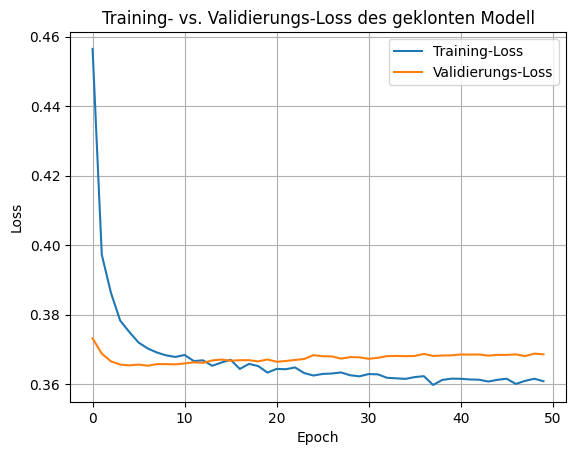

In [135]:
plt.plot(history_clone.history['loss'], label='Training-Loss')
plt.plot(history_clone.history['val_loss'], label='Validierungs-Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training- vs. Validierungs-Loss des geklonten Modell')
plt.legend()
plt.grid(True)
plt.show()

Der Loss und Validation Loss zeigt über die Epochen hinweg das selbe Verhalten wie das originale Modell.

In [136]:
validation_loss_clone = history_clone.history['val_loss']

In [137]:
print("Finaler Validation Loss:", validation_loss_clone[-1])

Finaler Validation Loss: 0.36859408020973206


Berechnung Validation-Loss sowie Gütemaß AUC für das geklonte Modell.

In [138]:
loss, auc_NN_clone = model_clone.evaluate(X_val_input, y_val_nn)

print("Test Loss:", loss)
print("Test AUC:", auc_NN_clone)

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - AUC: 0.6688 - loss: 0.3646
Test Loss: 0.3635779023170471
Test AUC: 0.6781099438667297


Die Extraktion der Embeddings aus den beiden Modellen erfolgt mittels Abfrage des ensprechenden Embedding-Layers und anschließender Auslese der Gewichte. Ein Embedding-Layer kann durch seinen Namen (oder seiner Positionsnummer im Modell) angesprochen werden. Beispielsweise wird der Embedding-Layer für *discharge_disposition_id* (bzw. Kurzbezeichnung *disc_disp*) durch ...

In [139]:
disc_disp_layer = model.get_layer('embedding_disc_disp')

... angesprochen und die Gewichte mittels *get_weights()* ausgelesen:

In [140]:
disc_disp_layer.get_weights()[0]

array([[ 0.19352818, -0.2036794 ],
       [-0.2829853 ,  0.12666982],
       [-0.46410152,  0.44497252],
       [-0.01555926,  0.3239981 ],
       [ 0.21350004, -0.29651922],
       [-0.15905109, -0.28875977],
       [ 0.16756979,  0.0058081 ],
       [-1.2867733 ,  0.5857996 ],
       [-0.04408382, -0.35719168],
       [-0.01834122, -0.16053231],
       [ 0.07732769, -0.00749777],
       [ 0.84404486, -0.83529437],
       [-0.6318678 ,  1.3170979 ],
       [ 0.02349295,  1.1981736 ],
       [ 0.629916  , -0.8115417 ],
       [-0.02903073,  0.04891639]], dtype=float32)

**Bemerkung**: Embedding haben aus technischen Gründen eine Zeile mehr als die Anzahl der Ausprägungen des entsprechenden Merkmals. Dieser *Padding*, *unknown* oder *out-of-vocabulary*-Token präsentiert mögliche Werte, die im Trainingsdatensatz nicht vorhanden waren aber im Modell verarbeitet werden müssen. Diese zusätzliche Zeile wird auch angelegt, wenn sie nicht benötigt wird. Für die anschließende grafische Darstellung der Embedding muss deshalb die letzte Zeile der Gewichtsmatrix gelöscht werden, um den einzelnen Punkten den korrekten Label-Namen zuordnen zu können.

Im Folgenden werden alle Embeddings der beiden Modelle ausgelesen, die letzte Zeile gelöscht und in jeweils einer eigenen Liste gespeichert.

In [141]:
weight_model = [model.get_layer(f"embedding_{selected_features_short[i]}").get_weights()[0][:-1]
                for i in range(len(selected_features_short))
]

In [142]:
weight_model_clone = [model_clone.get_layer(f"embedding_{selected_features_short[i]}").get_weights()[0][:-1]
                      for i in range(len(selected_features_short))
]

Die Embeddings der beiden Modelle werden paarweise nebeneinander geplottet. Die Label-Bezeichung der einzelnen Ausprägungen wurden weiter oben in der Liste *encoders* gespeichert.

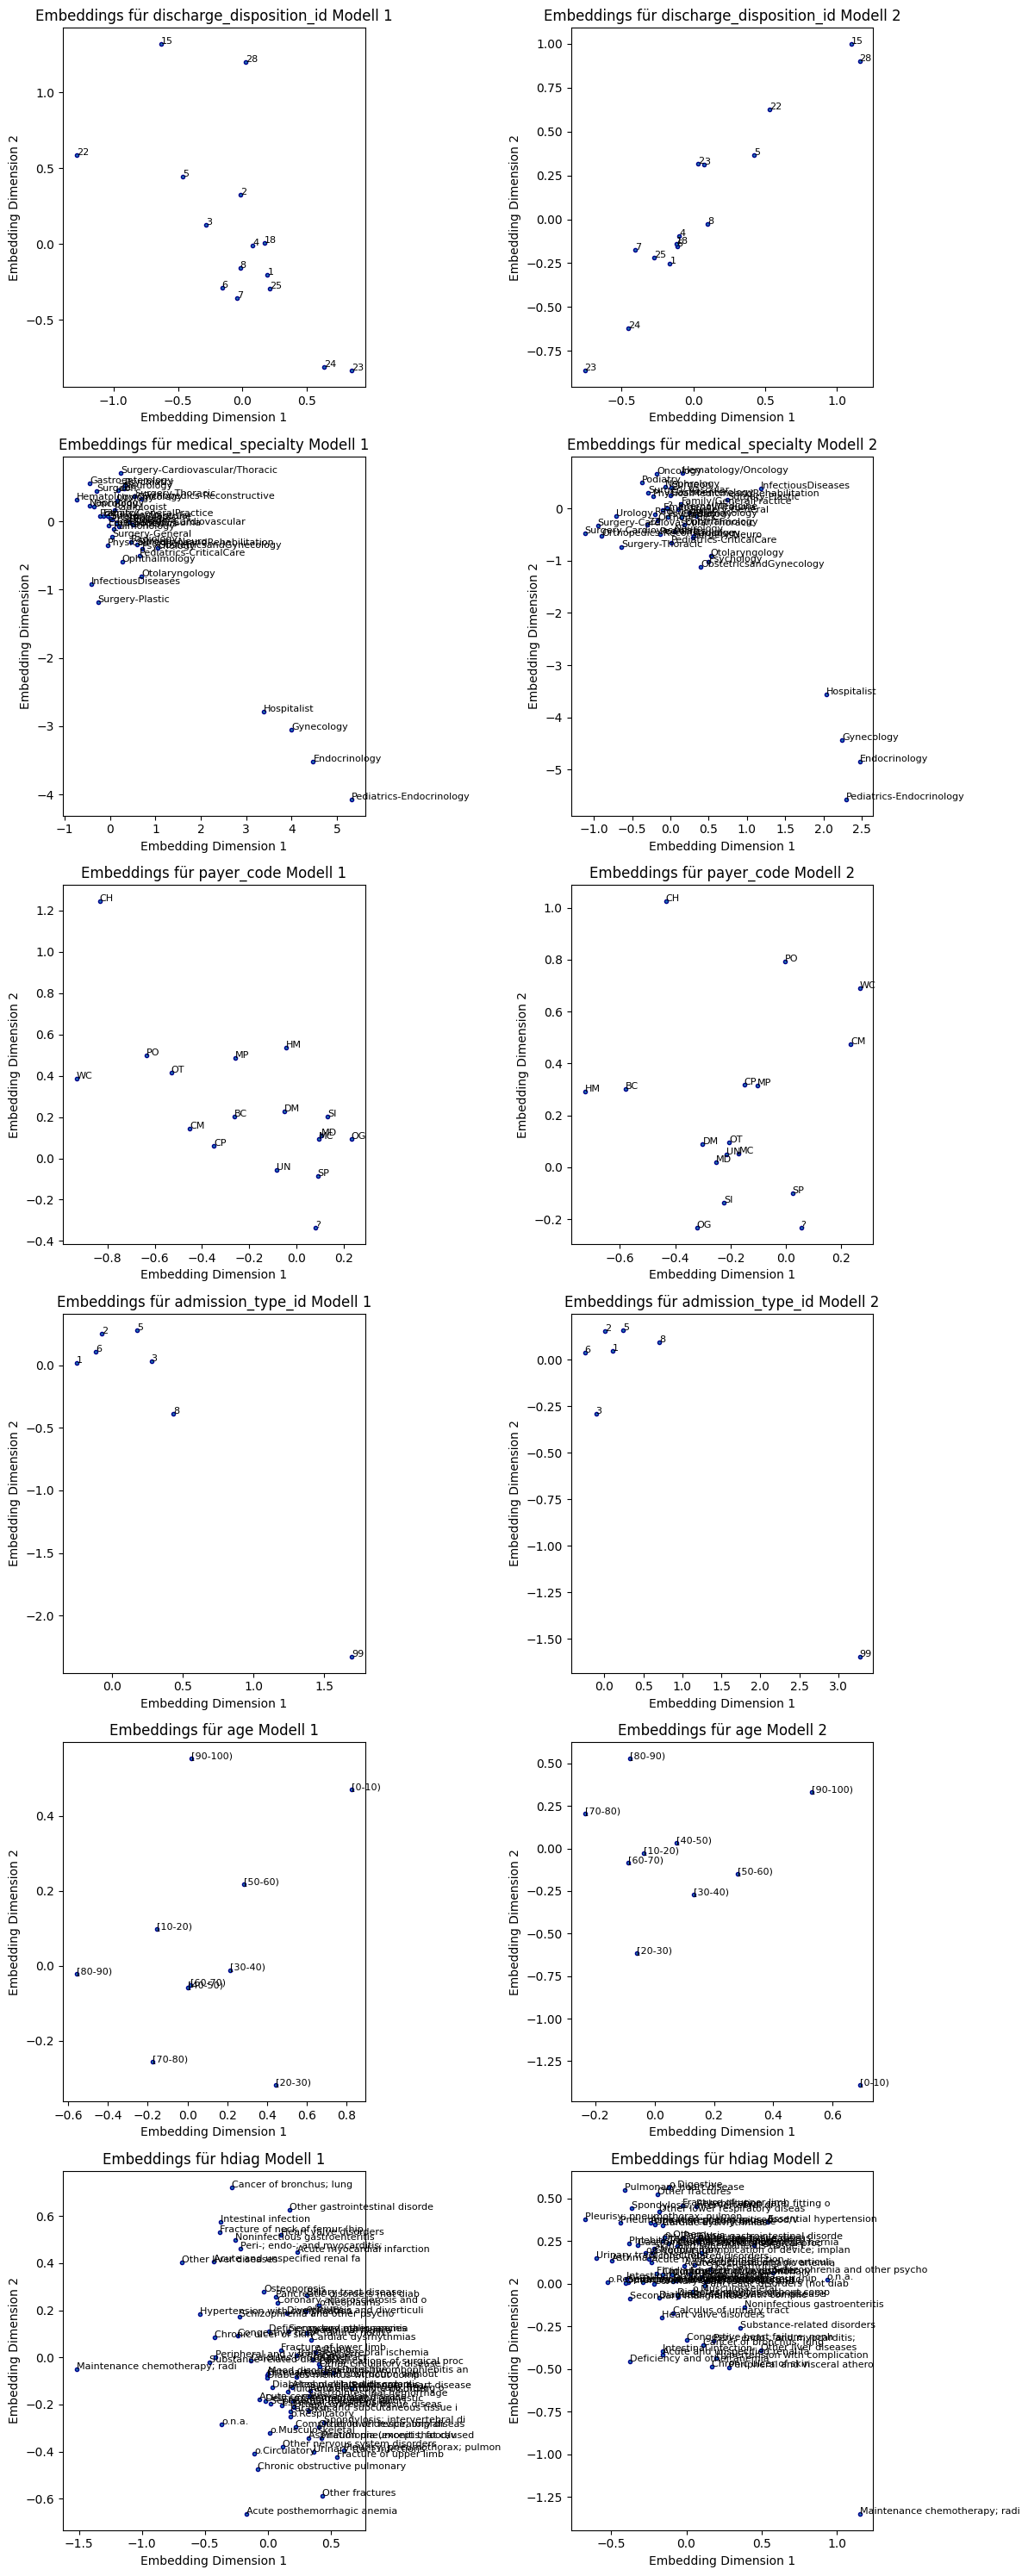

In [143]:
# Ermittlung der Embedding-Anzahl
num_features = len(weight_model) 

# Erstellung der Subplots: 2 Spalten und num_features Zeilen
fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(12, num_features*5))

for i in range(num_features):
    df_model = weight_model[i]
    df_model_clone = weight_model_clone[i]

    # Scatterplot für die Embeddings des ersten Modells (linke Spalte)
    scatter1 = axes[i, 0].scatter(df_model[:, 0], df_model[:, 1], marker='.', edgecolor='darkblue', zorder=2)
    axes[i, 0].set_title(f"Embeddings für {selected_features[i]} Modell 1")
    axes[i, 0].set_xlabel('Embedding Dimension 1')
    axes[i, 0].set_ylabel('Embedding Dimension 2')
    for j, txt in enumerate(encoders[selected_features[i]]):
        axes[i, 0].annotate(txt, (df_model[j, 0], df_model[j, 1]), fontsize=8)

    # Scatterplot für die Embeddings des geklonten Modells  (rechte Spalte)
    scatter2 = axes[i, 1].scatter(df_model_clone[:, 0], df_model_clone[:, 1], marker='.', edgecolor='darkblue', zorder=2)
    axes[i, 1].set_title(f"Embeddings für {selected_features[i]} Modell 2")
    axes[i, 1].set_xlabel('Embedding Dimension 1')
    axes[i, 1].set_ylabel('Embedding Dimension 2')
    for j, txt in enumerate(encoders[selected_features[i]]):
        axes[i, 1].annotate(txt, (df_model_clone[j, 0], df_model_clone[j, 1]), fontsize=8)
        
# Optimierung des Layouts
plt.tight_layout()

# Anzeige der Grafik
plt.show()

Die Grafiken zeigen folgende Auffälligkeiten:

-   Zwischen den einzelnen Modellen können die Embeddings eines Merkmals vertauschte Vorzeichen haben bzw. können auch die Dimensionen vertauscht sein. Beispielsweise hat die Ausprägung *23* in der ersten Zeile (Embedding für *discharge_disposition_id*) im ersten Modell (linke Grafik) in der ersten Dimension den Wert +1, im geklonten Modell (rechte Grafik) den Wert -1.
-   Die Gewichte der einzelnen Embeddings können zwischen den beiden Modellen deutlich variieren, wie es beispielsweise beim Embedding für *medical_specialty* in der ersten Dimension der Fall ist (auch bei den nächsten Merkmalen *payer_code*, *age* und *hdiag* in der zweiten Dimension)

Die Analyse der Embeddings zeigt, dass die Gewichte zwischen den einzelnen Modell sehr stark schwanken können, abhängig von den zufällig gesetzten Start-Gewichten. Diese Instabilität beeinflusst auch die Analysen im nächsten Abschnitt.

##  <font color='red'> Aufgabe PT6: Embeddings joinen und bei Modellierung verwenden [Lernziel 5.1; 15 Punkte]</font>

Mit den erzeugten Embeddings in PT5 soll untersucht werden, inwieweit die Verwendung dieser (anstatt der ursprünglichen kategoriellen Variablen) Auswirkungen auf die Modellierungsergebnisse (d.h. den AUC-Score) hat.

a) Erweiterung Sie den Datensatz aus Aufgabenteil PT5-1 a) um die entsprechenden Ergebnisse der Embeddings. Entfernen Sie nicht benötigte Features aus dem Datensatz. Dieser Datensatz ist im Anschluss in die Teile Training (70%), Validierung (15%) und Test (15%) zu trennen.

b) Aufbauend auf dem Datensatz in a): Führen Sie eine logistische Regression unter Berücksichtigung der Embedding-Merkmale durch. Orientieren Sie sich dabei an dem Modell aus Abschnitt 2.2. Was kann im Vergleich hierzu gesagt werden?

c) Analog zu Teil b): Führen Sie CatBoost unter Berücksichtigung der Embedding-Merkmale durch. Was kann im Vergleich zum Ergebnis in Abschnitt 1.5 (Baseline-Modell) gesagt werden?

d) Bewerten Sie abschließend die Wirkung der Embeddings in den betrachteten Modellen. Nutzen Sie dafür ein Balkendiagramm, welches die bisherigen Modelle (d.h. insbesondere das erste berechnet CatBoost Modell, die log. Regression sowie die Modelle aus dem One-Hot Encoding und Subsampling) mit den Validierungsergebnissen zeigt. Die Bewertung sollte unter anderem auch eine Aussage zur Nützlichkeit sowie Ihre eigene Empfehlung enthalten.

__Lösung__:

Ausgangsbasis für die nachfolgenden Analysen ist der Datenbestand aus Abschnitt *PT5-1a*, der in der Variable *df_nn_after_label* gesichert wurde. 

**Bemerkung**: In Aufgabenteil *PT5-1a* wird auf den in Aufgabenteil *PT4-1* und *PT4-2* erzeugten kategoriellen Variablen ein Label-Encoding durchgeführt. Würde nur dieser Datensatz weiter verwendet (Aufgabenteil a "... Dieser Datensatz ist im Anschluss in die Teile Training (70%), Validierung (15%) und Test (15%) zu trennen. ..."), wäre kein numerisches Merkmal im Datensatz für die nachfolgenden Analysen enthalten. Die Aufgabe wird deshalb in der Form verstanden, dass die in Aufgabe *PT5-1b* angeführten vier numerischen Merkmale verwendet werden, allerdings nicht skaliert.

In [144]:
df_nn_after_label.head()

,discharge_disposition_id,medical_specialty,payer_code,admission_type_id,age,hdiag,number_inpatient,num_lab_procedures,number_diagnoses,num_medications,TARGET
0,0,0,0,0,0,0,0,77,8,33,1
1,0,1,0,1,0,1,0,49,3,11,0
2,1,2,1,2,1,2,0,68,9,23,0
3,0,2,0,2,1,3,0,46,9,20,0
4,0,2,0,2,2,4,0,49,3,5,0


Die Bestimmung der Embedding-Werte eines Merkmals bzw. der einzelnen Ausprägungen des Merkmals wird folgendermaßen umgesetzt: zunächst wird der Embedding-Layer über seinen Namen ausgelesen. Wird das Merkmal bzw. der entsprechende Vektor mit diesem Layer aufgerufen / transformiert, werden die Einträge auf die zwei Embedding-Dimensionen abgebildet. 

Dieses Vorgehen wird beispielhaft für das erste Merkmal in der Liste *selected_features* demonstriert:

In [145]:
# Erstes Merkmal in der selected_features-Liste
print(selected_features[0])
print(selected_features_short[0])

discharge_disposition_id
disc_disp


In [146]:
# Auslese des Embedding-Layers
embedding_layer = model.get_layer(name=f"embedding_{selected_features_short[0]}")
embedding_layer

<Embedding name=embedding_disc_disp, built=True>

Die Spalte des Merkmals *discharge_disposition_id* im Originalbestand *df_nn_after_label* wird durch *df_nn_after_label[selected_features[0]]* aufgerufen.

In [147]:
df_nn_after_label[selected_features[0]].head()

0    0
1    0
2    1
3    0
4    0
Name: discharge_disposition_id, dtype: int64

Die Umwandlung in die entsprechende zwei-dimensionale Embedding-Matrix erfolgt dementsprechend durch:

In [148]:
embedding_array = embedding_layer(df_nn_after_label[selected_features[0]])
embedding_array.numpy()

array([[ 0.19352818, -0.2036794 ],
       [ 0.19352818, -0.2036794 ],
       [-0.2829853 ,  0.12666982],
       ...,
       [ 0.19352818, -0.2036794 ],
       [ 0.19352818, -0.2036794 ],
       [ 0.19352818, -0.2036794 ]], dtype=float32)

**Bemerkung**: *embedding_array* ist ein Tensor-Element, dass durch *numpy()* in eine numerische Matrix umgewandert werden muss.

Ein endgültiges DataFrame mit entsprechenden Spaltenüberschriften wird im nächsten Schritt erzeugt.

In [149]:
df_embeddings = pd.DataFrame(embedding_array, columns=[f"{selected_features[0]}_dim_1", f"{selected_features[0]}_dim_2"])
df_embeddings.head()

,discharge_disposition_id_dim_1,discharge_disposition_id_dim_2
0,0.193528,-0.203679
1,0.193528,-0.203679
2,-0.282985,0.126670
3,0.193528,-0.203679
4,0.193528,-0.203679


Die folgende Schleife wandelt alle kategorischen Merkmals mit den oben beschriebenen Schritten in eine Liste von DataFrames um, die anschließend zu einem DataFrame zusammengefasst werden.

In [150]:
embedding_list = []

for i in range(len(selected_features)):
    embedding_layer = model.get_layer(name=f"embedding_{selected_features_short[i]}")
    embedding_array = embedding_layer(df_nn_after_label[selected_features[i]])
    df_embeddings = pd.DataFrame(embedding_array, columns=[f"{selected_features[i]}_dim_1", f"{selected_features[i]}_dim_2"])
    embedding_list.append(df_embeddings)

df_embeddings = pd.concat(embedding_list, axis=1)
df_embeddings.head()

,discharge_disposition_id_dim_1,discharge_disposition_id_dim_2,medical_specialty_dim_1,medical_specialty_dim_2,payer_code_dim_1,payer_code_dim_2,admission_type_id_dim_1,admission_type_id_dim_2,age_dim_1,age_dim_2,hdiag_dim_1,hdiag_dim_2
0,0.193528,-0.203679,0.137254,-0.020940,0.078125,-0.336860,-0.073881,0.254537,0.283203,0.217689,0.109367,-0.202512
1,0.193528,-0.203679,0.593507,-0.342812,0.078125,-0.336860,0.275699,0.034951,0.283203,0.217689,0.443461,-0.275711
2,-0.282985,0.126670,0.039900,0.027067,0.092765,0.095327,-0.253647,0.017690,-0.557914,-0.021191,-0.385551,0.532832
3,0.193528,-0.203679,0.039900,0.027067,0.078125,-0.336860,-0.253647,0.017690,-0.557914,-0.021191,0.358434,-0.009261
4,0.193528,-0.203679,0.039900,0.027067,0.078125,-0.336860,-0.253647,0.017690,0.213854,-0.011327,0.362184,-0.402548


In [151]:
df_embeddings.shape

(47751, 12)

In [152]:
df_embeddings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47751 entries, 0 to 47750
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   discharge_disposition_id_dim_1  47751 non-null  float32
 1   discharge_disposition_id_dim_2  47751 non-null  float32
 2   medical_specialty_dim_1         47751 non-null  float32
 3   medical_specialty_dim_2         47751 non-null  float32
 4   payer_code_dim_1                47751 non-null  float32
 5   payer_code_dim_2                47751 non-null  float32
 6   admission_type_id_dim_1         47751 non-null  float32
 7   admission_type_id_dim_2         47751 non-null  float32
 8   age_dim_1                       47751 non-null  float32
 9   age_dim_2                       47751 non-null  float32
 10  hdiag_dim_1                     47751 non-null  float32
 11  hdiag_dim_2                     47751 non-null  float32
dtypes: float32(12)
memory usage: 2.2

Der neue Datasatz *df_embedd* wird aus dem originalen Datensatz *df_nn_after_label* erzeugt, indem die kategoriellen Merkmale aus dem ersten Datensatz entfernt werden (drop) und der oben erzeugte Datensatz *df_embeddings* hinzugefügt wird.

In [153]:
df_embedd = df_nn_after_label.copy(deep = True)
df_embedd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47751 entries, 0 to 47750
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   discharge_disposition_id  47751 non-null  int64
 1   medical_specialty         47751 non-null  int64
 2   payer_code                47751 non-null  int64
 3   admission_type_id         47751 non-null  int64
 4   age                       47751 non-null  int64
 5   hdiag                     47751 non-null  int64
 6   number_inpatient          47751 non-null  int64
 7   num_lab_procedures        47751 non-null  int64
 8   number_diagnoses          47751 non-null  int64
 9   num_medications           47751 non-null  int64
 10  TARGET                    47751 non-null  int64
dtypes: int64(11)
memory usage: 4.0 MB


In [154]:
df_embedd = pd.concat([df_embeddings, df_embedd.drop(columns=selected_features)], axis=1)
df_embedd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47751 entries, 0 to 47750
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   discharge_disposition_id_dim_1  47751 non-null  float32
 1   discharge_disposition_id_dim_2  47751 non-null  float32
 2   medical_specialty_dim_1         47751 non-null  float32
 3   medical_specialty_dim_2         47751 non-null  float32
 4   payer_code_dim_1                47751 non-null  float32
 5   payer_code_dim_2                47751 non-null  float32
 6   admission_type_id_dim_1         47751 non-null  float32
 7   admission_type_id_dim_2         47751 non-null  float32
 8   age_dim_1                       47751 non-null  float32
 9   age_dim_2                       47751 non-null  float32
 10  hdiag_dim_1                     47751 non-null  float32
 11  hdiag_dim_2                     47751 non-null  float32
 12  number_inpatient                

Die obere Auswertung zeigt, dass der neue Datensatz aus den erwarteten Merkmale mit entsprechenden Datentypen besteht.

Split des aufbereiteten Datensatzes in Trainings-, Validierungs- und Testbestand im Verhältnis 70% / 15% / 15%.

In [155]:
# Konstanten für Datensplits
TRAIN_RATIO = 0.7
VAL_TEST_RATIO = 0.5  # Aufteilung der verbleibenden 30 % zu gleichen Teilen in Validierung und Test-Dateien

# Trennung der Merkmale (X) und der Zielvariable (y)
X_embedd = df_embedd.drop(columns=['TARGET'])
y_embedd = df_embedd['TARGET']

# Aufteilung des Datensatzes in einen Trainingsdatensatz und einen kombinierten Validierungs- und Testdatensatz
X_embedd_train, X_embedd_val_test, y_embedd_train, y_embedd_val_test = \
    train_test_split(X_embedd, y_embedd, train_size=TRAIN_RATIO, random_state=RANDOM_SEED)

# Aufteilung der kombinierten Validierungs- und Testmenge in separate Validierungs- und Testmengen
X_embedd_val, X_embedd_test, y_embedd_val, y_embedd_test = \
    train_test_split(X_embedd_val_test, y_embedd_val_test, test_size=VAL_TEST_RATIO, random_state=RANDOM_SEED)

# Überprüfung der Dimensionen der Trainings-, Validierungs- und Testmengen (Zeilen, Spalten)
print(f"Training-Datei Dimension (Zeilen, Spalten):   {X_embedd_train.shape}")
print(f"Validation-Datei Dimension (Zeilen, Spalten): {X_embedd_val.shape}")
print(f"Test-Datei Dimension (Zeilen, Spalten):       {X_embedd_test.shape}")

Training-Datei Dimension (Zeilen, Spalten):   (33425, 16)
Validation-Datei Dimension (Zeilen, Spalten): (7163, 16)
Test-Datei Dimension (Zeilen, Spalten):       (7163, 16)


**Logistische Regression**

Für die anschließende logistische Regression wird zunächst der benötigte Datensatz erzeugt und danach die benötigte Formel mit allen Merkmalen im Datensatz dynamisch aufgebaut.

In [156]:
# Zusammenfassung der Merkmale und Zielvariable in ein DataFrame für die formelbasierte Modellierung
Xy_embedd_train = X_embedd_train.copy()
Xy_embedd_train['TARGET'] = y_embedd_train 

# Dynamisches Aufbauen der Formel
namen_merkmale = X_embedd_train.columns
formel_LR = 'TARGET' + ' ~ ' + ' + '.join(namen_merkmale)
formel_LR

'TARGET ~ discharge_disposition_id_dim_1 + discharge_disposition_id_dim_2 + medical_specialty_dim_1 + medical_specialty_dim_2 + payer_code_dim_1 + payer_code_dim_2 + admission_type_id_dim_1 + admission_type_id_dim_2 + age_dim_1 + age_dim_2 + hdiag_dim_1 + hdiag_dim_2 + number_inpatient + num_lab_procedures + number_diagnoses + num_medications'

Training des logistische Regressionsmodells mit den Ergebnissen der Embeddings.

In [157]:
# Start Timer zur Bestimmung der Trainingszeit des logistischen Regressions-Modells
start_time = time.time()

# Definition des logistische Regressionsmodell mithilfe der Formel-API von statsmodels und Fit an die Trainingsdaten.
LR_embedd = smf.logit(formula = formel_LR, 
                      data=Xy_embedd_train).fit(maxiter=100)

# Berechnung und Anzeige der Laufzeit in Sekunden
elapsed_time_LR_embedd = time.time() - start_time
print(f"Verstrichene Zeit (sec): {elapsed_time_LR_embedd:.2f}")

# Display a summary of the logistic regression model results
print(LR_embedd.summary())

Optimization terminated successfully.
         Current function value: 0.361853
         Iterations 8
Verstrichene Zeit (sec): 0.07
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                33425
Model:                          Logit   Df Residuals:                    33408
Method:                           MLE   Df Model:                           16
Date:                Sun, 11 May 2025   Pseudo R-squ.:                 0.06988
Time:                        19:42:01   Log-Likelihood:                -12095.
converged:                       True   LL-Null:                       -13004.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -2.4

In [158]:
# Die Leistung des logistischen Regressionsmodells auf den Validierungsdaten wird bewertet und die Fläche unter der ROC-Kurve (AUC) berechnet.
auc_LR_embedd = roc_auc_score(y_embedd_val, LR_embedd.predict(X_embedd_val))

# Ausgabe des berechneten AUC-Wert
print(f'Die Validierungs-AUC des logistischen Regressionsmodells beträgt: {auc_LR_embedd:.6f}')

Die Validierungs-AUC des logistischen Regressionsmodells beträgt: 0.673997


Die Bewertung des Ergebnisses erfolgt am Ende des Aufgabenteils *PT6*.

**CatBoost-Modell**

Training des CatBoost-Modells mit den Ergebnissen der Embeddings.

In [159]:
# Start Timer zur Bestimmung der Trainingszeit des CatBoost-Modells
start_time = time.time()

# Anpassung des CatBoostClassifier an die Trainingsdaten
CB_embedd = CatBoostClassifier(eval_metric='AUC', random_seed=RANDOM_SEED)
CB_embedd.fit(X_embedd_train, y_embedd_train, logging_level='Silent')

# Berechnung und Anzeige der Laufzeit in Sekunden
elapsed_time_CB_embedd = time.time() - start_time
print(f"Verstrichene Zeit (sec): {elapsed_time_CB_embedd:.2f}")

Verstrichene Zeit (sec): 5.17


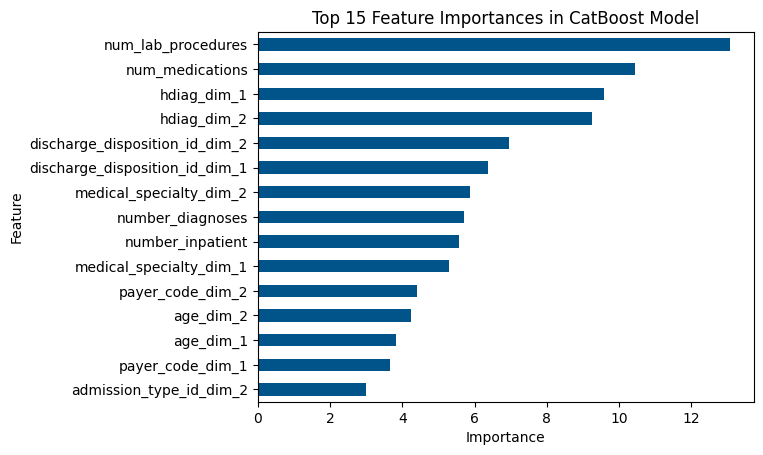

In [160]:
# Ermittlung der 15 wichtigsten Merkmale
feature_importances = pd.Series(CB_embedd.feature_importances_, index=X_embedd_train.columns).nlargest(15)

# Plot der Feature-Importance
feature_importances.plot(kind='barh', color=COLOR_DARK)
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances in CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Der obere Darstellung der Importance-Analyse zeigt ein geändertes Bild, im Vergleich zu den Ergebnissen aus Abschnitt 1.5. Einer der Gründe ist, das in den Analysen mit Embedding-Ersatz nur mehr eine kleine Anzahl der ursprünglichen Merkmale verwendet wird, während ursprünglich wichtige Merkmale, wie *diag_1*, *diag_2* und *diag_3* fehlen.

In [161]:
# Berechnung des AUC-Wert anhand der Vorhersagewahrscheinlichkeiten des Modells für die positive Klasse.
auc_CB_embedd = roc_auc_score(y_embedd_val, CB_embedd.predict_proba(X_embedd_val)[:, 1])

# Ausgabe des Validierungs-AUC
print(f'Die AUC des CatBoost-Modells mit Standard-Hyperparametern auf dem Validierungsdatensatz beträgt: {auc_CB_embedd:.6f}')

Die AUC des CatBoost-Modells mit Standard-Hyperparametern auf dem Validierungsdatensatz beträgt: 0.676639


Vergleich wichtiger Kenngrößen der beiden Modelle:

In [162]:
# Dimension der Trainingsdatei, Trainingszeit und Gütemaß des origionalen Modells aus Abschnitt 1.5:
print(f"Training-Datei Dimension (Zeilen, Spalten):   {X_raw_train.shape}")
print(f"Verstrichene Zeit (sec): {elapsed_time_CB1:.2f}")
print('Die Validierungs-AUC des CatBoost-Modells aus Abschnitt 1.5 beträgt: {:.6f}'.format(auc_CB1 ))

# Dimension der Trainingsdatei, Trainingszeit und Gütemaß des CatBoost-Modells mit Embeddings:
print(f"Training-Datei Dimension (Zeilen, Spalten):   {X_embedd_train.shape}")
print(f"Verstrichene Zeit (sec): {elapsed_time_CB_embedd:.2f}")
print('Die Validierungs-AUC des CatBoost-Modells mit einer Stichprobe ist: {:.6f}'.format(auc_CB_embedd))

Training-Datei Dimension (Zeilen, Spalten):   (33425, 50)
Verstrichene Zeit (sec): 71.05
Die Validierungs-AUC des CatBoost-Modells aus Abschnitt 1.5 beträgt: 0.708208
Training-Datei Dimension (Zeilen, Spalten):   (33425, 16)
Verstrichene Zeit (sec): 5.17
Die Validierungs-AUC des CatBoost-Modells mit einer Stichprobe ist: 0.676639


Das reduzierte Modell mit Embeddings-Ersatz hat deutliche weniger Merkmale als der Bestand aus Abschnitt 1.5 (16 statt 50) und eine deutlich kürzer Rechenzeit (5 Sekunden statt 68 Sekunden), allerdings leider auch einen deutlich niedrigeren AUC-Wert (0,677 statt 0,708).

**Modellvergleich**

Im Folgenden wird ein Vergleich des AUC-Wert aller bisher generierten Modelle grafisch dargestellt.

In [163]:
# Struktur für den Modell-Namen und AUC
mname = []
mauc = []
dict = {'Modell-Name': mname,'AUC': mauc, }

In [164]:
# Speichern des Namens und des AUC der bisher gefitteten Modelle
mname.append("CB1_Standard") # Standard-CatBoost
mauc.append(auc_CB1)
mname.append("LR1_select") # Logistische Regression mit Feature-Selection
mauc.append(auc_LR1)
mname.append("CB4_One_Hot_Encoding") # CatBoost mit One-Hot-Encoding
mauc.append(auc_CB4)
mname.append("CB5_Stichprobe") # CatBoost mit Stichprobe
mauc.append(auc_CB5)
mname.append("CB6_Tuned") # CatBoost mit Parameter-Tuning
mauc.append(auc_CB6)
mname.append("LightGBM") # LightGBM-Modell
mauc.append(auc_LGB)
mname.append("XGBoost") # XGBoost-Modell
mauc.append(auc_XGB)
mname.append("Neuronales Netz") # Neuronales Netz
mauc.append(auc_NN)
mname.append("LR_embedd") # Logistische Regression mit Embedding-Werte
mauc.append(auc_LR_embedd)
mname.append("CB_embedd ") # CatBoost-Modell mit Embedding-Werte
mauc.append(auc_CB_embedd)

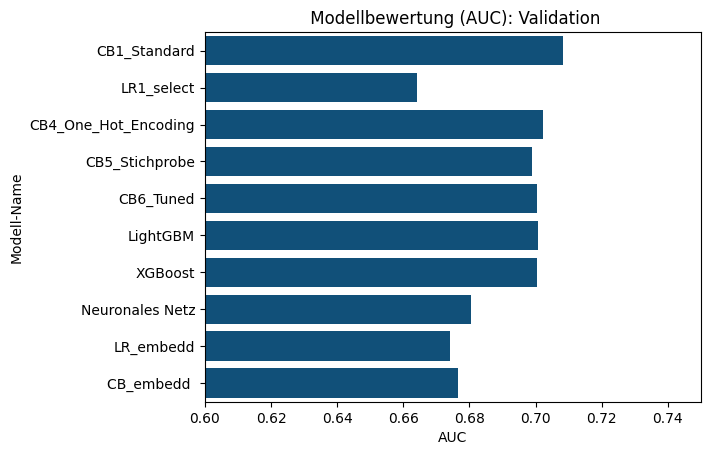

In [165]:
plot_auc(dict,0.60,0.75,"Validation")

Die obige Auswertung sind nicht vollständig vergleichbar, da die ersten 7 Modelle mit den gesamten Datenbestand (alle Merkmale) trainiert wurden, die letzten drei Modelle mit einem reduzierten Datensatz (6 kategorielle Merkmale und 4 numerische Merkmale). Insofern ist eine Bewertung der Wirkung der Embeddings durch Vergleich mit den Modellen vor Aufgabe *PT4* nicht aussagekräftig.

Ergebnisse auf den Datensätzen mit den gesamten Merkmalen (ersten 7 Modelle)
-  Das einfache Standardmodell weißt den höchsten AUC-Wert auf den Validierungs-Daten auf, benötigt aber im Vergleich zu den nicht-optimierten Modellen die deutlich höchste Trainigszeit (siehe anschließende Grafik)
-  Die Logistische Regression mit den selbst gewählten Merkmalen *LR1_select* zeigt einen deutlich niedrigeren AUC-Wert im Vergleich zu den restlichen Modellen, allerdings auch die deutlich kürzeste Trainingszeit.
-  Die beiden angepassten CatBoost-Modelle (*CB4_One_Hot_Encoding* und *CB5_Stichprobe*) haben eine deutlich reduzierter Trainingszeit im Vergleich zum einfache Standardmodell, weisen allerdings nur eine geringfügig schlechtere Güte auf.
-  Die optimierten Modelle haben mit Abstand die höchsten Laufzeiten für die Hyperparameteroptimierung (die Ausnahme ist LightGBM), zeigen allerdings im Modell mit dem optimierten Parametern einen etwas geringeren AUC-Wert als das einfachste Standardmodell.

Ergebnisse auf den Datensätzen mit ausgewählten Merkmalen (letzten drei Modelle)
-  Das Neuronale Netz zeigt bei hoher Trainingszeit einen nur geringfügig höheren AUC-Wert im vergleich zu den restlichen beiden Modellen.
-  Die Logistische Regression mit Embeddings *LR_embedd* zeigen den niedrigsten AUC-Wert, allerdings auch die deutlich kürzesten Trainingszeiten.
-  Das CatBoost-Modell mit Embeddings zeigt einen ähnlichen AUC-Wert wie das neuronale Netz, allerdings bei deutlich kürzerer Trainingszeit.

In der folgenden Grafik werden die Trainingszeiten gegenübergestellt, wobei bei den drei optimierten Modellen (*CB6_Tuned*, *LightGBM* und *XGBoost*) die Zeiten für den Optimierungslauf berücksichtigt wurde.

In [166]:
# Struktur für den Modell-Namen und Trainingszeit
mname = []
mtime = []
dict_time = {'Modell-Name': mname,'Trainingszeit': mtime, }

In [167]:
# Speichern des Namens und der Trainingszeit der bisher gefitteten Modelle
mname.append("CB1_Standard") # Standard-CatBoost
mtime.append(elapsed_time_CB1)
mname.append("LR1_select") # Logistische Regression mit Feature-Selection
mtime.append(elapsed_time_LR1)
mname.append("CB4_One_Hot_Encoding") # CatBoost mit One-Hot-Encoding
mtime.append(elapsed_time_CB4)
mname.append("CB5_Stichprobe") # CatBoost mit Stichprobe
mtime.append(elapsed_time_CB5)
mname.append("CB6_Tuned") # CatBoost mit Parameter-Tuning
mtime.append(elapsed_time_CB6_train)
mname.append("LightGBM") # LightGBM-Modell
mtime.append(elapsed_time_LGB_train)
mname.append("XGBoost") # XGBoost-Modell
mtime.append(elapsed_time_XGB_train)
mname.append("Neuronales Netz") # Neuronales Netz
mtime.append(elapsed_time_NN_train)
mname.append("LR_embedd") # Logistische Regression mit Embedding-Werte
mtime.append(elapsed_time_LR_embedd)
mname.append("CB_embedd ") # CatBoost-Modell mit Embedding-Werte
mtime.append(elapsed_time_CB_embedd)

In [168]:
def plot_time(d,x1,x2,t): 
    df_eval = pd.DataFrame(d)
    #sns.set_style('darkgrid')
    plt.title(" Modellbewertung (Trainingszeit): " + t)
    sns.barplot(data = df_eval, x = "Trainingszeit", y = "Modell-Name", color = COLOR_DARK)
    plt.xlim(x1, x2)
    plt.show()

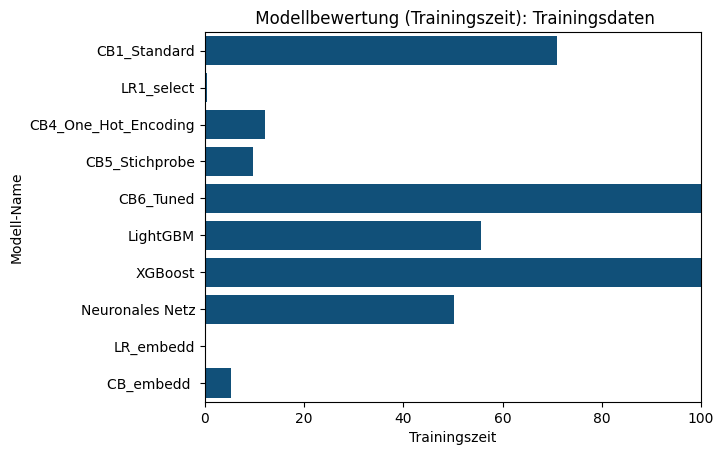

In [169]:
plot_time(dict_time,0,100,"Trainingsdaten")

Die Ergebnisse in diesem Abschnitt zeigen, dass ein CatBoost-Modell mit One-Hot-Encoding mit Standardparametern einen hohen AUC-Wert bei geringen Trainingszeiten zeigt. Wird der gesamte Datenbestand verwendet, zeigt dieses Modell das beste Güte / Trainingszeiten-Verhältnis. Für einen größeren Datensatz (der vorliegende Trainingsbestand hat lediglich 33.300 Beobachtungen) kann der Stichprobenansatz zu einem insgesamt besseren Güte / Trainingszeiten-Verhältnis führen.
 
Die Modelle mit reduzierten Datenbestand (Merkmal-Selektion) liefern insgesamt eine schlechtere Performance bei geringfügig besserer Trainingszeit.

##  <font color='red'> Aufgabe PT7: AutoML sowie Modellbewertung und Anwendung [Lernziel 5.1; 16 Punkte]</font>

* a)  Über AutoML oder ein beliebiges anderes, bisher nicht verwendetes Modell oder Modellensemble (z.B. Stacking, Blending) soll versucht werden, den AUC zu verbessern. Ein Beispiel für AutoML ist AutoGluon, siehe https://auto.gluon.ai/stable/index.html. Dabei ist, analog zum bisherigen Vorgehen, mit einem Trainings-, Validierungs- und Testset zu arbeiten und die Modellgüte zu bestimmen.

* b) Am Ende des Notebooks soll Abschnitt 11. vollständig angepasst werden und alles danach Folgende (12., Appendix) gelöscht werden. In 11.1 sollen alle in den vorangegangenen Abschnitten erstellten bzw. optimierten Modelle (ohne Search-CV-Einzelmodelle) bewertet werden. In 11.2 soll eine Auswahl von mindestens 6 Modellen ins Lift Chart einfließen und ein geeignetes Modell für die nachfolgenden Wahrscheinlichkeits- und Perzentilbetrachtungen ausgewählt werden.

__Lösung__:


Für die Verbesserung des AUC mittels *AutoGluon* wird der Datensatz *X_train_all* (Datensatz mit One-Hot-Encoding) verwendet.

In [170]:
Xy_auto_train = X_train_all.copy()
Xy_auto_train['TARGET'] = y_train_all.values
y_auto_train = y_train_all
Xy_auto_val = X_val_all.copy()
Xy_auto_val['TARGET'] = y_val_all.values
y_auto_val = y_val_all
Xy_auto_test = X_test_all.copy()
Xy_auto_test['TARGET'] = y_test_all.values
y_auto_test = y_test_all

**Bemerkungen**: 

- Im folgenden Training wird ein Zeitlimit vorgebenen. Die Vorgabe einer Anzahl von Modellen über den Parameter *hyperparameter_tune_kwargs* verursachte leider technische Probleme.
- Die Trainingszeit wurde auf 300 Sekunden beschränkt. Eine höhere Trainingszeit würde voraussichtlich das Qualitätsmaß *AUC* weiter verbessern. 
- AuotGloun empfiehlt auf seiner Seite unter "Specifying hyperparameters and tuning them" (https://auto.gluon.ai/stable/tutorials/tabular/tabular-indepth.html#specifying-hyperparameters-and-tuning-them) das Hyperparemeter-Tuning nicht selbst vorzunehmen, sondern das mittels *presets="best_quality"* das beste Modell suchen zu lassen. Einige Vortests haben gezeigt, dass die Methoden *CAT* (CatBoost), *GBM* (LightGBM) und *RF* (Random Forest) die besten Ergebnisse für den Datensatz liefern. Für *CAT* und *GBM* wird demonstriert wie eine Hyperparameter-Vorgabe aussehen könnte, sie wird allerdings nicht weiter verwendet, sondern der Empfehlung auf der Homepage gefolgt (die Zeile "hyperparameters=hyperparams" ist deshalb auskommentiert). Ebenso werden die Parameter *num_bag_folds* und *num_bag_sets* nicht verwendet bzw. auskommentiert, da die beste Wahl ebenfalls mit *presets="best_quality"* ermittelt wird.

In [171]:
cat_options = {  # Hyperparameter für CatBoost
    'learning_rate': space.Real(0.015, 0.06, default=0.03, log=True),
    'depth':         space.Int(lower=4, upper=7, default=6)
}

gbm_options = {  # Hyperparameter für lightGBM
    'learning_rate':    space.Real(0.015, 0.06, default=0.03, log=True),
    'num_leaves':       space.Int(lower=25, upper=50, default=36),  
    'subsample':        space.Real(0, 1, default=1),  
    'colsample_bytree': space.Real(0, 1, default=1)
}

hyperparams = {
    'CAT': cat_options,     # CatBoost
    'GBM': gbm_options,     # LightGBM
}

autogluon1 = TabularPredictor(
    label="TARGET",
    eval_metric="roc_auc", 
    problem_type="binary"   
).fit(
    train_data=Xy_auto_train,
    presets='best_quality',
    time_limit=300,  # max. Trainingszeit in Sekunden
#    hyperparameters=hyperparams,
#    num_bag_folds=5, 
#    num_bag_sets=2,
#    auto_stack=True,
    verbosity=0
)

No path specified. Models will be saved in: "AutogluonModels\ag-20250511_174207"
2025-05-11 19:42:12,400	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
C:\Development\Python_env\pythonenv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Development\Python_env\pythonenv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Development\Python_env\pythonenv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed i

Berechnung des AUC (Modellgüte) auf den Validierungsdaten:

In [172]:
auc_autogluon1 = roc_auc_score(y_auto_val, autogluon1.predict_proba(Xy_auto_val)[1])
auc_autogluon1

np.float64(0.709284705673189)

AutoGluon bietet mit der Funktion *evaluate* eine Übersicht über die wichtigsten Gütemaße, wobei AUC ebenfalls enthalten ist.

In [173]:
performance = autogluon1.evaluate(Xy_auto_val)
print("Performance:", performance)

Performance: {'roc_auc': np.float64(0.709284705673189), 'accuracy': 0.8714225883009912, 'balanced_accuracy': np.float64(0.5164283320967857), 'mcc': np.float64(0.1374106511964771), 'f1': 0.0668693009118541, 'precision': 0.7021276595744681, 'recall': 0.035106382978723406}


Der AUC-Wert könne damit direkt aus der Performance-Übersicht abgelesen werden:

In [174]:
performance['roc_auc']

np.float64(0.709284705673189)

Die geschätzen Wahrscheinlichkeiten der beiden Ausprägungen für die einzelnen Beobachtungen werden über die Funktion *predict_proba* berechnet.

In [175]:
pred_proba = autogluon1.predict_proba(Xy_auto_val)
print(pred_proba.head())

          0         1
0  0.850175  0.149825
1  0.880417  0.119583
2  0.471202  0.528798
3  0.934976  0.065024
4  0.743978  0.256022


*AutoGluon* liefert ein Ensemble von Modellen. Die gesamte Modellliste kann über die Funktion *leaderboard* abgefragt werden:

In [176]:
autogluon1.leaderboard(Xy_auto_val)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.709285,0.703242,roc_auc,4.595224,74.436713,120.822890,0.002990,0.002990,0.850693,3,True,14
1,WeightedEnsemble_L2,0.708803,0.702425,roc_auc,2.023032,28.703112,68.223874,0.002990,0.002986,0.567613,2,True,9
2,LightGBMXT_BAG_L2,0.708663,0.698483,roc_auc,3.599032,47.330287,90.456235,0.307451,0.359784,3.659825,2,True,10
3,LightGBM_BAG_L2,0.707197,0.698468,roc_auc,3.609546,47.305507,90.567008,0.317965,0.335005,3.770598,2,True,11
4,LightGBM_BAG_L1,0.703744,0.694328,roc_auc,0.344403,0.483711,4.066946,0.344403,0.483711,4.066946,1,True,4
5,CatBoost_BAG_L1,0.703718,0.696336,roc_auc,0.526004,0.304153,28.347576,0.526004,0.304153,28.347576,1,True,7
6,LightGBMXT_BAG_L1,0.701913,0.695993,roc_auc,0.344678,0.500274,4.378021,0.344678,0.500274,4.378021,1,True,3
7,RandomForestGini_BAG_L2,0.700912,0.687732,roc_auc,3.655931,60.257399,100.448272,0.364350,13.286897,13.651862,2,True,12
8,RandomForestEntr_BAG_L2,0.700732,0.685860,roc_auc,3.602468,60.452036,98.889911,0.310887,13.481534,12.093501,2,True,13
9,RandomForestEntr_BAG_L1,0.698207,0.677672,roc_auc,0.379189,13.617015,14.856893,0.379189,13.617015,14.856893,1,True,6


Anzeige des besten Modells (mit diesem werden auch die Prognosewerte berechnet):

In [177]:
autogluon1.model_best

'WeightedEnsemble_L3'

<h1 id="a11"
    style="font-size:18px; font-weight:bold;">
    9. Modellevaluierung und Anwendung
    <a class="anchor-link"
       href="#a11"
       target="_self"
       rel=" noreferrer nofollow">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<h2 style="font-size:16px; font-weight:bold;">9.1 Modelevaluierung: Validierungs- und Testbestand</h2>

Aufbereitung der Test-Datensätze für das Neuronale Netz.

In [178]:
X_cat_test = [X_nn_test[feature] for feature in selected_features]
X_num_test = X_nn_test[selected_numeric].values 
y_test_nn = y_nn_test.values

# Inputs zusammenfassen
X_test_input = X_cat_test + [X_num_test]

In [179]:
# Berechne für jedes Modell den AUC auf den Test-Daten 
auc_CB1_test = roc_auc_score(y_raw_test, CB1.predict_proba(X_raw_test)[:, 1])
auc_LR1_test = roc_auc_score(y_pre_test, LR1.predict(X_pre_test))
auc_CB4_test = roc_auc_score(y_test_all, CB4.predict_proba(X_test_all)[:,1])
auc_CB5_test = roc_auc_score(y_test_all, CB5.predict_proba(X_test_all)[:,1])
loss, auc_NN_test = model.evaluate(X_test_input, y_test_nn)
auc_LR_embedd_test = roc_auc_score(y_embedd_test, LR_embedd.predict(X_embedd_test))
auc_CB_embedd_test = roc_auc_score(y_embedd_test, CB_embedd.predict_proba(X_embedd_test)[:, 1])
auc_autogluon1_test = roc_auc_score(y_auto_test, autogluon1.predict_proba(Xy_auto_test)[1])

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - AUC: 0.6814 - loss: 0.3636


Nachdem das Modelltraining abgeschlossen ist, ist es nun an der Zeit, die Modelle mit den Testdaten zu evaluieren und die Ergebnisse mit den Validierungsdaten sowie zwischen den verschiedenen Modellen zu vergleichen. Für die folgende Analyse werden alle bisher generierten Modelle, ohne die aus Search-CV generierten Einzelmodelle (also *CB6*, *LGB* und *XGB*), verwendet.

In [180]:
# Datenstruktur für Modellnamen, Validierungs- und Test-AUC
mdict = {'Model name': [], 'Set': [], 'AUC': []}

# Liste der Modelle und ihre AUC-Werte auf den Validierungs- und Test-Datensätzen
models_auc = [
    ("CB1_standard",    auc_CB1,        auc_CB1_test),
    ("LR1_select",      auc_LR1,        auc_LR1_test),
    ("CB4_one_hot",     auc_CB4,        auc_CB4_test),
    ("CB5_sample",      auc_CB5,        auc_CB5_test),
    ("Neuronal_Net",    auc_NN,         auc_NN_test),
    ("LR_embedd",       auc_LR_embedd,  auc_LR_embedd_test),
    ("CB_embedd",       auc_CB_embedd,  auc_CB_embedd_test),
    ("autogluon1",      auc_autogluon1, auc_autogluon1_test)
]

# Auffüllen des Wörterbuchs 
for model_name, auc_val, auc_test in models_auc:
    mdict['Model name'].extend([model_name] * 2)  # zweimaliger Modellname für Validierung und Test
    mdict['Set'].extend(["Val.", "Test"])
    mdict['AUC'].extend([auc_val, auc_test])

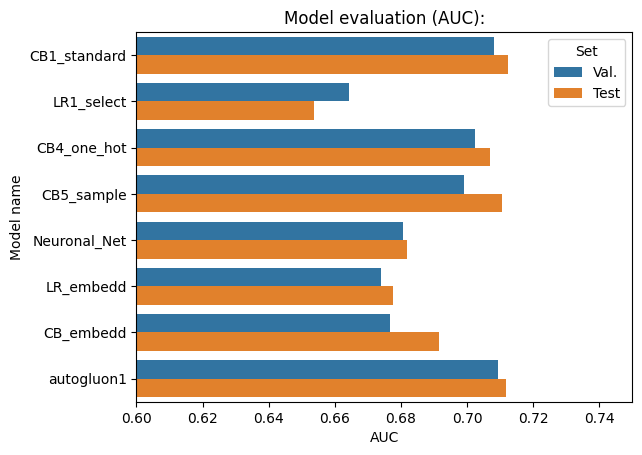

In [181]:
df_eval = pd.DataFrame(mdict)
plt.title("Model evaluation (AUC):")
sns.barplot(data=df_eval, x="AUC", y="Model name",hue="Set")
plt.xlim(0.60, 0.75)
plt.show()

Überraschenderweise erzielen alle Modelle, bis auf die logistische Regression mit selbst gewählten Merkmalen, bessere Ergebnisse mit den Testdaten. Dies könnte auf Unterschiede in den Stichproben und der entsprechenden TARGET-Verteilung zurückzuführen sein (siehe Abschnitt 1).

Das CatBoost-Modell mit Stichprobe (*CB5_sample*) scheint, bezogen auf den hohen AUC-Wert und der sehr geringen Trainingszeit, das insgesamt beste "Gesamtpaket" zu sein.

<h2 style="font-size:16px; font-weight:bold;">9.2 Hochrisikoprognose</h2>

In Abschnitt 9.1 wurde vorwiegend der höchste AUC-Wert (Fläche unter der Receiver Operating Characteristic Curve) als Gütekriterium für das beste Modell herangezogen. Da allerdings auf medizinischen und wirtschaftlichen Gründen der Hochrisikobereich, bezogen auf eine baldige Wiedereinweisung, in der Regel die meiste Aufmerksamkeit erhält, ist die Leistung der Modelle in diesem Bereich entscheidender für die Anwendung. Das Lift-Diagramm eignet sich gut für diese Bewertung. Ein kumulatives Lift-Diagramm zeigt die Verbesserung, die ein Modell im Vergleich zu einer zufälligen Schätzung bietet, und misst die Veränderung in Form von Lift-Scores.

**Bemerkung**: Das Lift-Diagramm (Lift-Chart) zeigt an, wie viele Mal besser ein Modell die *positiven Fälle* (frühzeitige Wiedereinweisung) im Vergleich zur zufälligen Auswahl erkennt. 

In [182]:
# Berechnung des AUC auf den Test-Daten für jedes Modell 
y_test_CB1 = CB1.predict_proba(X_raw_test)
y_test_LR1 = LR1.predict(X_pre_test)
y_test_CB4 = CB4.predict_proba(X_test)
y_test_CB5 = CB5.predict_proba(X_test)
y_test_NN = model.predict(X_test_input)
y_test_LR_embedd = LR_embedd.predict(X_embedd_test)
y_test_CB_embedd = CB_embedd.predict_proba(X_embedd_test)
y_test_autogluon1 = autogluon1.predict_proba(Xy_auto_test)

# Alle eindimensionalen Prognosen müssen in ein zweidimensionales Array umgewandelt werden
y_test_LR1 = np.vstack((y_test_LR1, 1-y_test_LR1)).T
y_test_LR_embedd = np.vstack((y_test_LR_embedd, 1-y_test_LR_embedd)).T
y_test_NN = np.vstack((y_test_NN, 1-y_test_NN)).T

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Die beiden Funktionen *cumulative_gain_curve1* und *calculate_gains_and_percentages* wurden ohne Änderungen aus der Originalvorlage übernommen.

In [183]:
# Core of scikit-plot function cumulative_gain_curve (necessary, since scypi release 1.12.0 broke compatibility with scikit-plot version 0.3.7.
# Source: https://github.com/reiinakano/scikit-plot/blob/26007fbf9f05e915bd0f6acb86850b01b00944cf/scikitplot/helpers.py
def cumulative_gain_curve1(y_true, y_score):
    """This binary classification function generates the points necessary to plot the Cumulative Gain"""
    y_true, y_score = np.asarray(y_true), np.asarray(y_score)
    # Wandelt y_true in eine Boolean-Vektor um
    y_true = (y_true == 1)
    sorted_indices = np.argsort(y_score)[::-1]
    y_true = y_true[sorted_indices]
    gains = np.cumsum(y_true)
    percentages = np.arange(start=1, stop=len(y_true) + 1)
    gains = gains / float(np.sum(y_true))
    percentages = percentages / float(len(y_true))
    gains = np.insert(gains, 0, [0])
    percentages = np.insert(percentages, 0, [0])
    return percentages, gains

# Berechnung der kumulierten Gewinne für den Lift-Chart 
def calculate_gains_and_percentages(model_predictions, y_true):
    """Calculate gains and percentages for a given model's predictions."""
    percentages, gains = cumulative_gain_curve1(y_true, model_predictions[:, 1])
    gains_adjusted = gains[1:] / percentages[1:]  # Anpassung des Gewinns ab dem zweiten Element
    return percentages[1:], gains_adjusted

Aufgrund technischer Probleme (Divisions) wird das neuronale Netz nicht weiter betrachtet.

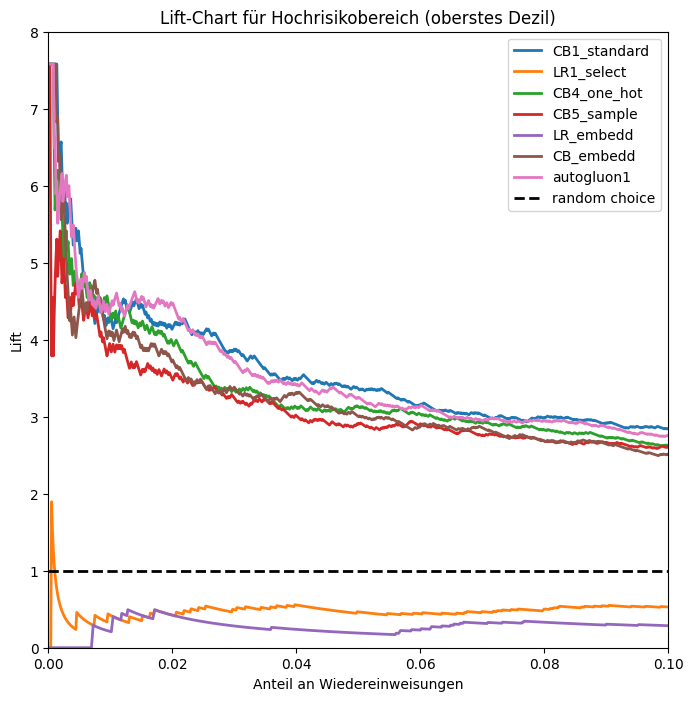

In [184]:
# Vorbereitung der Daten für die nachfolgenden Plots (prognostizierte und tatsächliche Werte)
y_true = np.array(np.ravel(y_test_all))
model_predictions = {
    'CB1_standard': np.array(y_test_CB1),
    'LR1_select': np.array(y_test_LR1),
    'CB4_one_hot': np.array(y_test_CB4),
    'CB5_sample': np.array(y_test_CB5),
#    'Neuronal_Net': np.array(y_test_NN),
    'LR_embedd': np.array(y_test_LR_embedd),
    'CB_embedd': np.array(y_test_CB_embedd),
    'autogluon1': np.array(y_test_autogluon1)
}

# Inizialisiere Lift-Chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Lift-Chart für Hochrisikobereich (oberstes Dezil)")
ax.set_xlabel('Anteil an Wiedereinweisungen')
ax.set_ylabel('Lift')
plt.xlim(0, 0.1)
plt.ylim(0, 8.0)

# Berechnung und Darstellung des Lift-Charts für jedes Modell
for label, predictions in model_predictions.items():
    percentages, gains_adjusted = calculate_gains_and_percentages(predictions, y_true)
    ax.plot(percentages, gains_adjusted, lw=2, label=label)

# Anzeige der "Random-Choise"-Baseline (Zuffalsauswahl)
ax.plot([0, 1], [1, 1], 'k--', lw=2, label='random choice')
ax.legend(loc='upper right')
plt.show()

Das kumulative Lift-Diagramm zeigt den Faktor (Lift-Score), um den das Modell die *Trefferquote* verbessern kann. Zum Beispiel könnte die gezielte Betrachtung von 6% der Fälle mit der höchsten Wahrscheinlichkeit für frühzeitige Wiedereinweisung, die einen Lift-Score von 3,5 aufweisen, bereits 21 % aller frühzeitige Wiedereinweisungen erfassen.

Die Grafik zeigt, dass es kein klar überlegenes Modell im obersten Dezil gibt. Bis auf die beiden Modelle mit logistischer Regression zeigen alle Modelle hohe Lift-Scores, wobei das CatBoost-Standardmodell und das mittels AutoGloun optimierte Modell durchgehend im höchsten Bereich liegen. Für die nachfolgende Analyse wird deshalb das CatBoost-Standardmodell *CB1* verwendet.

Im der weiteren Analyse wird der Fokus auf das oberste Dezil gelegt, um eine Liste der risikoreichsten Fälle zu erstellen. Da die wahren Zielwerte (frühzeitige Wiedereinweisung bzw. keine Wiedereinweisung) der Testdaten bekannt sind, kann ein Vergleich mit den vom Modell vorhergesagten Werten durchgeführt werden.

In [185]:
# Zusammenfügen der vorhergesagten und tatsächlichen Werte in einem DataFrame
df = pd.DataFrame({
    'PrognoseWahrscheinlichkeit': y_test_CB1[:,1],
    'TrueValue': y_test
})

# Sortierung nach Wahrscheinlichkeit in absteigender Reihenfolge
df_sorted = df.sort_values(by='PrognoseWahrscheinlichkeit', ascending=False)
df_sorted.head()

,PrognoseWahrscheinlichkeit,TrueValue
34138,0.889983,1
33042,0.871476,1
33582,0.824957,1
45194,0.813839,1
35906,0.813183,1


In [186]:
# Erstellung einer „Perzentil“-Spalte auf der Grundlage einer quantilbasierten Diskretisierung in 100 Bins
df_sorted['Percentile'] = pd.qcut(df_sorted['PrognoseWahrscheinlichkeit'], 100, labels=range(1, 101))

# Berechnung der Mittelwerte der vorhergesagten und der tatsächlichen Werte für die oberen 10 Perzentile
percentile_means = df_sorted.groupby('Percentile', observed=True).mean().tail(10)

# Ausgabe der Ergebnisse für die oberen 10 Perzentile
print(percentile_means[::-1])  # Kehrt die Reihenfolge um und beginnt mit den höchsten Wahrscheinlichkeiten

            PrognoseWahrscheinlichkeit  TrueValue
Percentile                                       
100                           0.630715   0.569444
99                            0.467155   0.527778
98                            0.410477   0.436620
97                            0.373865   0.305556
96                            0.340553   0.375000
95                            0.314294   0.281690
94                            0.292272   0.291667
93                            0.274749   0.366197
92                            0.257833   0.305556
91                            0.245951   0.291667


Obwohl die vorhergesagten Wahrscheinlichkeiten etwas zu niedrig sind, funktioniert die Rangfolge der Perzentile sehr gut und das verwendete Modell ist somit geeignet, zur Ableitung von Analysen und Maßnahmen herangezogen zu werden.